In [2]:
import pandas as pd 
import numpy as np 
import requests
from tiingo import TiingoClient
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from scipy.stats import pearsonr
from datetime import datetime

In [3]:
#Convert spread column to numeric values
treasury_spread = pd.read_csv('T10Y3M.csv')
treasury_spread = treasury_spread.rename(columns={"DATE": "date"})
treasury_spread['T10Y3M'] = treasury_spread['T10Y3M'].apply(pd.to_numeric, downcast='float', errors='coerce')
treasury_spread['chng_T10Y3M'] = treasury_spread['T10Y3M'].diff()
treasury_spread['chng_T10Y3M_5_day'] = treasury_spread['T10Y3M'].diff(5)
treasury_spread['chng_T10Y3M_10_day'] = treasury_spread['T10Y3M'].diff(10)
treasury_spread['chng_T10Y3M_20_day'] = treasury_spread['T10Y3M'].diff(20)
datestring = '00:00:00+00:00'
treasury_spread['date'] = treasury_spread['date'] + ' ' + datestring
treasury_spread['date'] = pd.to_datetime(treasury_spread['date'], format='%Y-%m-%d %H:%M:%S%z')
treasury_spread = treasury_spread.set_index('date')
treasury_spread.head(10)

T10Y3M  chng_T10Y3M  chng_T10Y3M_5_day  \
date                                                                
2000-06-02 00:00:00+00:00    0.28          NaN                NaN   
2000-06-05 00:00:00+00:00    0.14        -0.14                NaN   
2000-06-06 00:00:00+00:00    0.15         0.01                NaN   
2000-06-07 00:00:00+00:00    0.21         0.06                NaN   
2000-06-08 00:00:00+00:00    0.22         0.01                NaN   
2000-06-09 00:00:00+00:00    0.21        -0.01              -0.07   
2000-06-12 00:00:00+00:00    0.16        -0.05               0.02   
2000-06-13 00:00:00+00:00    0.23         0.07               0.08   
2000-06-14 00:00:00+00:00    0.24         0.01               0.03   
2000-06-15 00:00:00+00:00    0.21        -0.03              -0.01   

                           chng_T10Y3M_10_day  chng_T10Y3M_20_day  
date                                                               
2000-06-02 00:00:00+00:00                 NaN                 NaN  
2000-06-05 00:00:00+00:00                 NaN                 NaN  
2000-06-06 00:00:00+00:00                 NaN                 NaN  
2000-06-07 00:00:00+00:00                 NaN                 NaN  
2000-06-08 00:00:00+00:00                 NaN                 NaN  
2000-06-09 00:00:00+00:00                 NaN                 NaN  
2000-06-12 00:00:00+00:00                 NaN                 NaN  
2000-06-13 00:00:00+00:00                 NaN                 NaN  
2000-06-14 00:00:00+00:00                 NaN                 NaN  
2000-06-15 00:00:00+00:00                 NaN                 NaN

In [4]:
#Install the client 
config = {}

config['session'] = True
config['api_key'] = "e0de468256b641ca8f263c206d75b19ecfa27efb"
client = TiingoClient(config)

In [5]:
#Importing the ETFs 
spy_etf = client.get_dataframe('SPY',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')
iwm_etf = client.get_dataframe('IWM',startDate='2000-06-02', endDate='2024-01-01', frequency='daily')

In [6]:
#Specifying ETF column names
spy_etf = spy_etf.add_prefix('spy_')
iwm_etf = iwm_etf.add_prefix('iwm_')


In [7]:
spy_etf.head()

spy_close    spy_high     spy_low    spy_open  \
date                                                                        
2000-06-02 00:00:00+00:00  147.843704  149.093704  147.484299  148.937500   
2000-06-05 00:00:00+00:00  147.125000  148.218704  146.875000  147.468704   
2000-06-06 00:00:00+00:00  146.468704  147.781204  145.906204  146.625000   
2000-06-07 00:00:00+00:00  147.484299  148.000000  146.000000  146.625000   
2000-06-08 00:00:00+00:00  146.906204  147.750000  146.062500  147.500000   

                           spy_volume  spy_adjClose  spy_adjHigh  spy_adjLow  \
date                                                                           
2000-06-02 00:00:00+00:00     8962200     95.596796    96.405055   95.364402   
2000-06-05 00:00:00+00:00     6998100     95.132077    95.839274   94.970425   
2000-06-06 00:00:00+00:00     4858900     94.707711    95.556383   94.343995   
2000-06-07 00:00:00+00:00     4919500     95.364402    95.697858   94.404644   
2000-06-08 00:00:00+00:00     5723100     94.990602    95.536207   94.445057   

                           spy_adjOpen  spy_adjVolume  spy_divCash  \
date                                                                 
2000-06-02 00:00:00+00:00    96.304053        8962200          0.0   
2000-06-05 00:00:00+00:00    95.354319        6998100          0.0   
2000-06-06 00:00:00+00:00    94.808773        4858900          0.0   
2000-06-07 00:00:00+00:00    94.808773        4919500          0.0   
2000-06-08 00:00:00+00:00    95.374555        5723100          0.0   

                           spy_splitFactor  
date                                        
2000-06-02 00:00:00+00:00              1.0  
2000-06-05 00:00:00+00:00              1.0  
2000-06-06 00:00:00+00:00              1.0  
2000-06-07 00:00:00+00:00              1.0  
2000-06-08 00:00:00+00:00              1.0

In [8]:
iwm_etf.head()

iwm_close  iwm_high  iwm_low  iwm_open  iwm_volume  \
date                                                                            
2000-06-02 00:00:00+00:00      102.4     102.4    101.7     101.7       14700   
2000-06-05 00:00:00+00:00      102.0     103.1    101.9     102.1       24200   
2000-06-06 00:00:00+00:00      103.0     104.8    102.7     103.6       75900   
2000-06-07 00:00:00+00:00      103.1     103.1    101.4     102.4       65500   
2000-06-08 00:00:00+00:00      102.9     104.3    102.9     104.3       45700   

                           iwm_adjClose  iwm_adjHigh  iwm_adjLow  iwm_adjOpen  \
date                                                                            
2000-06-02 00:00:00+00:00     37.544774    37.544774   37.288120    37.288120   
2000-06-05 00:00:00+00:00     37.398115    37.801428   37.361450    37.434780   
2000-06-06 00:00:00+00:00     37.764763    38.424730   37.654769    37.984752   
2000-06-07 00:00:00+00:00     37.801428    37.801428   37.178126    37.544774   
2000-06-08 00:00:00+00:00     37.728098    38.241406   37.728098    38.241406   

                           iwm_adjVolume  iwm_divCash  iwm_splitFactor  
date                                                                    
2000-06-02 00:00:00+00:00          29400          0.0              1.0  
2000-06-05 00:00:00+00:00          48400          0.0              1.0  
2000-06-06 00:00:00+00:00         151800          0.0              1.0  
2000-06-07 00:00:00+00:00         131000          0.0              1.0  
2000-06-08 00:00:00+00:00          91400          0.0              1.0

In [9]:
#Combining dataframes
spy_iwm_pair = pd.concat([spy_etf, iwm_etf], axis=1)
spy_iwm_pair = pd.merge(spy_iwm_pair, treasury_spread, left_index=True, right_index=True, how='left')
spy_iwm_pair.index = spy_iwm_pair.index.tz_convert(None)
spy_iwm_pair.head()

spy_close    spy_high     spy_low    spy_open  spy_volume  \
date                                                                     
2000-06-02  147.843704  149.093704  147.484299  148.937500     8962200   
2000-06-05  147.125000  148.218704  146.875000  147.468704     6998100   
2000-06-06  146.468704  147.781204  145.906204  146.625000     4858900   
2000-06-07  147.484299  148.000000  146.000000  146.625000     4919500   
2000-06-08  146.906204  147.750000  146.062500  147.500000     5723100   

            spy_adjClose  spy_adjHigh  spy_adjLow  spy_adjOpen  spy_adjVolume  \
date                                                                            
2000-06-02     95.596796    96.405055   95.364402    96.304053        8962200   
2000-06-05     95.132077    95.839274   94.970425    95.354319        6998100   
2000-06-06     94.707711    95.556383   94.343995    94.808773        4858900   
2000-06-07     95.364402    95.697858   94.404644    94.808773        4919500   
2000-06-08     94.990602    95.536207   94.445057    95.374555        5723100   

            ...  iwm_adjLow  iwm_adjOpen  iwm_adjVolume  iwm_divCash  \
date        ...                                                        
2000-06-02  ...   37.288120    37.288120          29400          0.0   
2000-06-05  ...   37.361450    37.434780          48400          0.0   
2000-06-06  ...   37.654769    37.984752         151800          0.0   
2000-06-07  ...   37.178126    37.544774         131000          0.0   
2000-06-08  ...   37.728098    38.241406          91400          0.0   

            iwm_splitFactor  T10Y3M  chng_T10Y3M  chng_T10Y3M_5_day  \
date                                                                  
2000-06-02              1.0    0.28          NaN                NaN   
2000-06-05              1.0    0.14        -0.14                NaN   
2000-06-06              1.0    0.15         0.01                NaN   
2000-06-07              1.0    0.21         0.06                NaN   
2000-06-08              1.0    0.22         0.01                NaN   

            chng_T10Y3M_10_day  chng_T10Y3M_20_day  
date                                                
2000-06-02                 NaN                 NaN  
2000-06-05                 NaN                 NaN  
2000-06-06                 NaN                 NaN  
2000-06-07                 NaN                 NaN  
2000-06-08                 NaN                 NaN  

[5 rows x 29 columns]

In [10]:
len(spy_iwm_pair)

5932

In [11]:
#Dropping extraneous columns
def drop_cols(df, str1, str2):
    df = df.drop(columns=[str1+'_close', str1+'_high', str1+'_low', str1+'_open', str1+'_adjHigh', str1+'_adjLow',
                        str1+'_volume', str1+'_divCash', str1+'_splitFactor', str1+'_adjVolume', 
                        str2+'_close', str2+'_high', str2+'_low', str2+'_open', str2+'_adjHigh', str2+'_adjLow',
                        str2+'_volume', str2+'_divCash', str2+'_splitFactor', str2+'_adjVolume'])
    return df
spy_iwm_pair = drop_cols(spy_iwm_pair, 'spy', 'iwm')
spy_iwm_pair

spy_adjClose  spy_adjOpen  iwm_adjClose  iwm_adjOpen  T10Y3M  \
date                                                                       
2000-06-02     95.596796    96.304053     37.544774    37.288120    0.28   
2000-06-05     95.132077    95.354319     37.398115    37.434780    0.14   
2000-06-06     94.707711    94.808773     37.764763    37.984752    0.15   
2000-06-07     95.364402    94.808773     37.801428    37.544774    0.21   
2000-06-08     94.990602    95.374555     37.728098    38.241406    0.22   
...                  ...          ...           ...          ...     ...   
2023-12-22    473.650000   473.860000    201.480000   200.880000   -1.54   
2023-12-26    475.650000   474.070000    204.100000   202.210000   -1.56   
2023-12-27    476.510000   475.440000    204.820000   204.440000   -1.65   
2023-12-28    476.690000   476.880000    204.040000   203.790000   -1.61   
2023-12-29    475.310000   476.490000    200.710000   203.480000   -1.52   

            chng_T10Y3M  chng_T10Y3M_5_day  chng_T10Y3M_10_day  \
date                                                             
2000-06-02          NaN                NaN                 NaN   
2000-06-05        -0.14                NaN                 NaN   
2000-06-06         0.01                NaN                 NaN   
2000-06-07         0.06                NaN                 NaN   
2000-06-08         0.01                NaN                 NaN   
...                 ...                ...                 ...   
2023-12-22        -0.01              -0.01               -0.33   
2023-12-26          NaN              -0.06               -0.30   
2023-12-27        -0.09              -0.07               -0.25   
2023-12-28         0.04              -0.08               -0.10   
2023-12-29         0.09               0.02                0.01   

            chng_T10Y3M_20_day  
date                            
2000-06-02                 NaN  
2000-06-05                 NaN  
2000-06-06                 NaN  
2000-06-07                 NaN  
2000-06-08                 NaN  
...                        ...  
2023-12-22               -0.47  
2023-12-26               -0.43  
2023-12-27               -0.47  
2023-12-28               -0.53  
2023-12-29               -0.31  

[5932 rows x 9 columns]

In [12]:
#Calculate Returns
def make_returns(df, close_col, time_window):
    parsed_string = close_col.split('_')
    df[parsed_string[0]+ '_' + str(time_window) + '_day_returns'] = df[close_col].pct_change(time_window) * 100
    return df

days = [i for i in range(30, 150, 30)]
days.insert(0, 1)
closing_columns = ['spy_adjClose', 'iwm_adjClose']

for column in closing_columns:
    for day in days:
        spy_iwm_pair = make_returns(spy_iwm_pair, column, day)
spy_iwm_pair

spy_adjClose  spy_adjOpen  iwm_adjClose  iwm_adjOpen  T10Y3M  \
date                                                                       
2000-06-02     95.596796    96.304053     37.544774    37.288120    0.28   
2000-06-05     95.132077    95.354319     37.398115    37.434780    0.14   
2000-06-06     94.707711    94.808773     37.764763    37.984752    0.15   
2000-06-07     95.364402    94.808773     37.801428    37.544774    0.21   
2000-06-08     94.990602    95.374555     37.728098    38.241406    0.22   
...                  ...          ...           ...          ...     ...   
2023-12-22    473.650000   473.860000    201.480000   200.880000   -1.54   
2023-12-26    475.650000   474.070000    204.100000   202.210000   -1.56   
2023-12-27    476.510000   475.440000    204.820000   204.440000   -1.65   
2023-12-28    476.690000   476.880000    204.040000   203.790000   -1.61   
2023-12-29    475.310000   476.490000    200.710000   203.480000   -1.52   

            chng_T10Y3M  chng_T10Y3M_5_day  chng_T10Y3M_10_day  \
date                                                             
2000-06-02          NaN                NaN                 NaN   
2000-06-05        -0.14                NaN                 NaN   
2000-06-06         0.01                NaN                 NaN   
2000-06-07         0.06                NaN                 NaN   
2000-06-08         0.01                NaN                 NaN   
...                 ...                ...                 ...   
2023-12-22        -0.01              -0.01               -0.33   
2023-12-26          NaN              -0.06               -0.30   
2023-12-27        -0.09              -0.07               -0.25   
2023-12-28         0.04              -0.08               -0.10   
2023-12-29         0.09               0.02                0.01   

            chng_T10Y3M_20_day  spy_1_day_returns  spy_30_day_returns  \
date                                                                    
2000-06-02                 NaN                NaN                 NaN   
2000-06-05                 NaN          -0.486124                 NaN   
2000-06-06                 NaN          -0.446081                 NaN   
2000-06-07                 NaN           0.693387                 NaN   
2000-06-08                 NaN          -0.391971                 NaN   
...                        ...                ...                 ...   
2023-12-22               -0.47           0.200973            9.619587   
2023-12-26               -0.43           0.422253            8.391035   
2023-12-27               -0.47           0.180805            8.690618   
2023-12-28               -0.53           0.037775            6.662350   
2023-12-29               -0.31          -0.289496            6.128883   

            spy_60_day_returns  spy_90_day_returns  spy_120_day_returns  \
date                                                                      
2000-06-02                 NaN                 NaN                  NaN   
2000-06-05                 NaN                 NaN                  NaN   
2000-06-06                 NaN                 NaN                  NaN   
2000-06-07                 NaN                 NaN                  NaN   
2000-06-08                 NaN                 NaN                  NaN   
...                        ...                 ...                  ...   
2023-12-22           10.980495            8.559680             7.704687   
2023-12-26           11.720254            9.855159             9.013117   
2023-12-27           11.966777           10.000836             9.486637   
2023-12-28           13.528775            9.331047             9.251472   
2023-12-29           12.381755            9.310618             8.245824   

            iwm_1_day_returns  iwm_30_day_returns  iwm_60_day_returns  \
date                                                                    
2000-06-02                NaN                 NaN                 NaN   
2000-06-05         

In [13]:
#Create trailing volatility and future volatility columns
def make_vol(df, etf, days):
    for d in days:
        for i in etf:
            df[i+ '_' + str(d) + '_day_vol_trail'] = np.sqrt(np.log(spy_iwm_pair[i+'_adjClose']).diff().rolling(d).var()*252)
            df[i+ '_' + str(d) + '_day_vol_future'] = df[i+ '_' + str(d) + '_day_vol_trail'].shift(-d)         
            
    return df

etfs = ['spy', 'iwm']
spy_iwm_pair = make_vol(spy_iwm_pair, etfs, days)
spy_iwm_pair = spy_iwm_pair.fillna(method='ffill')
spy_iwm_pair

spy_adjClose  spy_adjOpen  iwm_adjClose  iwm_adjOpen  T10Y3M  \
date                                                                       
2000-06-02     95.596796    96.304053     37.544774    37.288120    0.28   
2000-06-05     95.132077    95.354319     37.398115    37.434780    0.14   
2000-06-06     94.707711    94.808773     37.764763    37.984752    0.15   
2000-06-07     95.364402    94.808773     37.801428    37.544774    0.21   
2000-06-08     94.990602    95.374555     37.728098    38.241406    0.22   
...                  ...          ...           ...          ...     ...   
2023-12-22    473.650000   473.860000    201.480000   200.880000   -1.54   
2023-12-26    475.650000   474.070000    204.100000   202.210000   -1.56   
2023-12-27    476.510000   475.440000    204.820000   204.440000   -1.65   
2023-12-28    476.690000   476.880000    204.040000   203.790000   -1.61   
2023-12-29    475.310000   476.490000    200.710000   203.480000   -1.52   

            chng_T10Y3M  chng_T10Y3M_5_day  chng_T10Y3M_10_day  \
date                                                             
2000-06-02          NaN                NaN                 NaN   
2000-06-05        -0.14                NaN                 NaN   
2000-06-06         0.01                NaN                 NaN   
2000-06-07         0.06                NaN                 NaN   
2000-06-08         0.01                NaN                 NaN   
...                 ...                ...                 ...   
2023-12-22        -0.01              -0.01               -0.33   
2023-12-26        -0.01              -0.06               -0.30   
2023-12-27        -0.09              -0.07               -0.25   
2023-12-28         0.04              -0.08               -0.10   
2023-12-29         0.09               0.02                0.01   

            chng_T10Y3M_20_day  spy_1_day_returns  ...  iwm_60_day_vol_trail  \
date                                               ...                         
2000-06-02                 NaN                NaN  ...                   NaN   
2000-06-05                 NaN          -0.486124  ...                   NaN   
2000-06-06                 NaN          -0.446081  ...                   NaN   
2000-06-07                 NaN           0.693387  ...                   NaN   
2000-06-08                 NaN          -0.391971  ...                   NaN   
...                        ...                ...  ...                   ...   
2023-12-22               -0.47           0.200973  ...              0.236449   
2023-12-26               -0.43           0.422253  ...              0.237015   
2023-12-27               -0.47           0.180805  ...              0.234137   
2023-12-28               -0.53           0.037775  ...              0.230928   
2023-12-29               -0.31          -0.289496  ...              0.234298   

            iwm_60_day_vol_future  spy_90_day_vol_trail  \
date                                                      
2000-06-02               0.213708                   NaN   
2000-06-05               0.214290                   NaN   
2000-06-06               0.213459                   NaN   
2000-06-07               0.214389                   NaN   
2000-06-08               0.214881                   NaN   
...                           ...                   ...   
2023-12-22               0.234298              0.124079   
2023-12-26               0.234298              0.123347   
2023-12-27               0.234298              0.123350   
2023-12-28               0.234298              0.123012   
2023-12-29               0.234298              0.123028   

            spy_90_day_vol_future  iwm_90_day_vol_trail  \
date                                                      
2000-06-02               0.151440                   NaN   
2000-06-05               0.151832                   NaN   
2000-06-06               0.157159                   NaN   
2000-06-07               0.166536                   NaN   
2

In [14]:
# Split dataframes from 2000-2012 to 2012-current
split_date = pd.to_datetime('2012-01-01')
spy_iwm_pair_2000_2012 = spy_iwm_pair.loc[spy_iwm_pair.index <= split_date]
spy_iwm_pair_2012_2023 = spy_iwm_pair.loc[spy_iwm_pair.index > split_date]

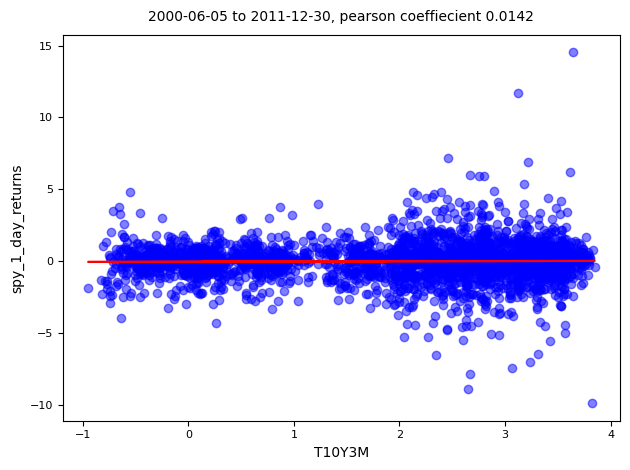

In [15]:
def make_scatter(df, spread_col, ret_or_vol_col, day_shift):
    
    if df.index[0] <= split_date:
        df = df.iloc[day_shift:, :]
    
    df_spread = df[spread_col][::day_shift]
    df_return_or_vol = df[ret_or_vol_col][::day_shift]
    
    slope, intercept = np.polyfit(df_spread, df_return_or_vol, 1)
    corr = pearsonr(df_spread, df_return_or_vol)
    first_index, last_index = df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d')
       
    plt.scatter(df_spread, df_return_or_vol, color='blue', alpha=0.5)
    plt.plot(df_spread, slope * df_spread + intercept, color='red', label='Regression line')
    plt.title(f'{first_index} to {last_index}, pearson coeffiecient {corr[0]:.4f}', pad=10, fontsize=10) 
    plt.xlabel(spread_col, fontsize= 10)
    plt.ylabel(ret_or_vol_col, fontsize= 10)
    plt.tick_params(axis= 'both', which= 'major', labelsize=8)
    
    plt.tight_layout()
    plt.show()
    
make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', 'spy_1_day_returns', 1)

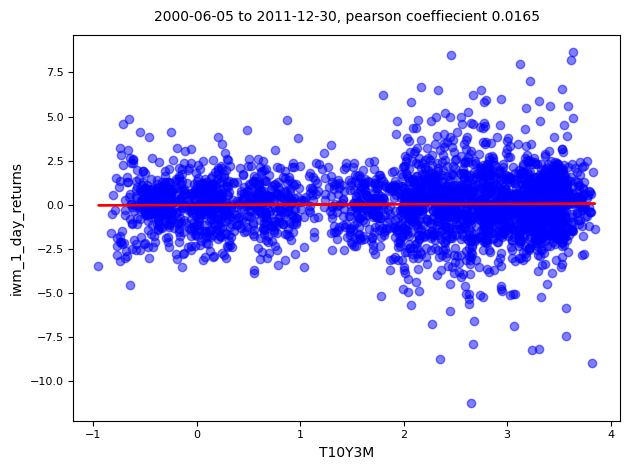

In [16]:
make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', 'iwm_1_day_returns', 1)

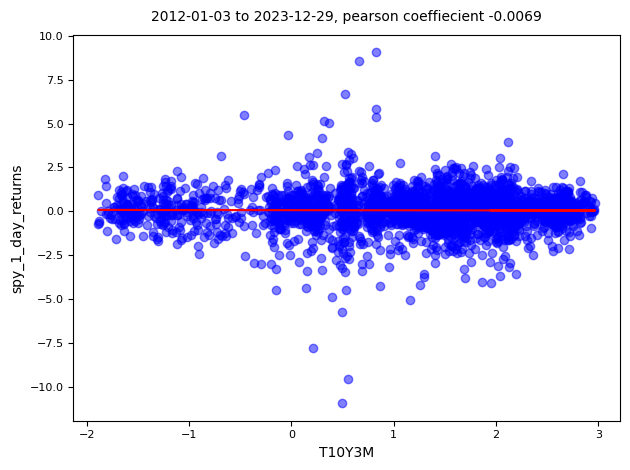

In [17]:
make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', 'spy_1_day_returns', 1)

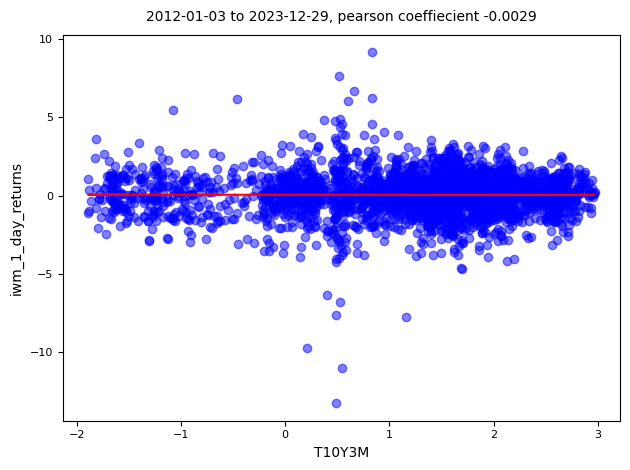

In [60]:
make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', 'iwm_1_day_returns', 1)

In [19]:
def slice_columns(df, columns, number):
    filtered_columns = [col for col in columns if str(number) in col]

    return df[filtered_columns]
col_list = list(spy_iwm_pair.columns)

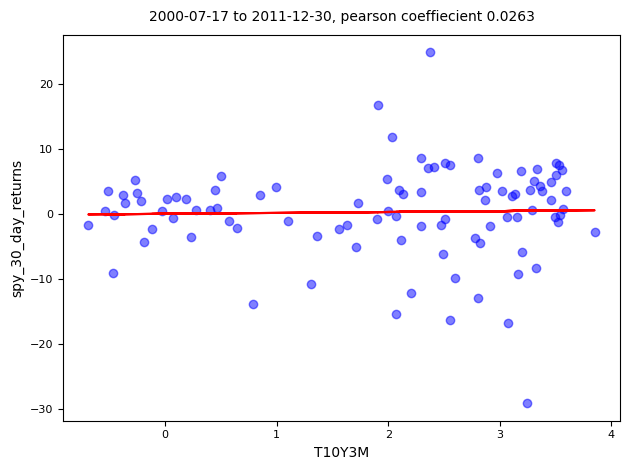

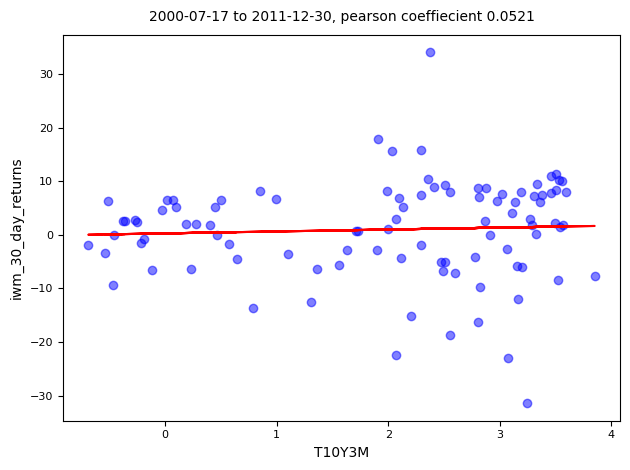

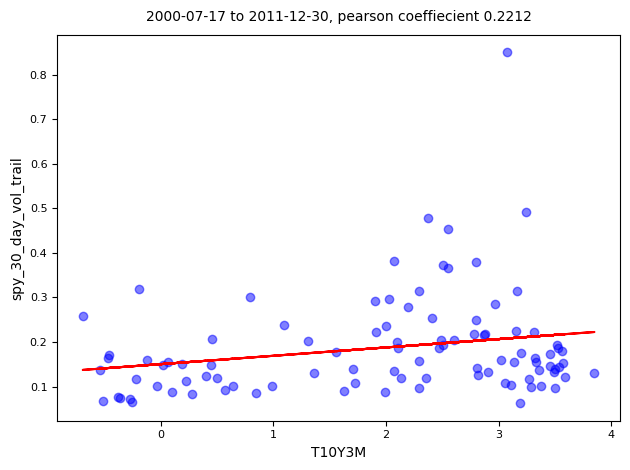

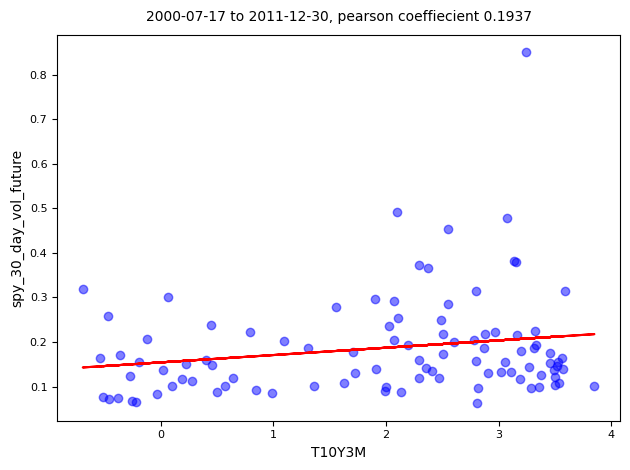

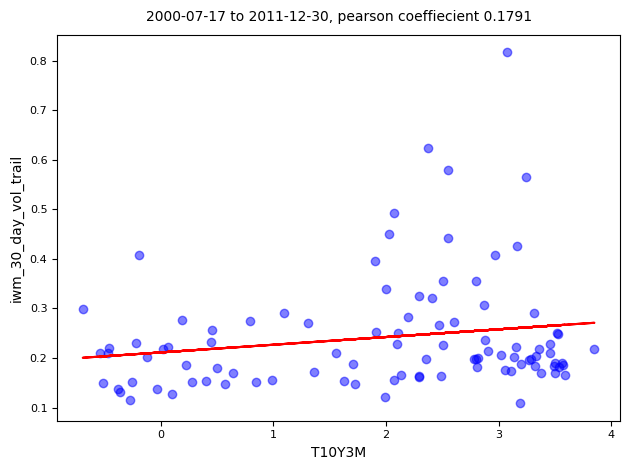

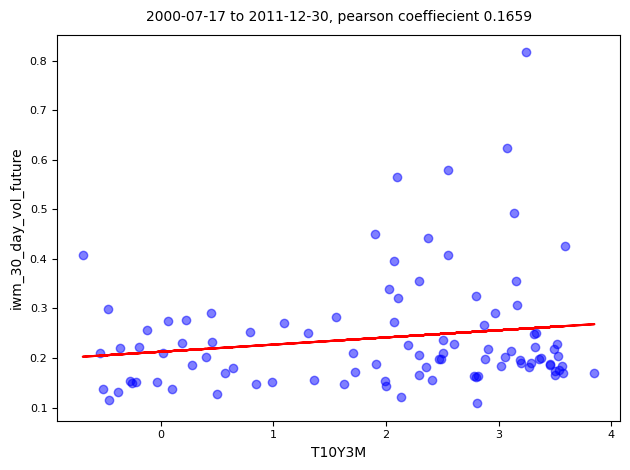

In [20]:
cols_30 = slice_columns(spy_iwm_pair, col_list, 30)
for column in cols_30:
    make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', column, 30)

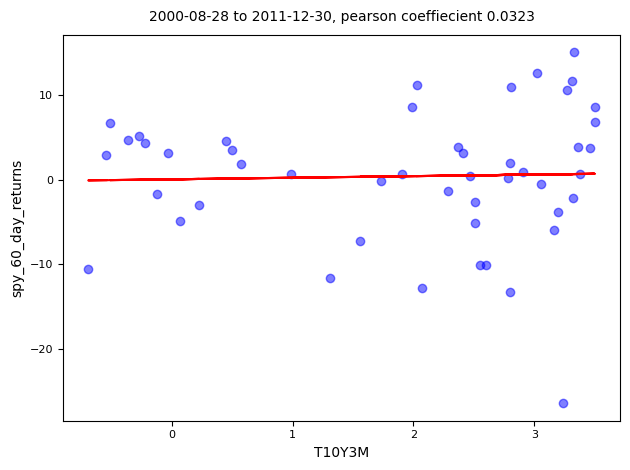

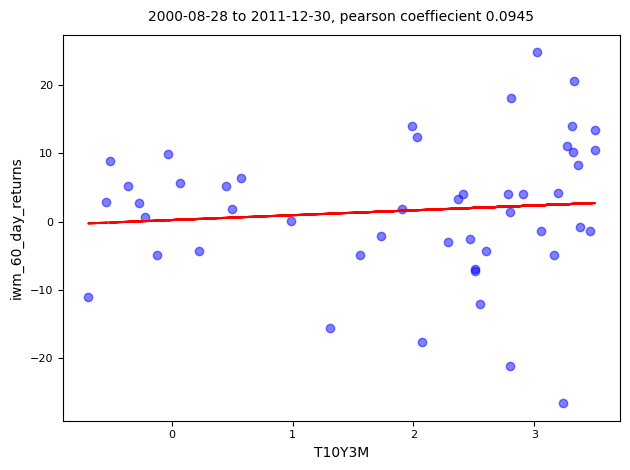

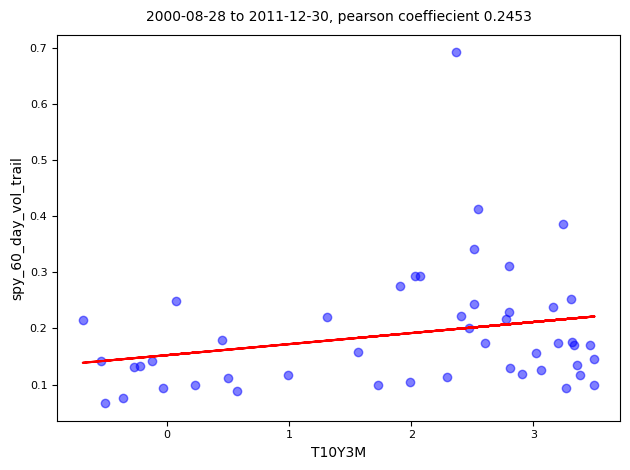

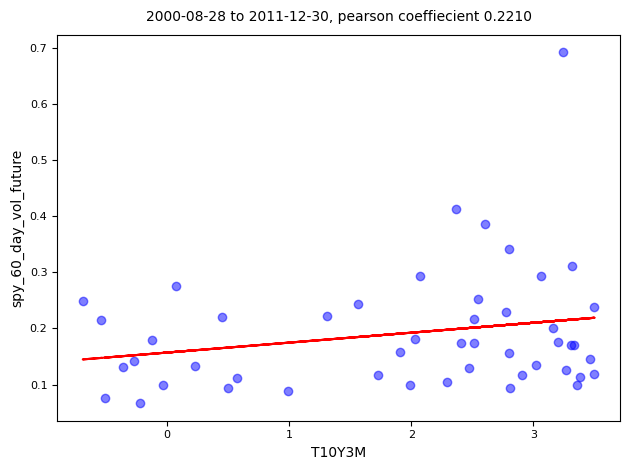

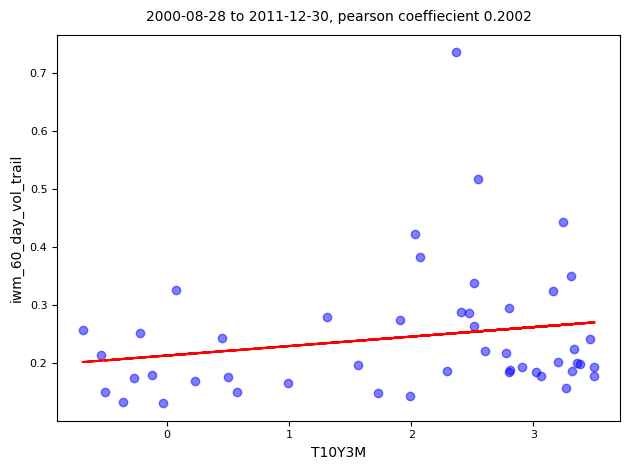

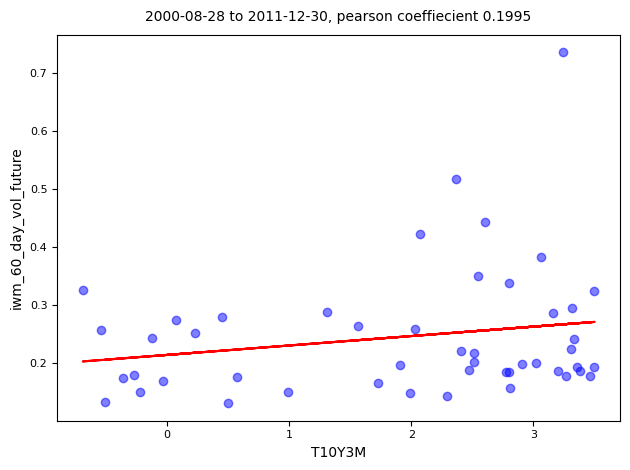

In [21]:
cols_60 = slice_columns(spy_iwm_pair, col_list, 60)
for column in cols_60:
    make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', column, 60)

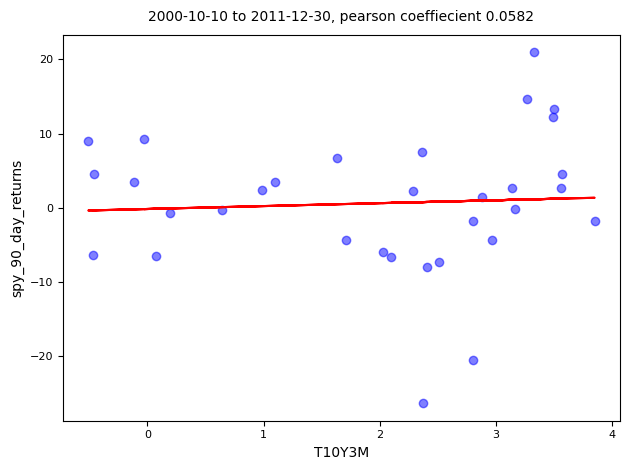

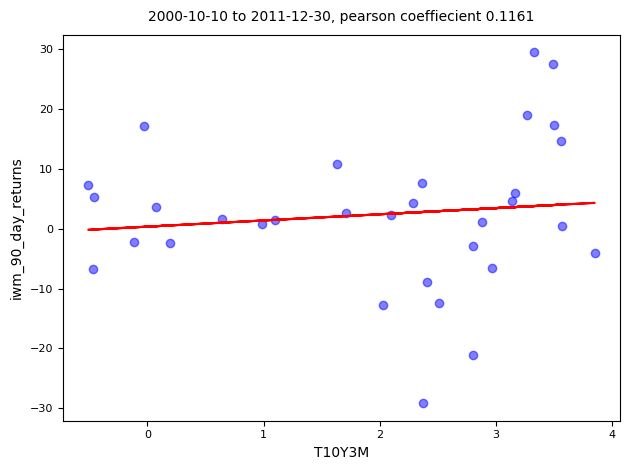

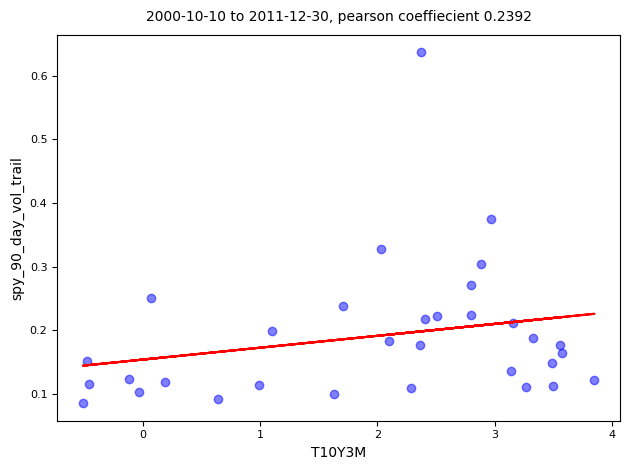

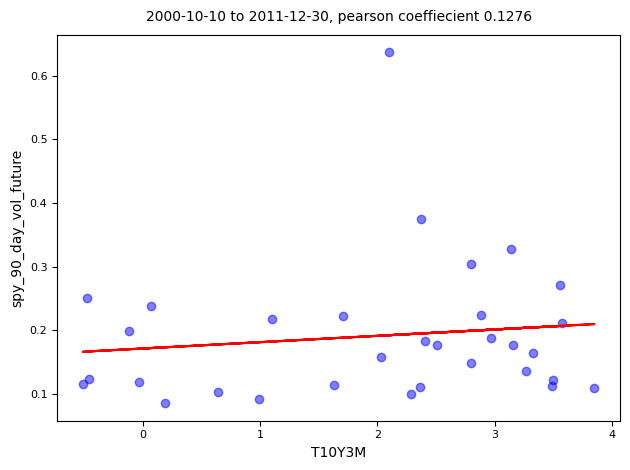

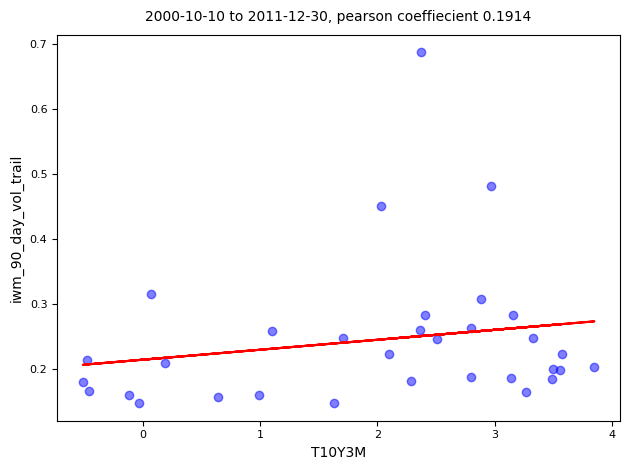

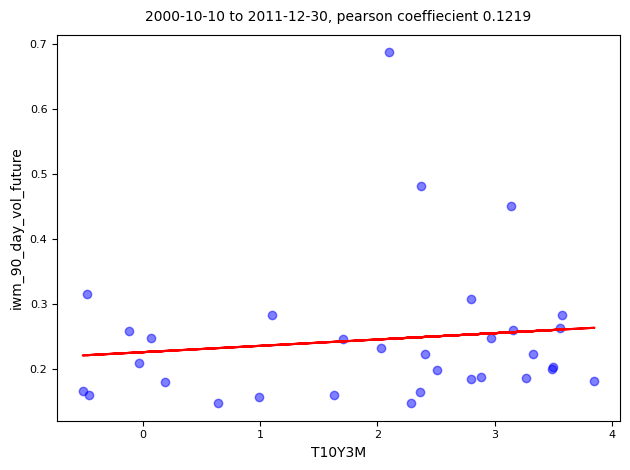

In [22]:
cols_90 = slice_columns(spy_iwm_pair, col_list, 90)
for column in cols_90:
    make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', column, 90)


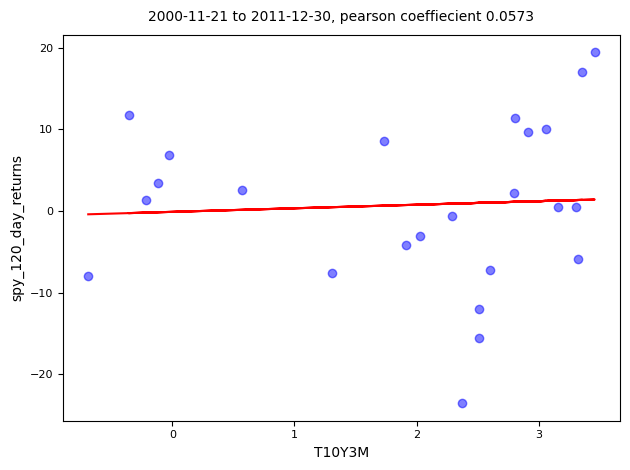

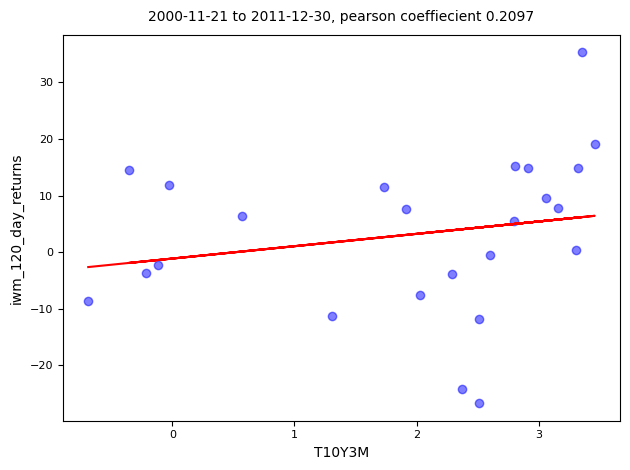

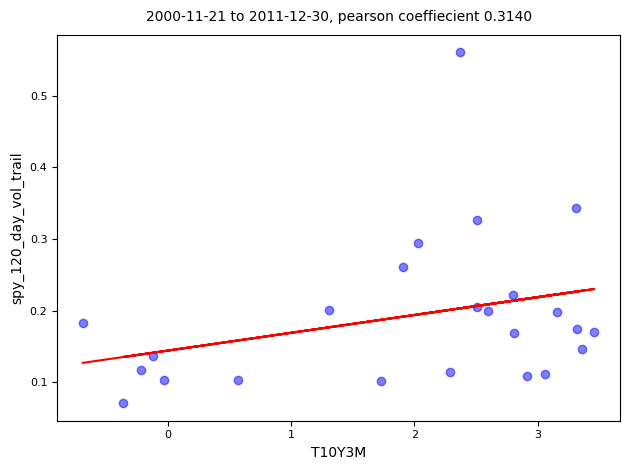

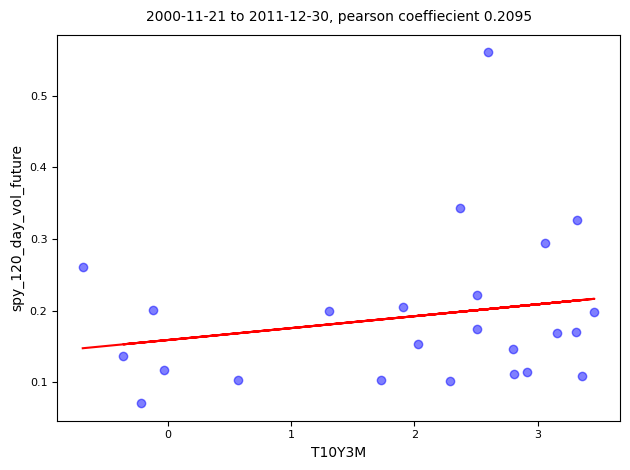

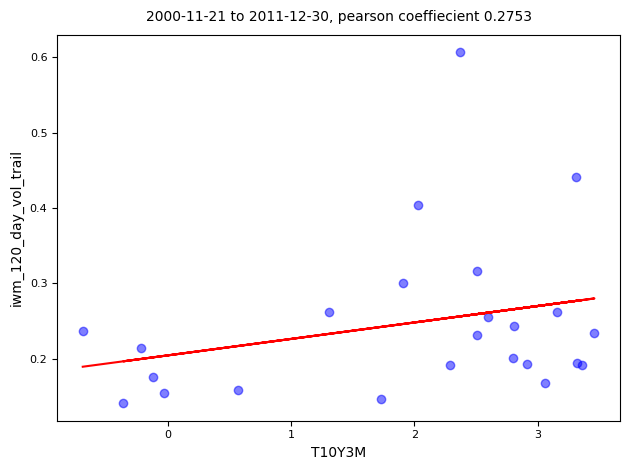

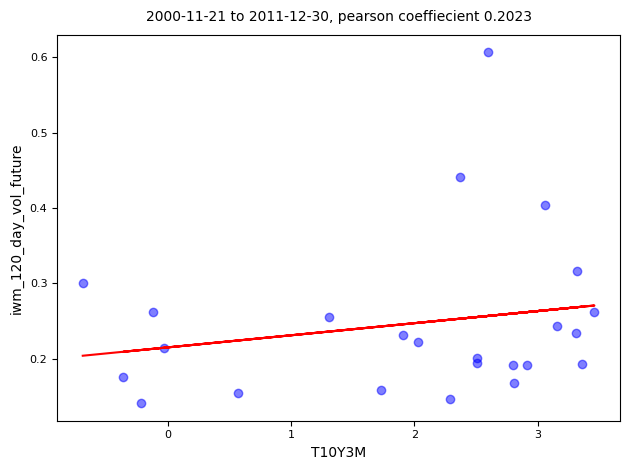

In [23]:
cols_120 = slice_columns(spy_iwm_pair, col_list, 120)
for column in cols_120:
    make_scatter(spy_iwm_pair_2000_2012, 'T10Y3M', column, 120)

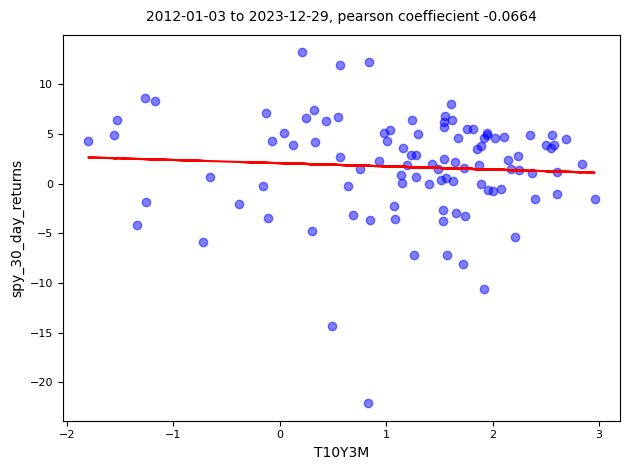

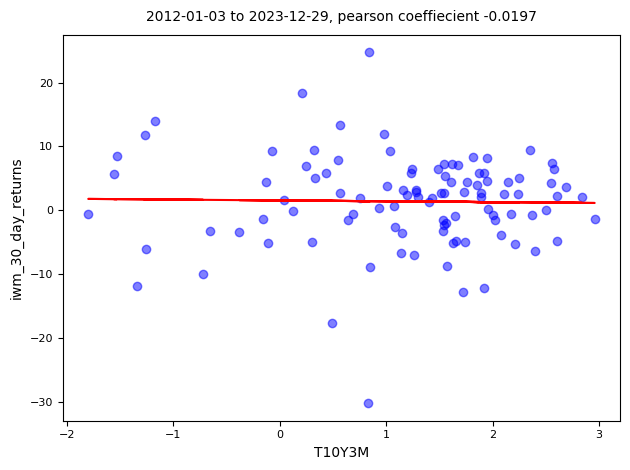

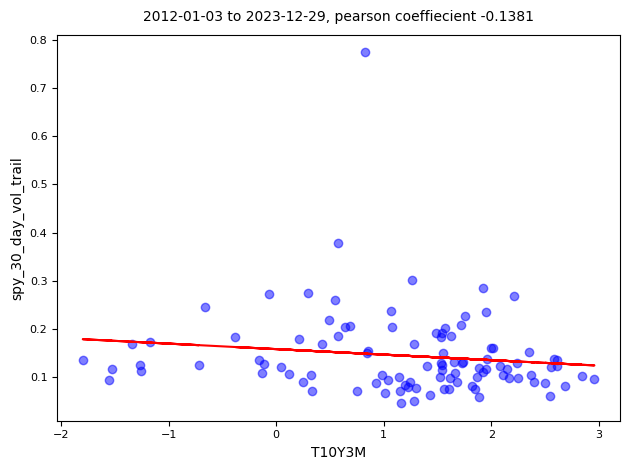

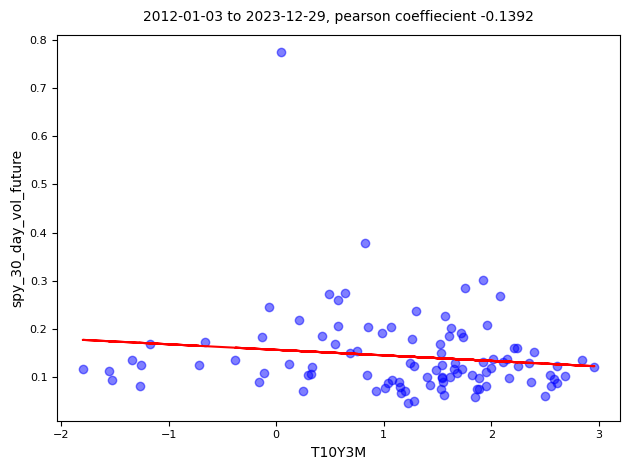

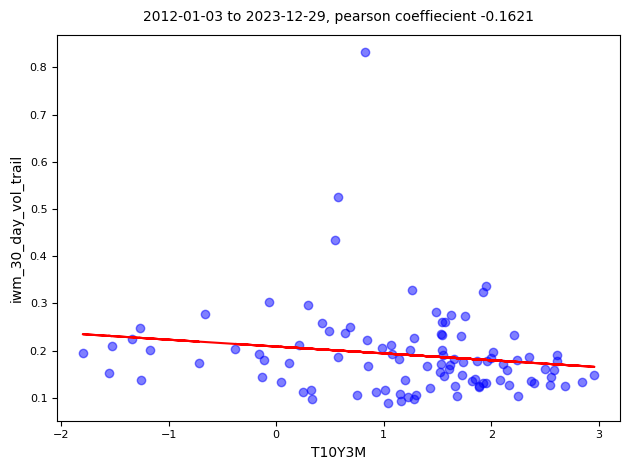

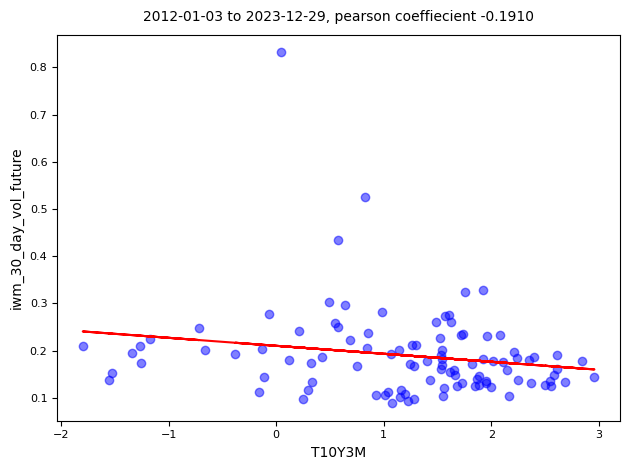

In [24]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', column, 30)

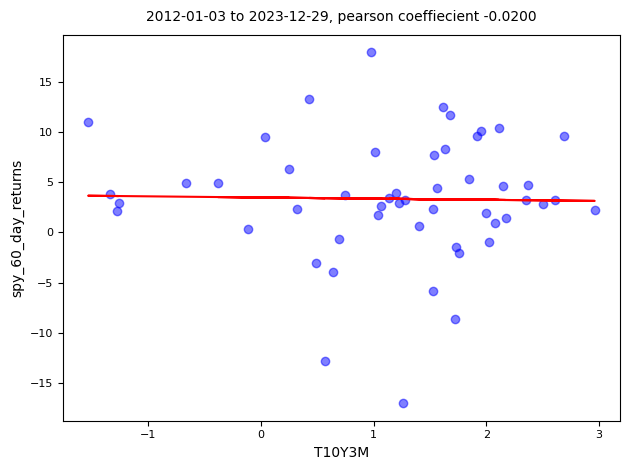

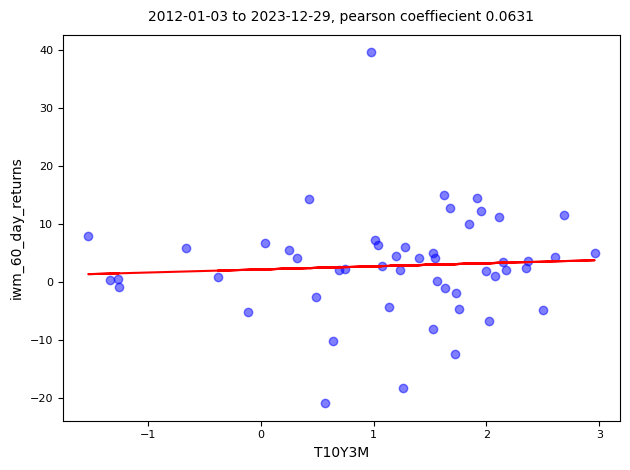

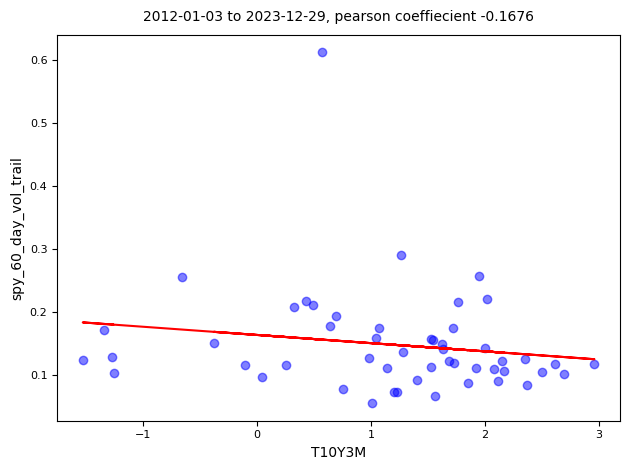

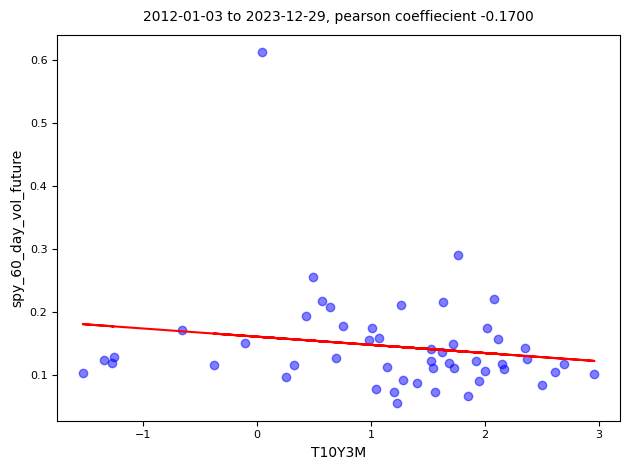

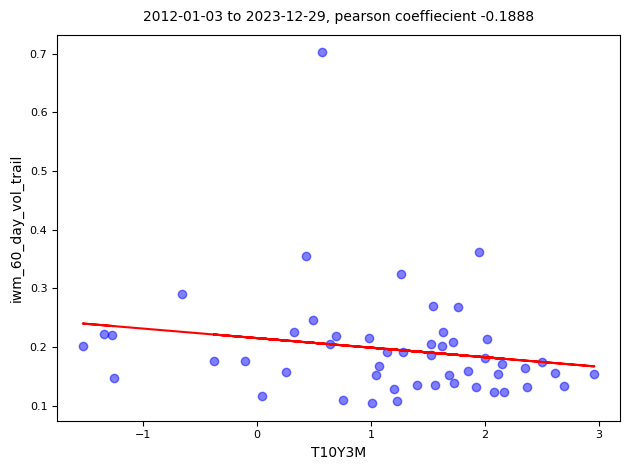

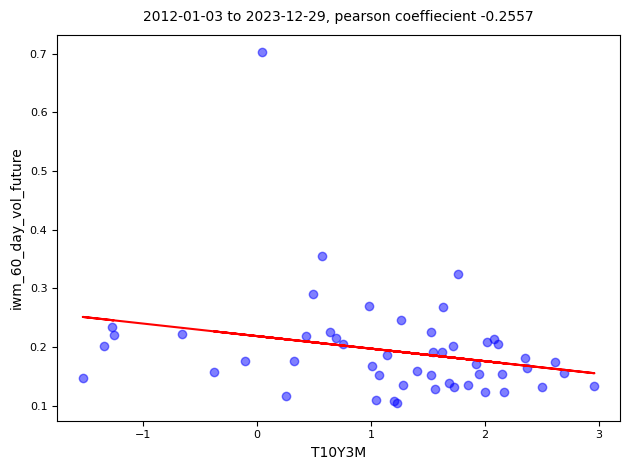

In [25]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', column, 60)

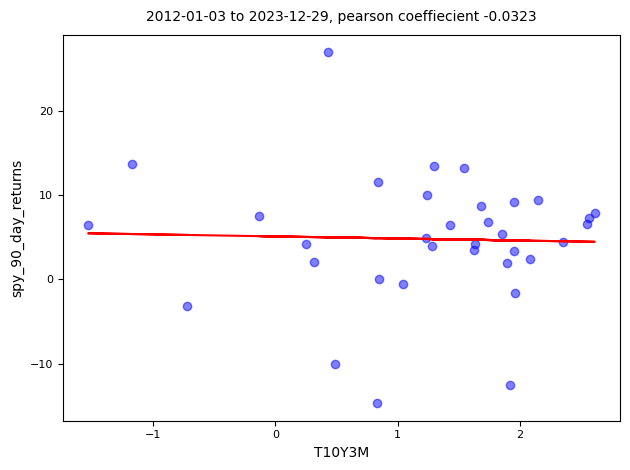

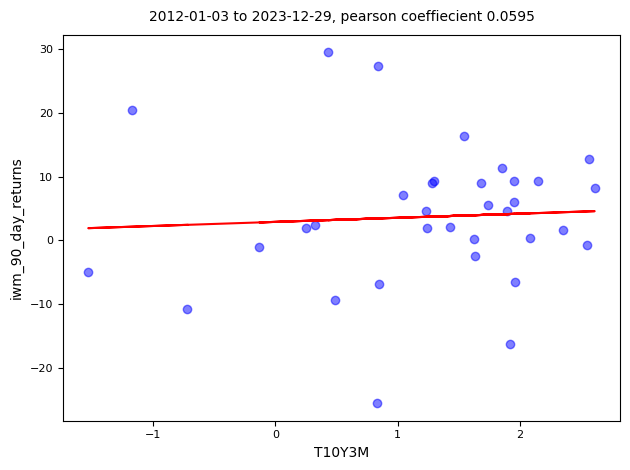

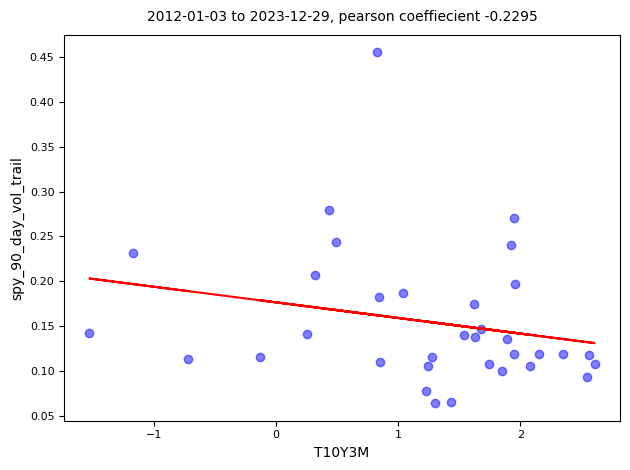

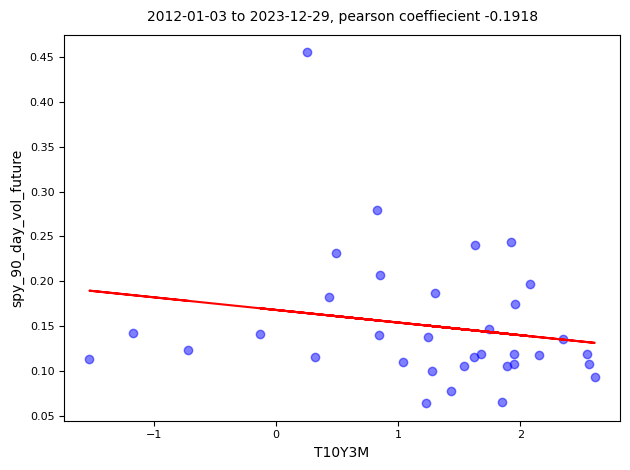

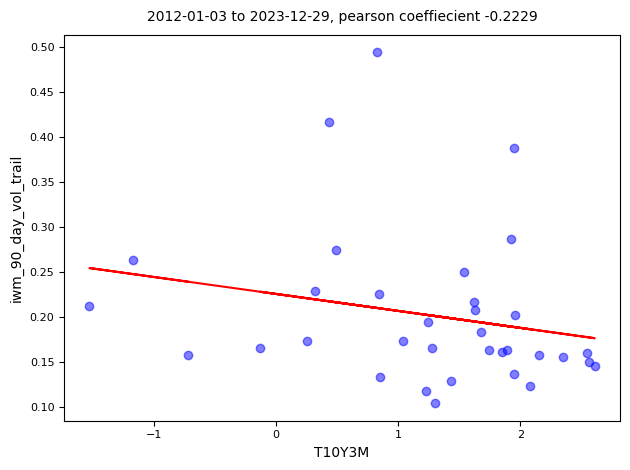

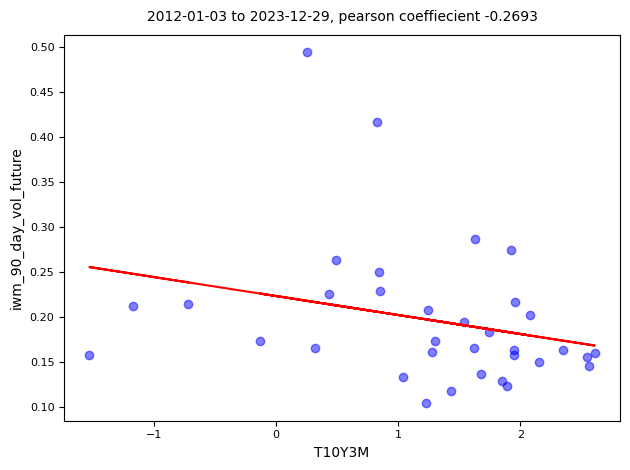

In [26]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', column, 90)

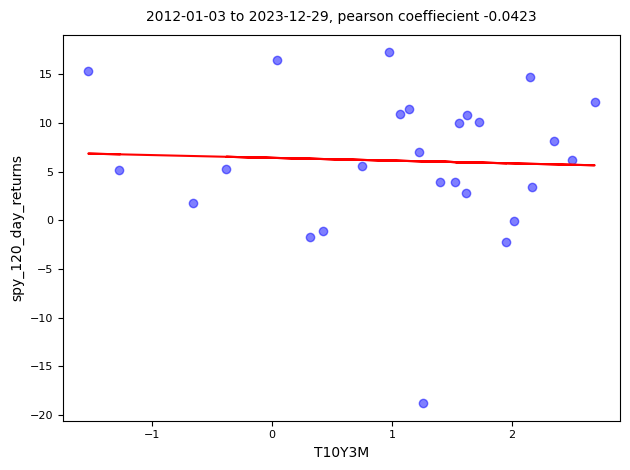

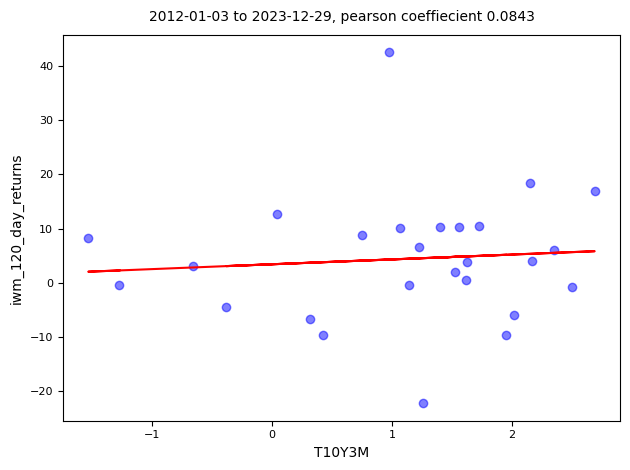

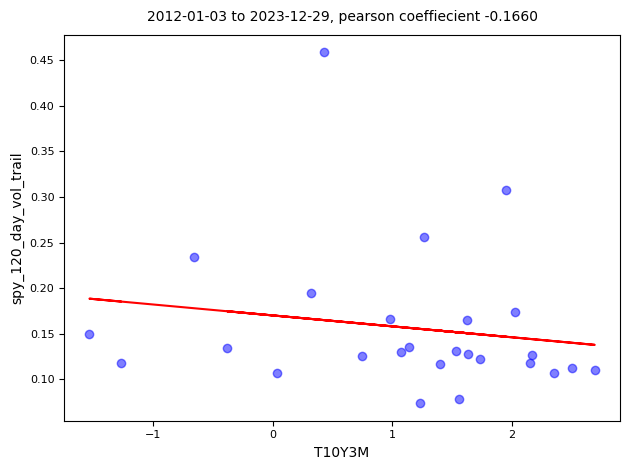

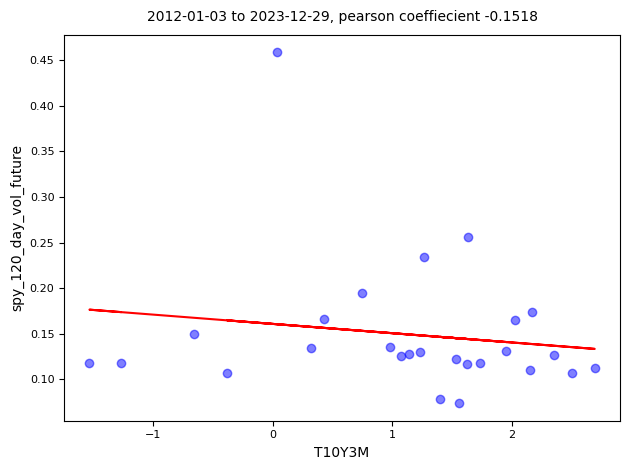

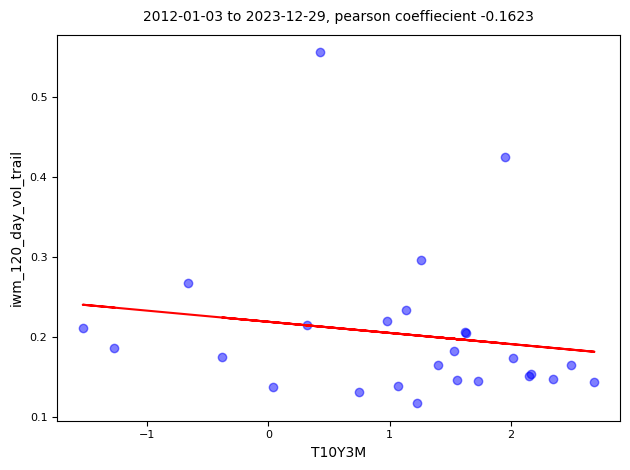

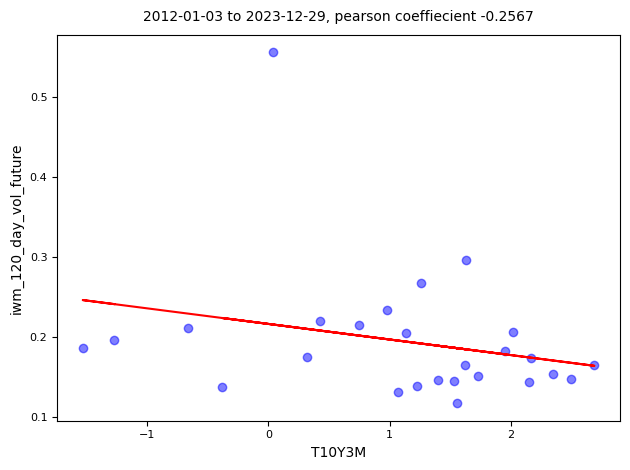

In [27]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2012_2023, 'T10Y3M', column, 120)

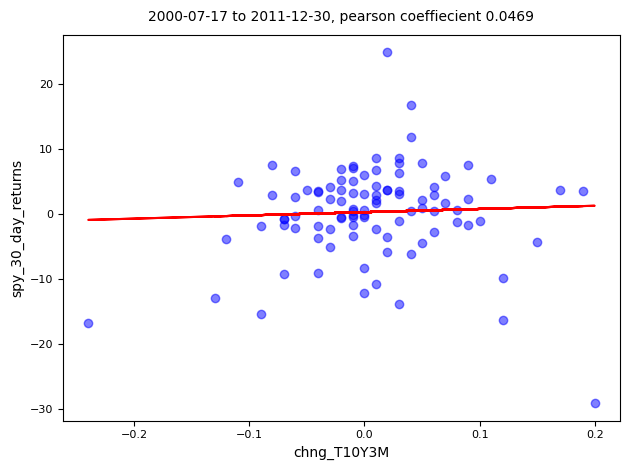

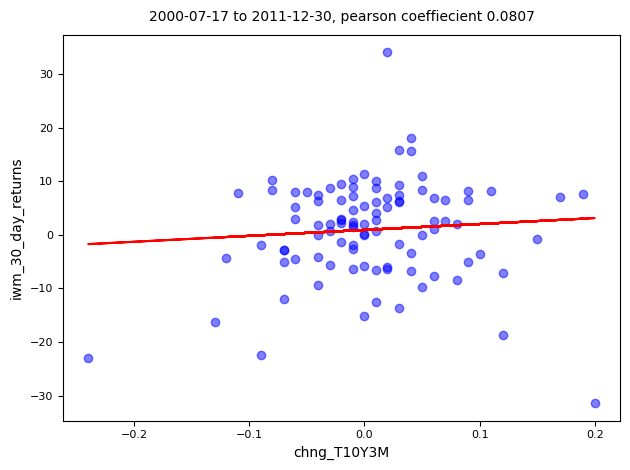

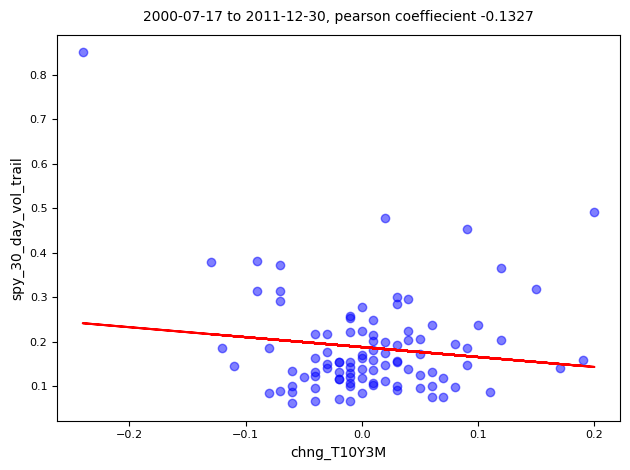

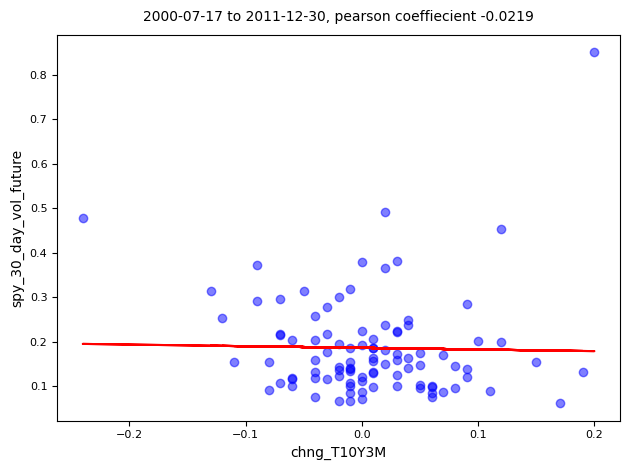

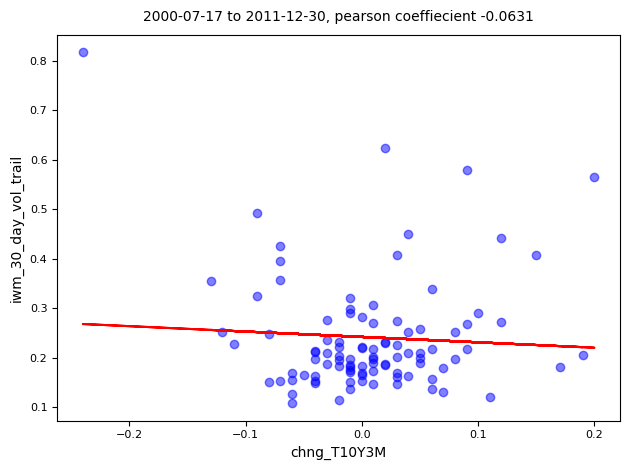

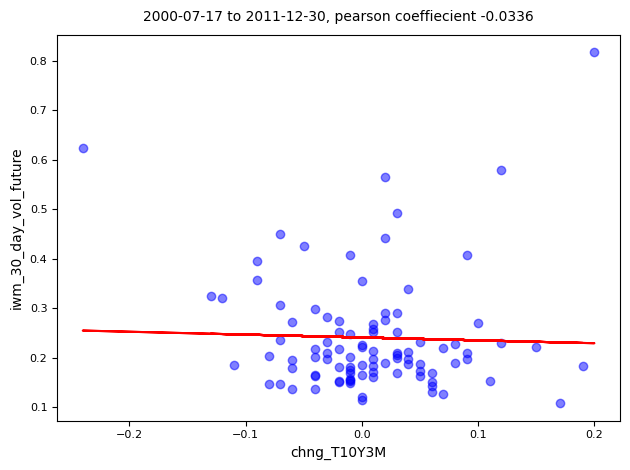

In [28]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M', column, 30)

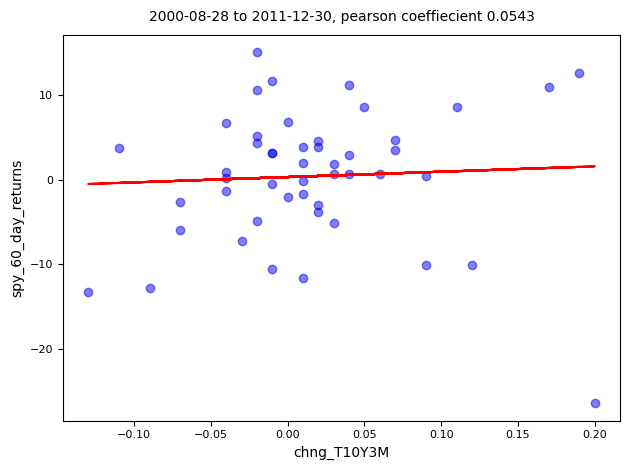

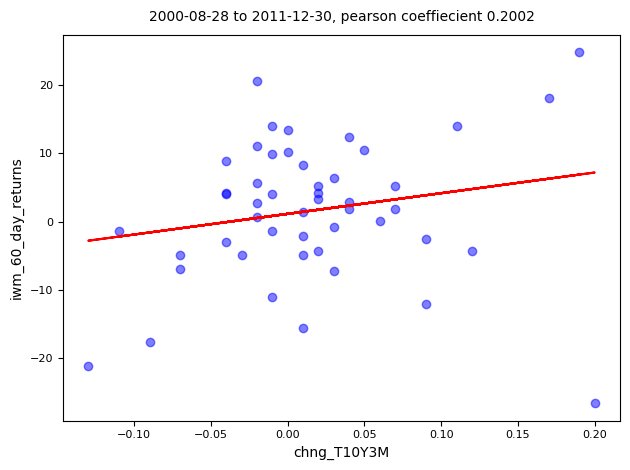

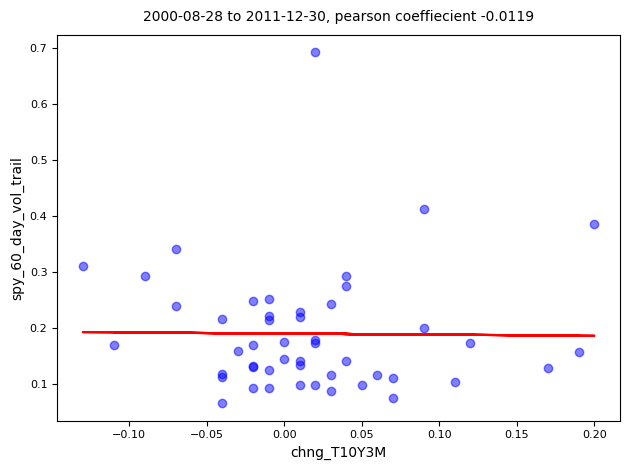

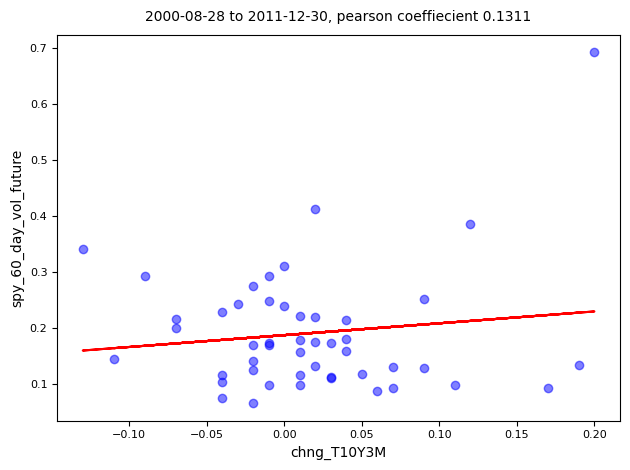

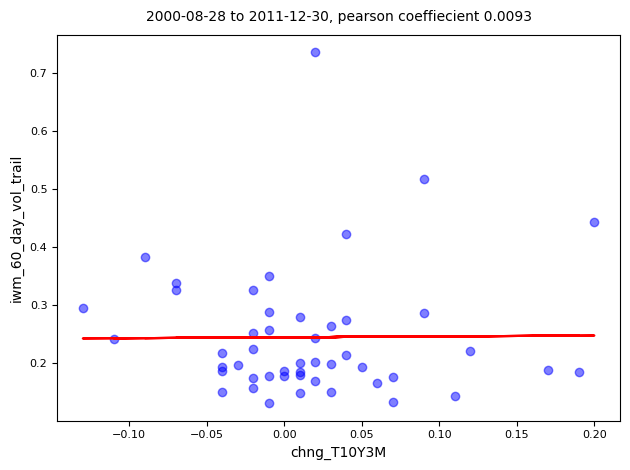

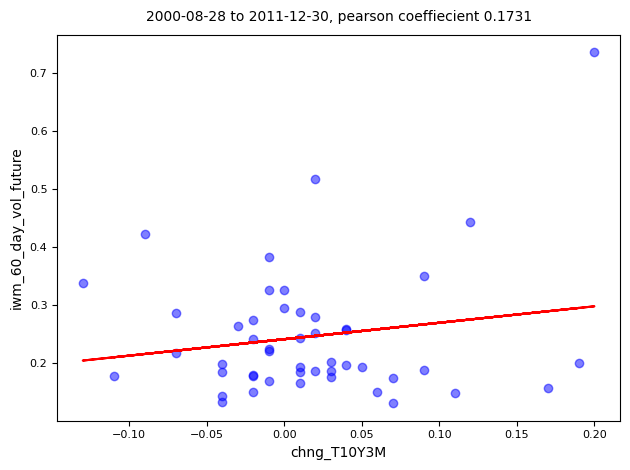

In [29]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M', column, 60)

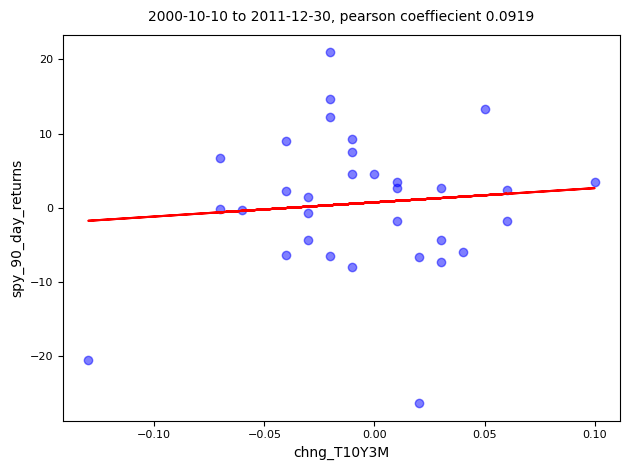

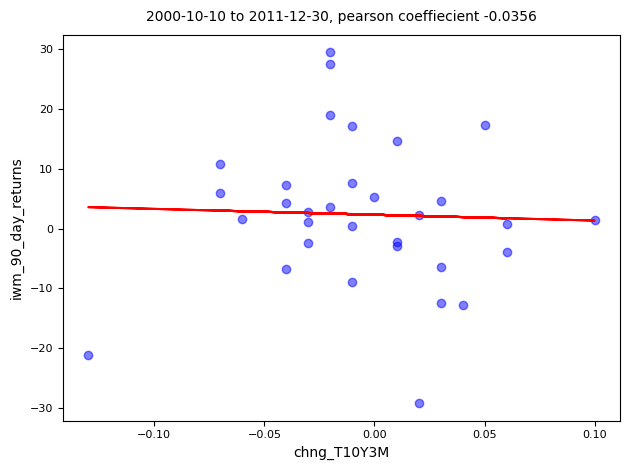

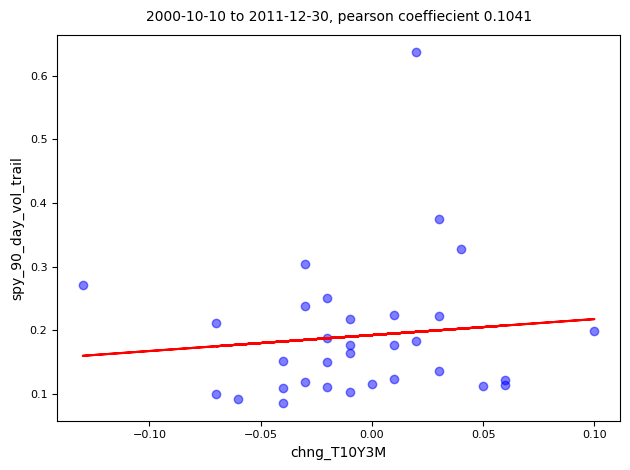

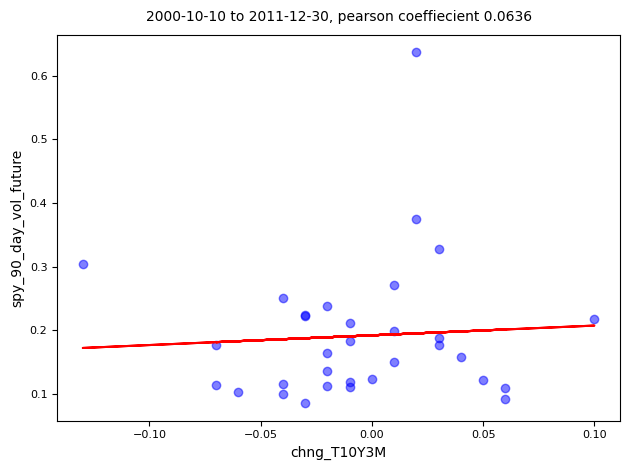

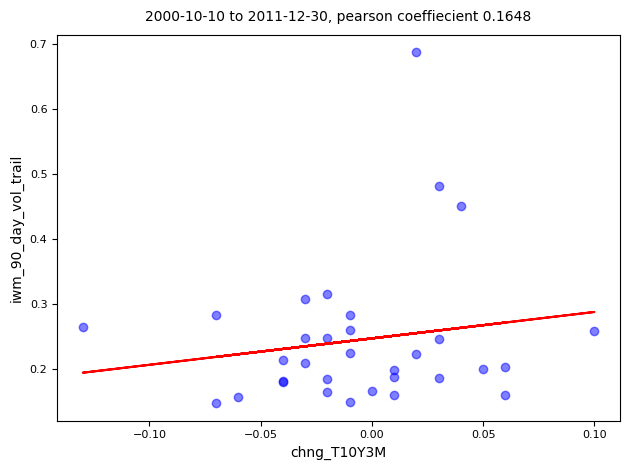

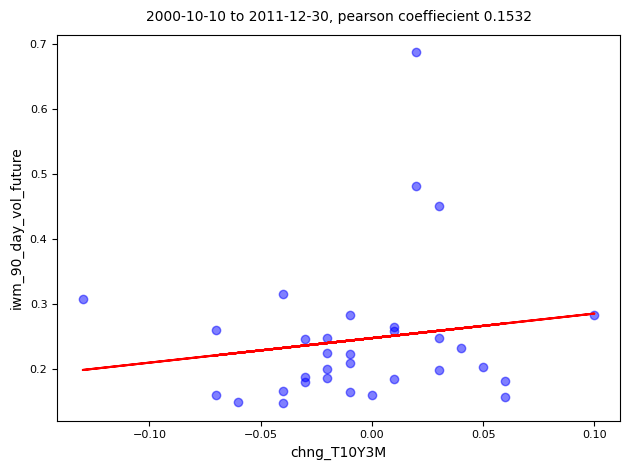

In [30]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M', column, 90)

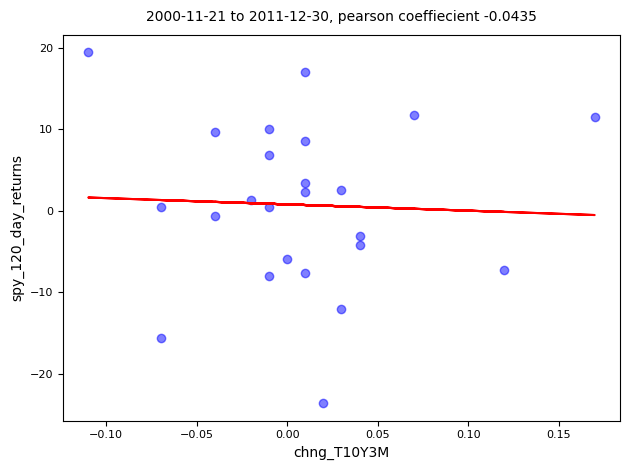

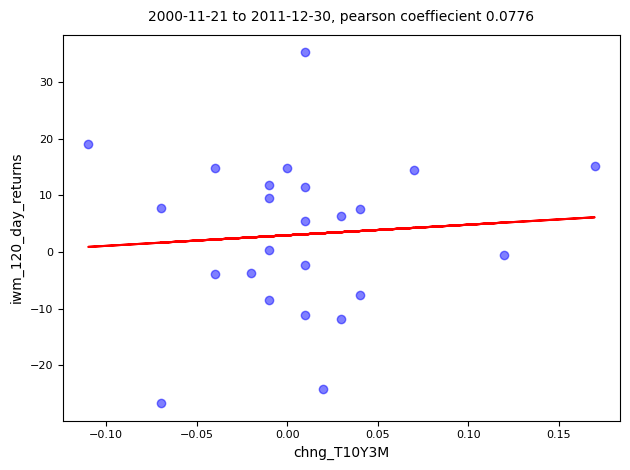

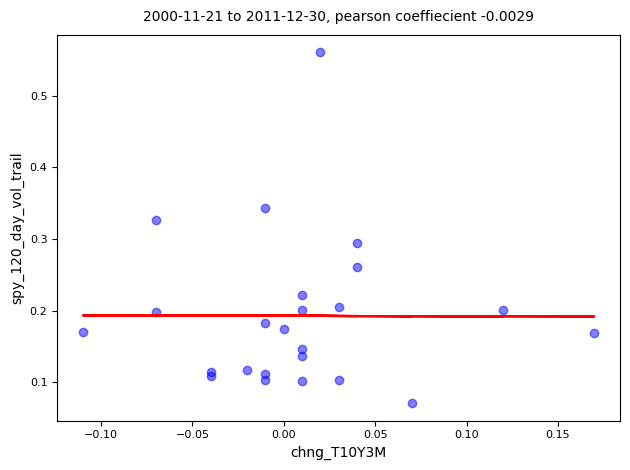

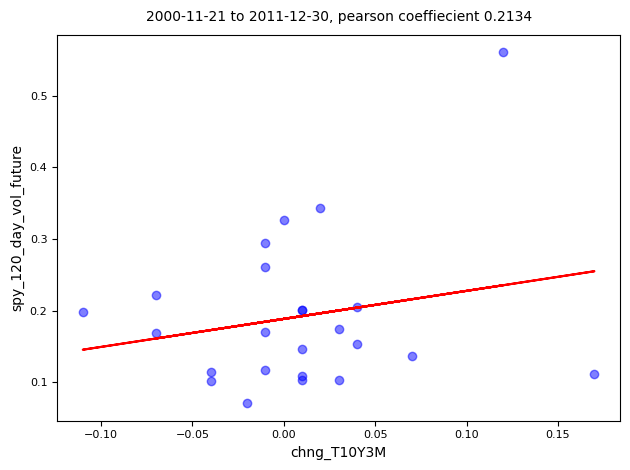

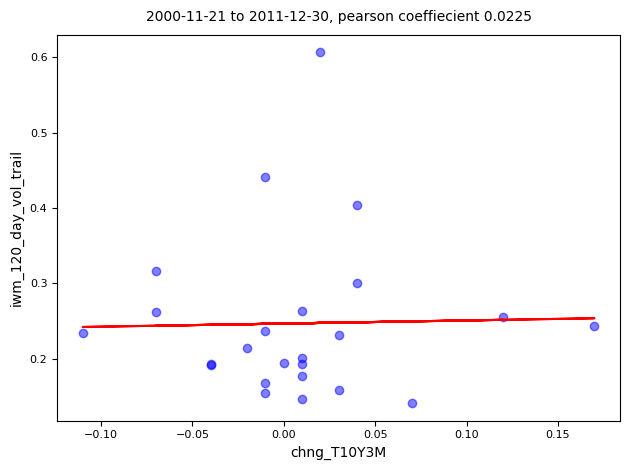

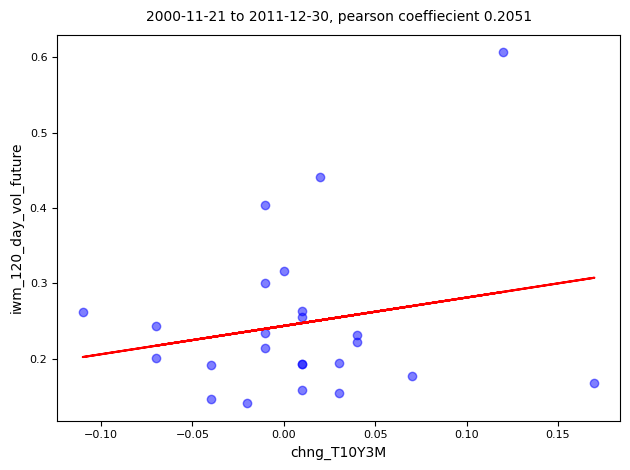

In [31]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M', column, 120)

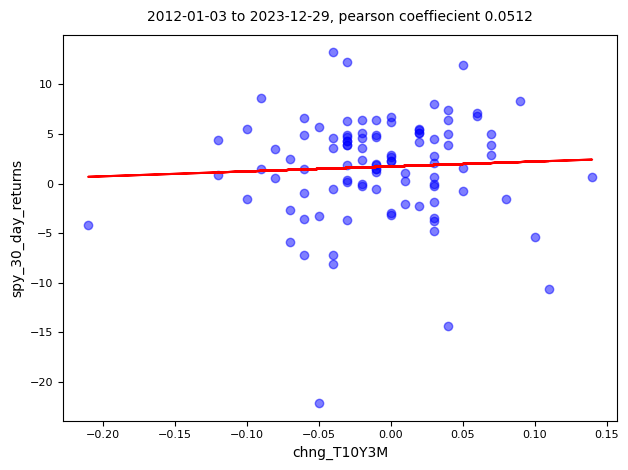

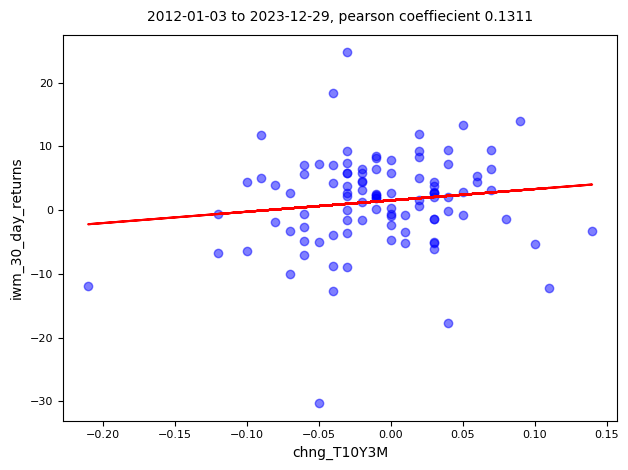

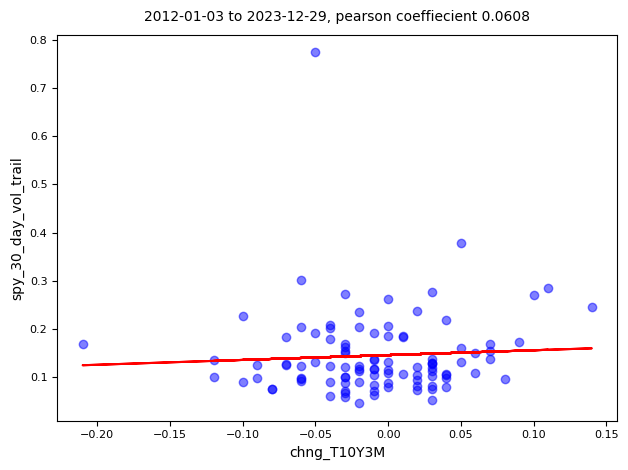

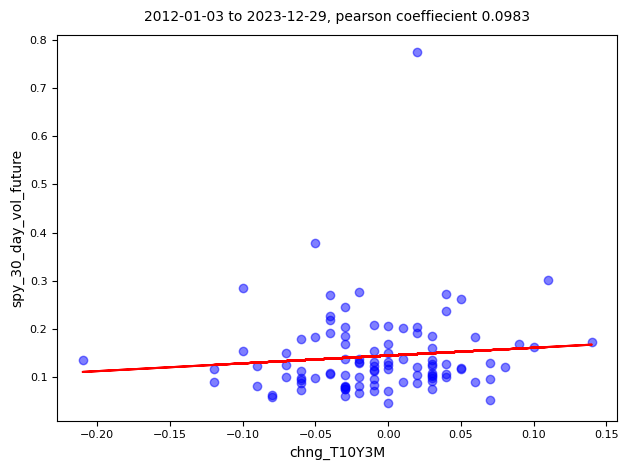

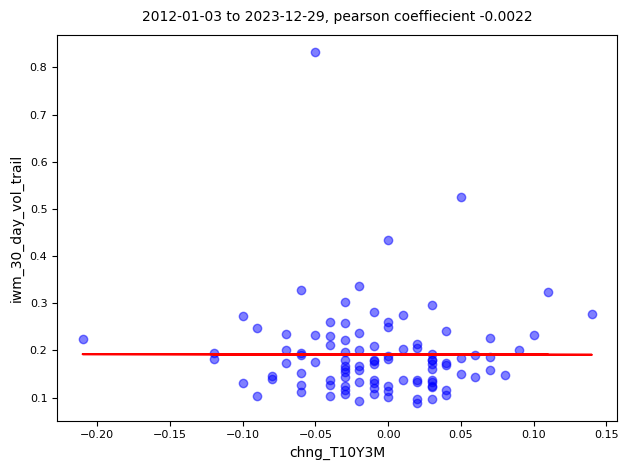

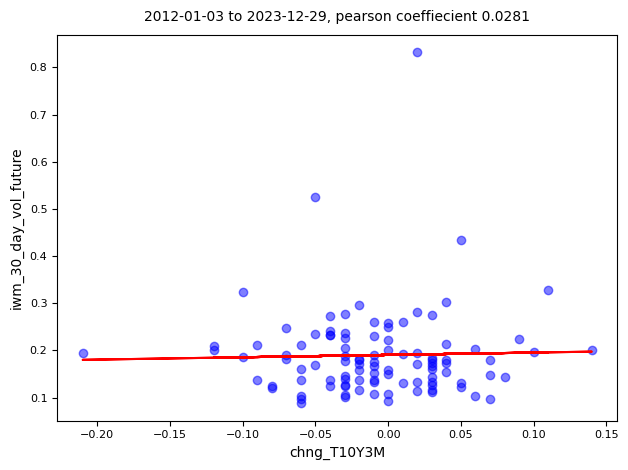

In [32]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M', column, 30)

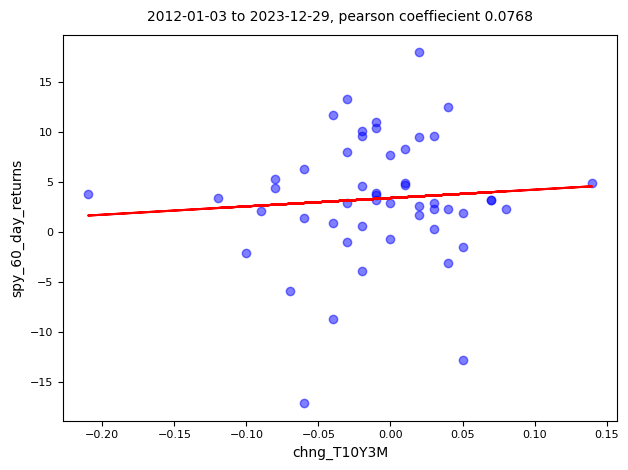

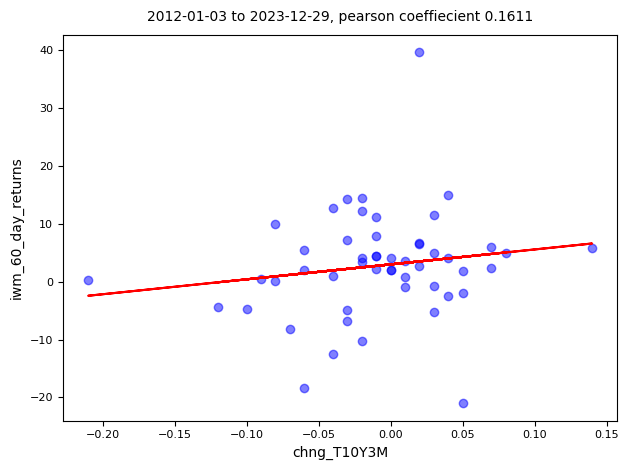

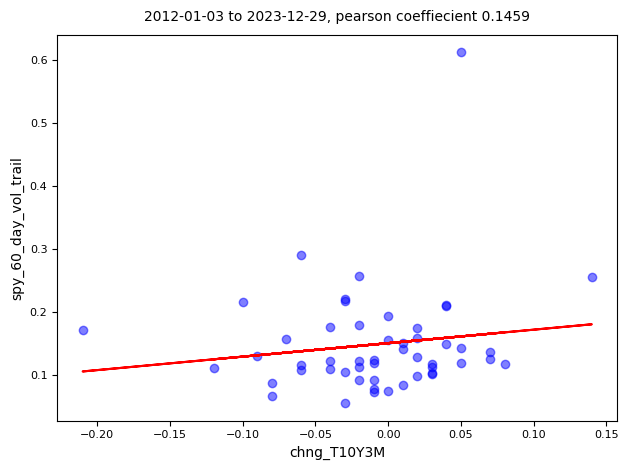

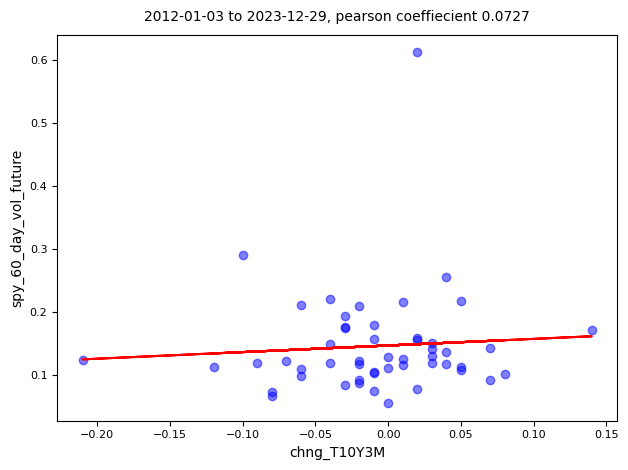

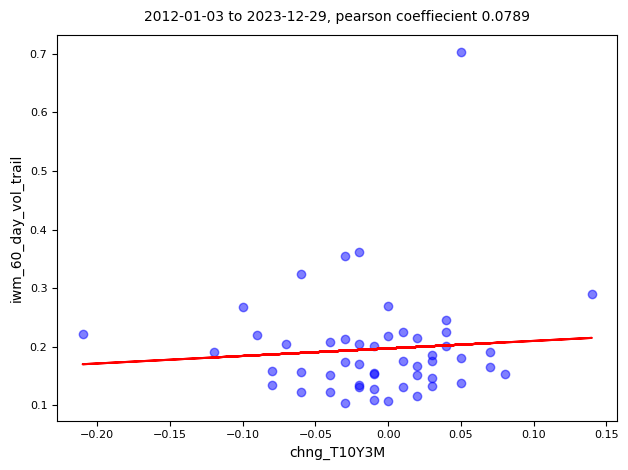

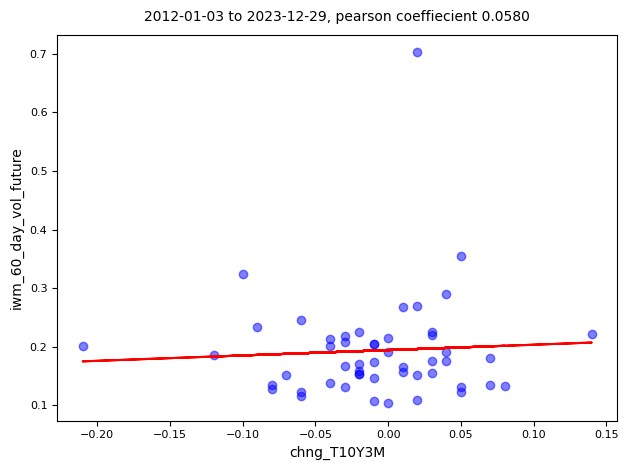

In [33]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M', column, 60)

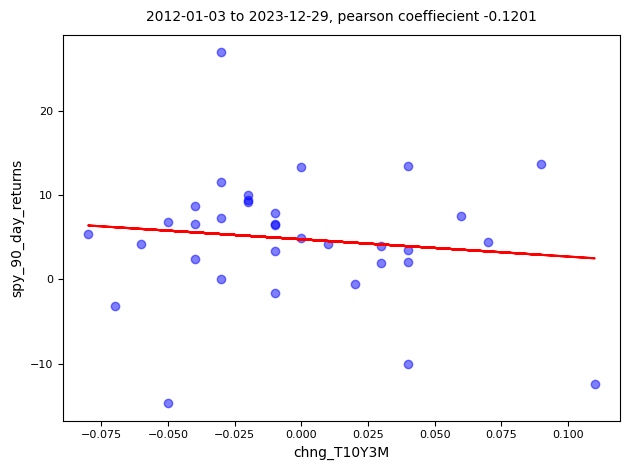

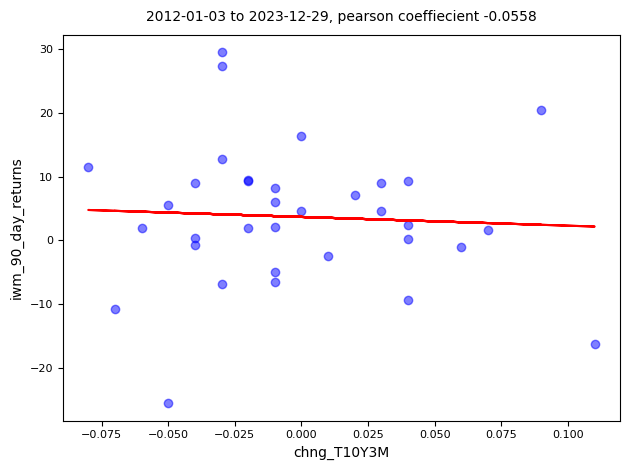

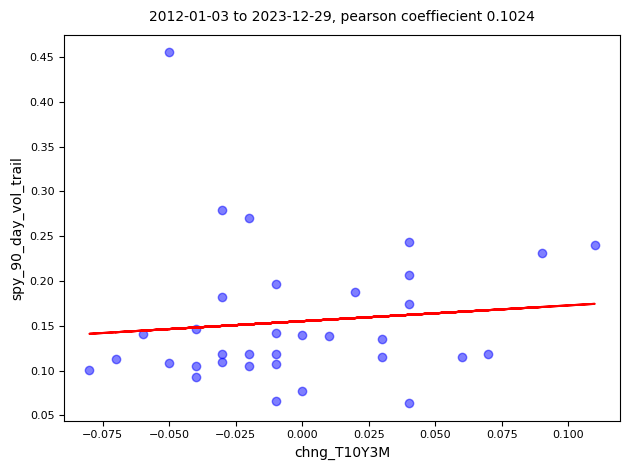

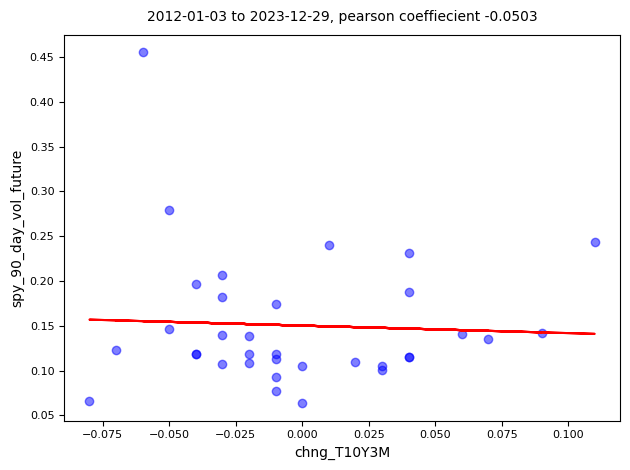

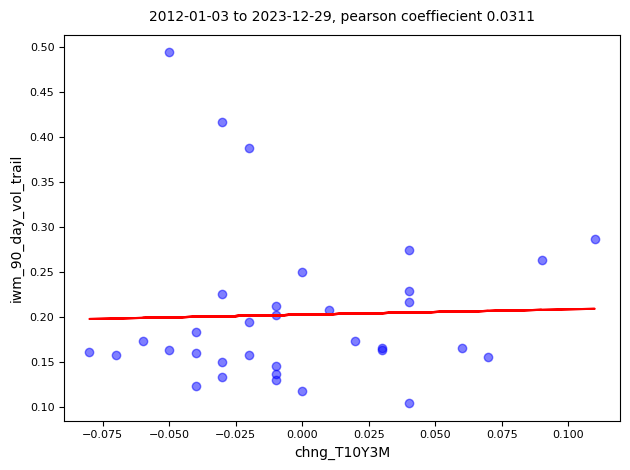

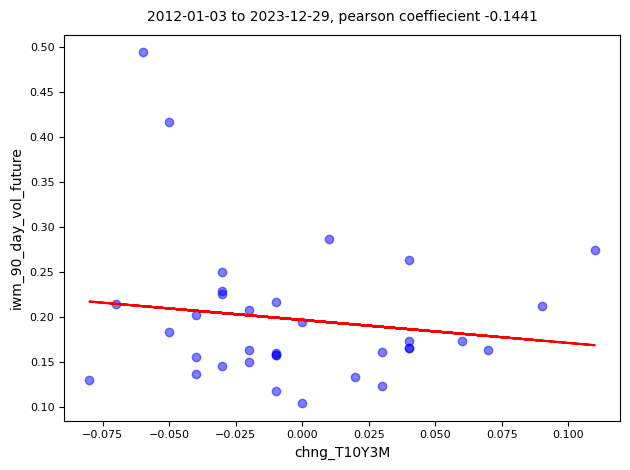

In [34]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M', column, 90)

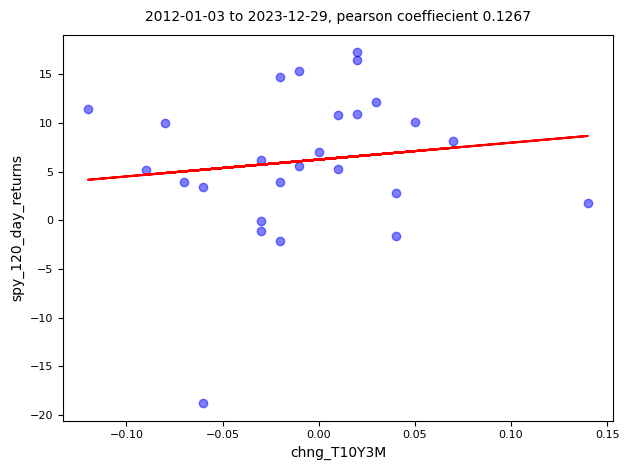

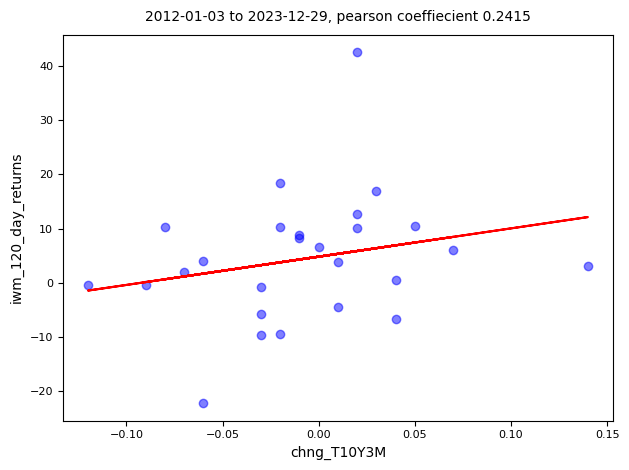

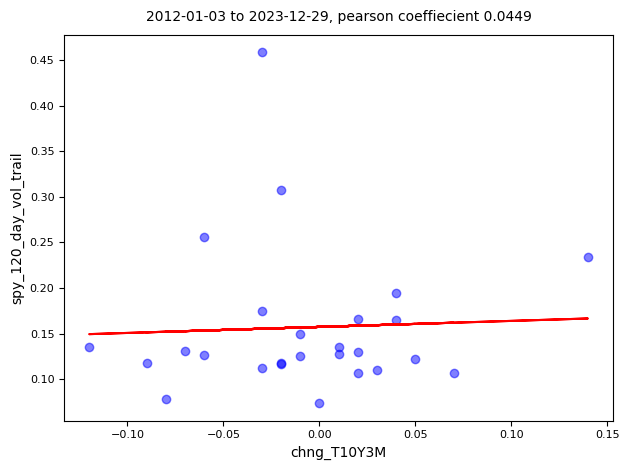

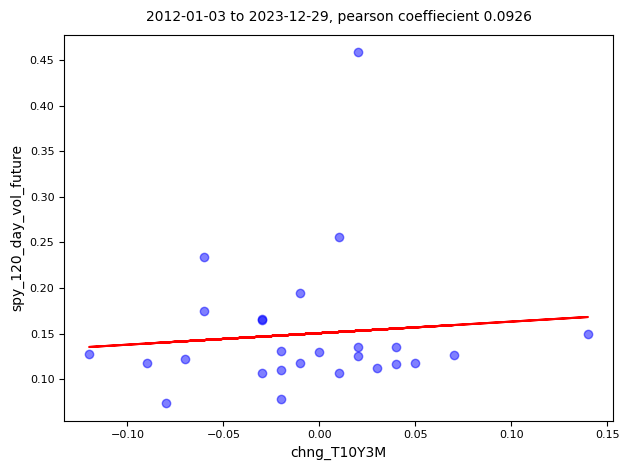

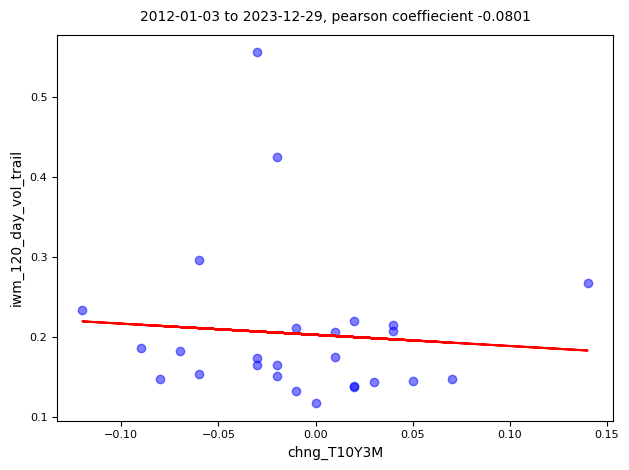

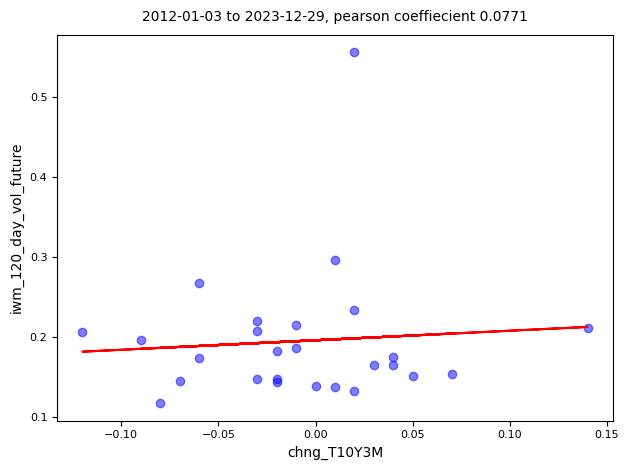

In [35]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M', column, 120)

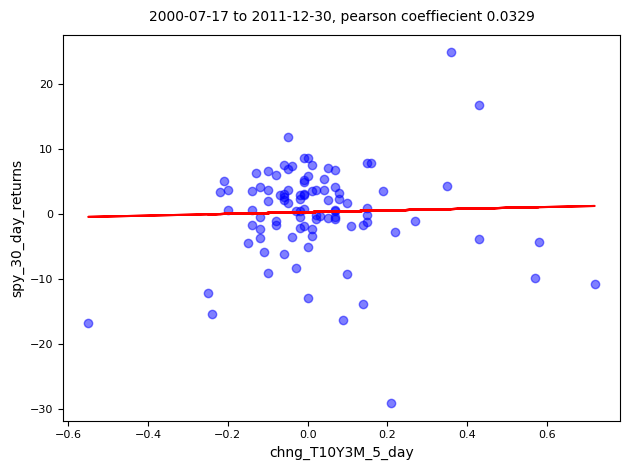

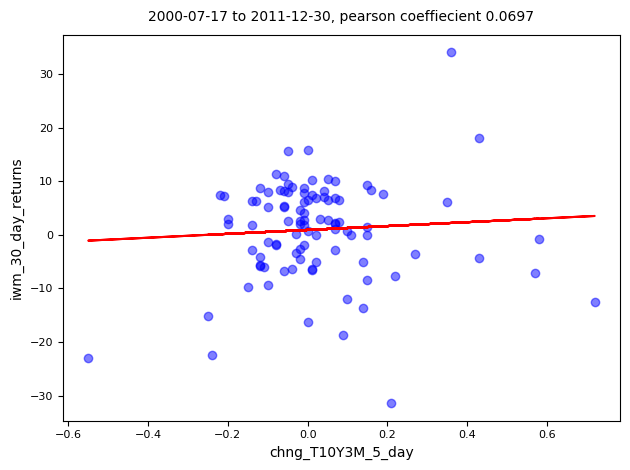

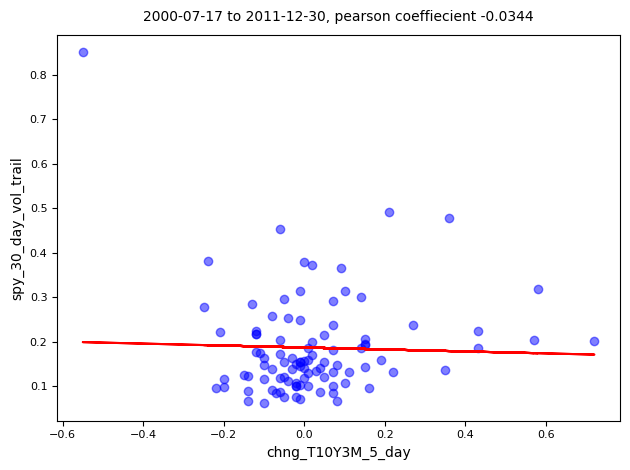

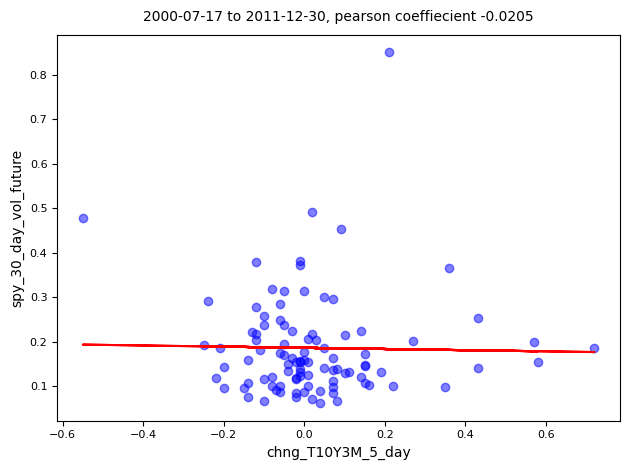

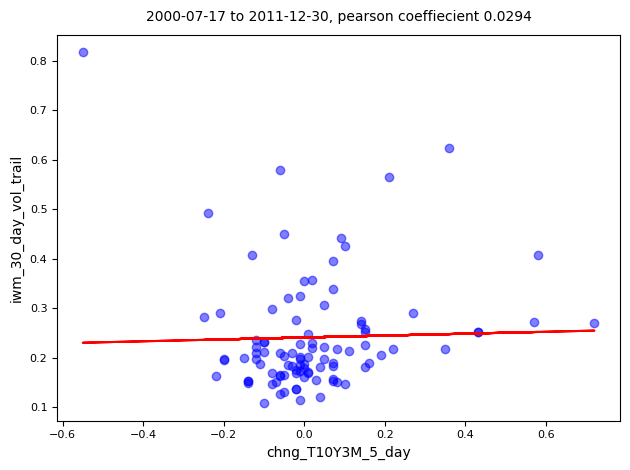

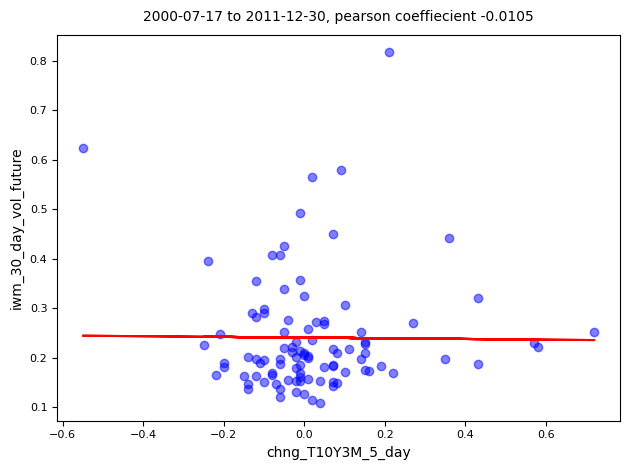

In [36]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_5_day', column, 30)

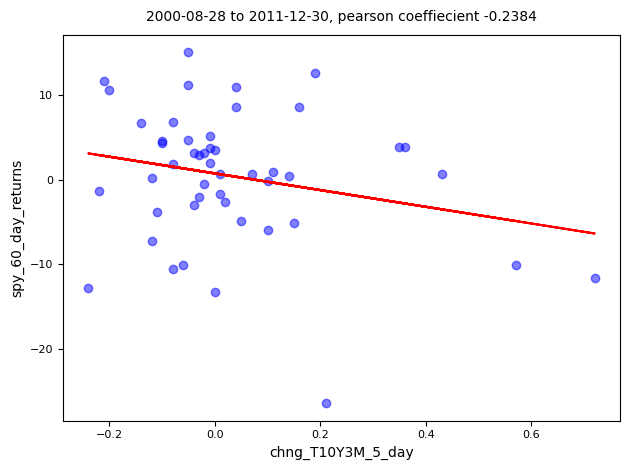

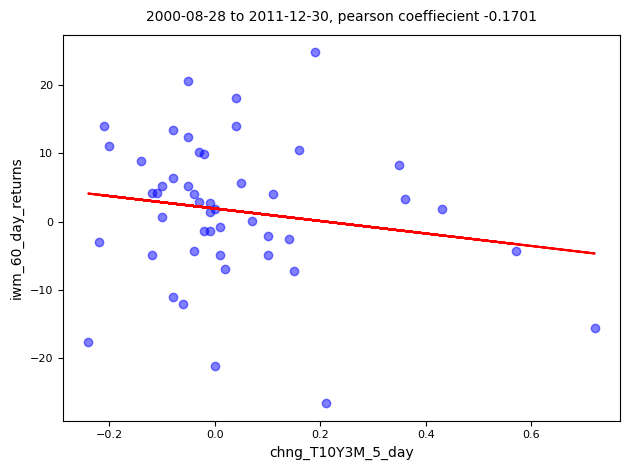

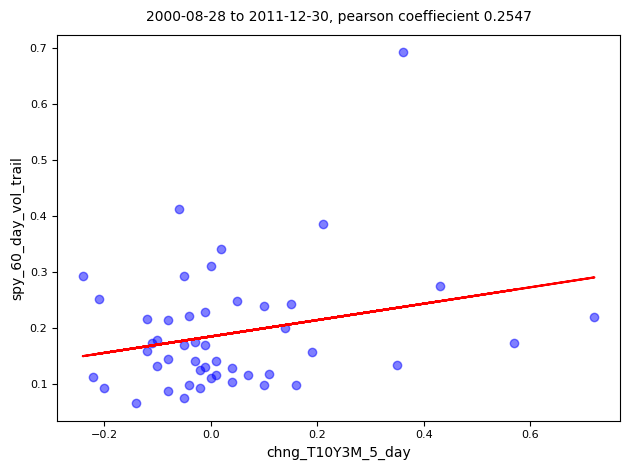

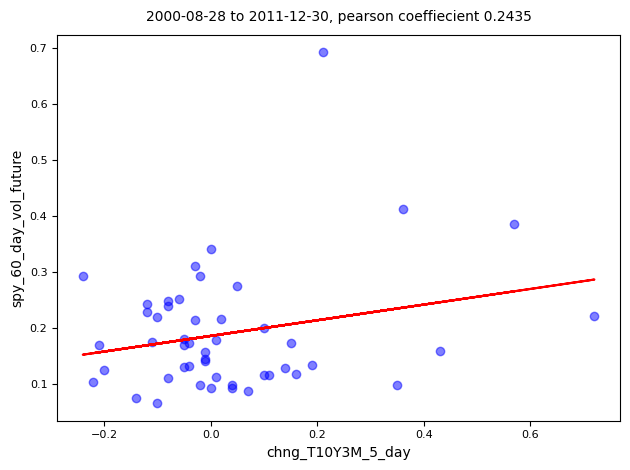

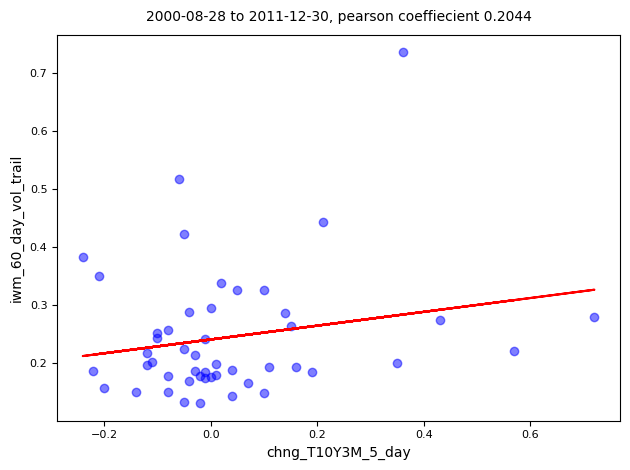

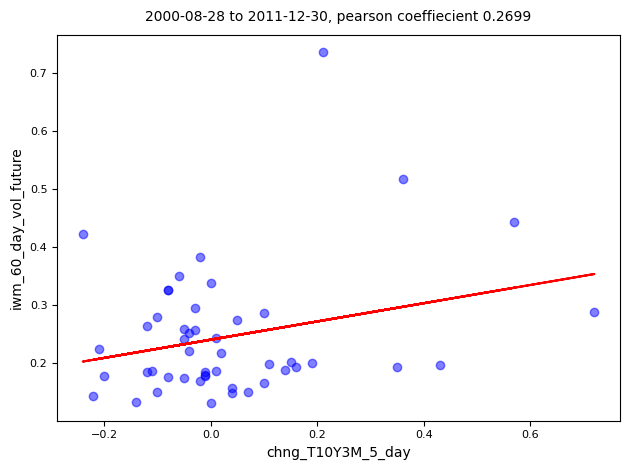

In [37]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_5_day', column, 60)

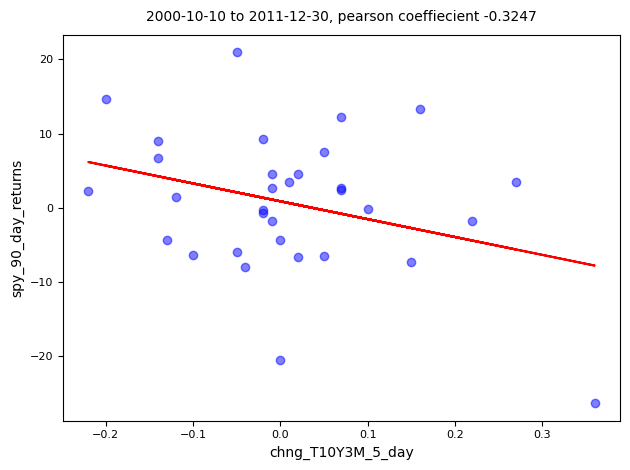

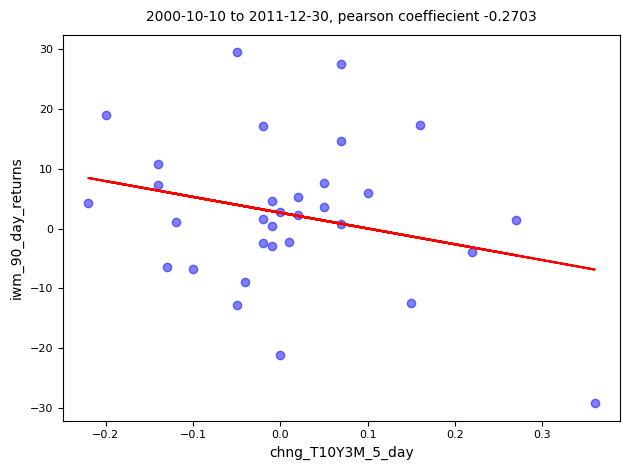

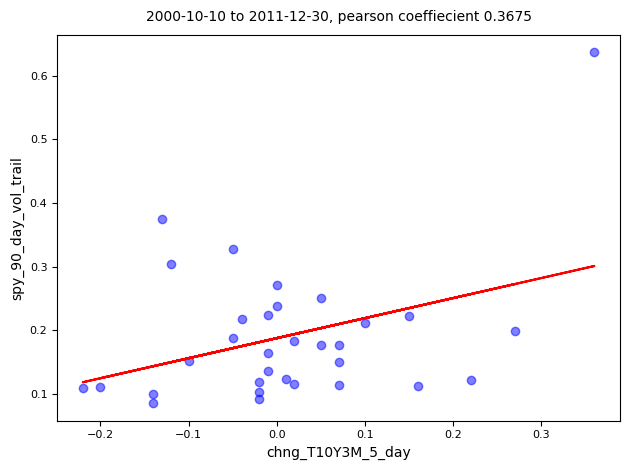

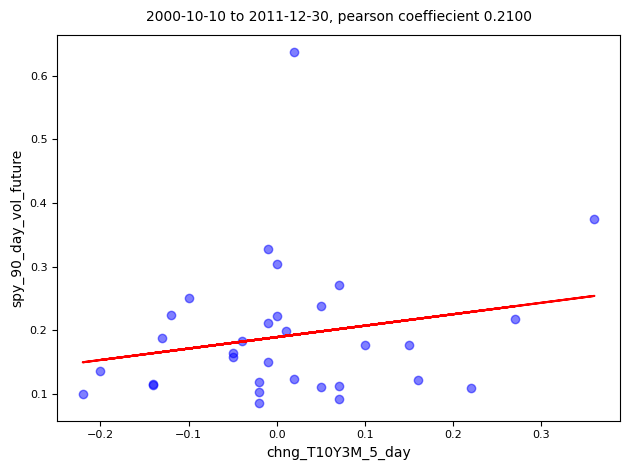

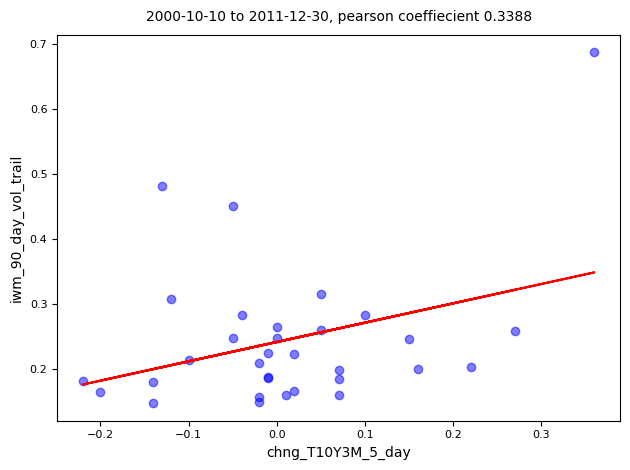

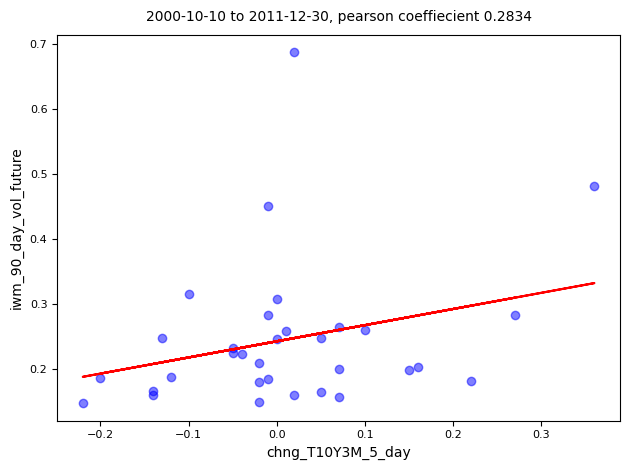

In [38]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_5_day', column, 90)

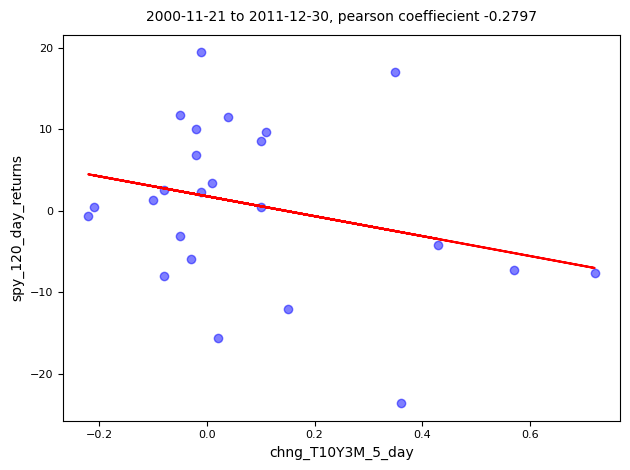

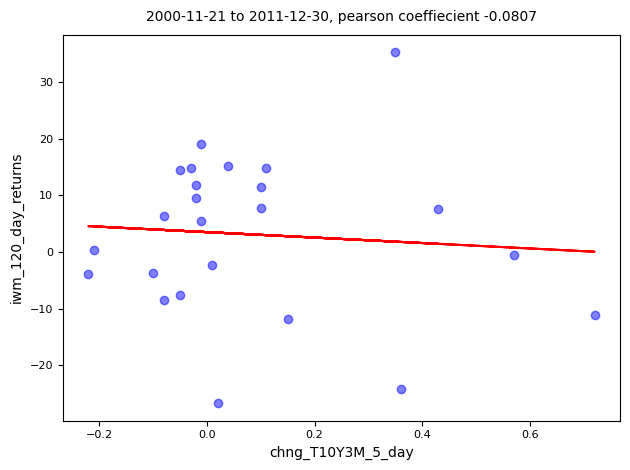

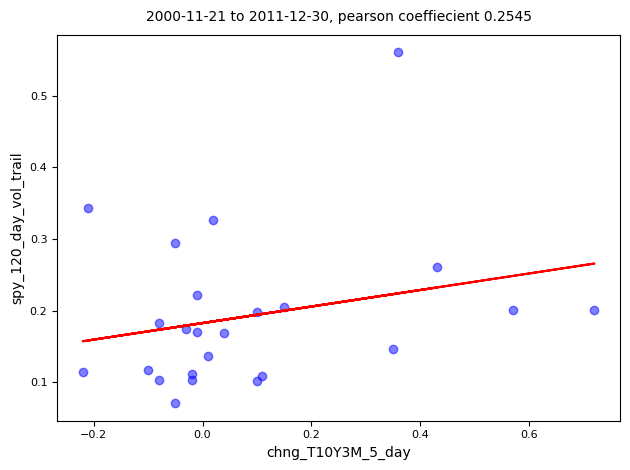

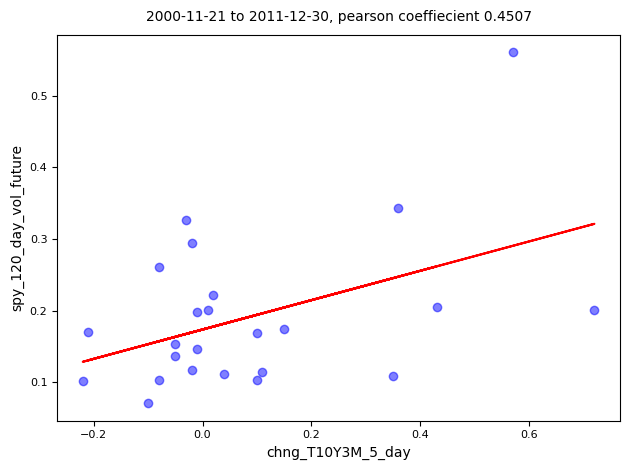

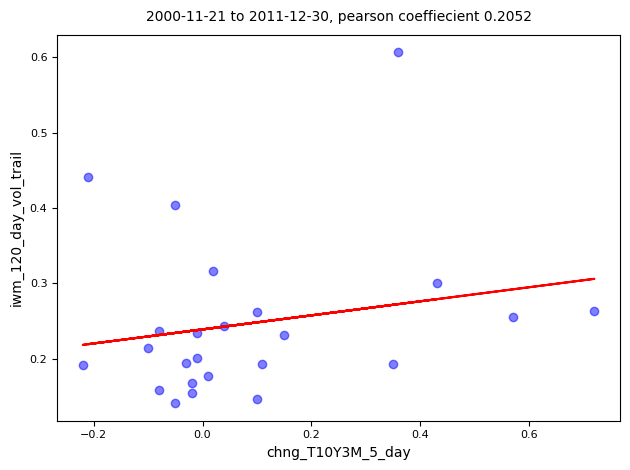

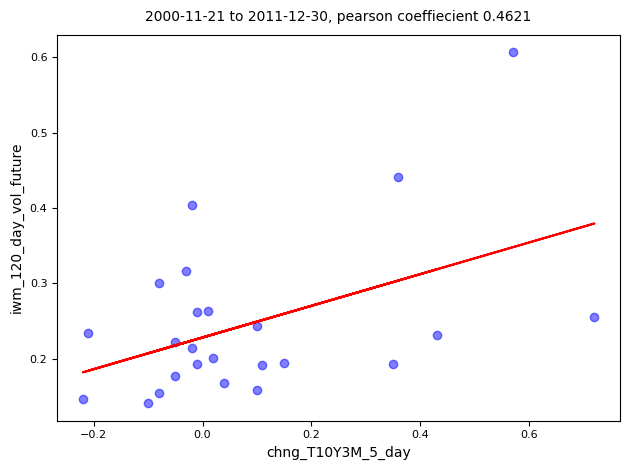

In [39]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_5_day', column, 120)

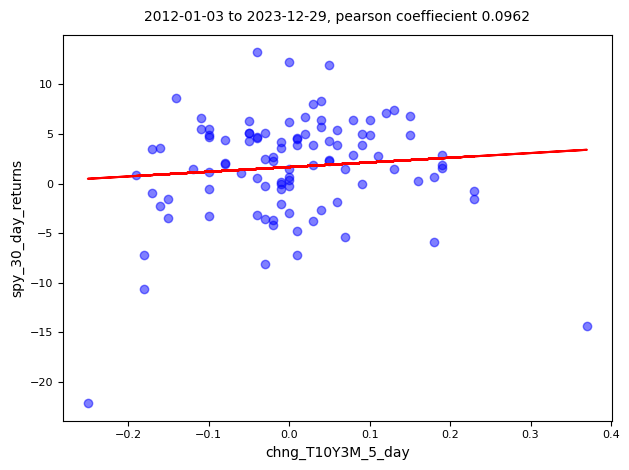

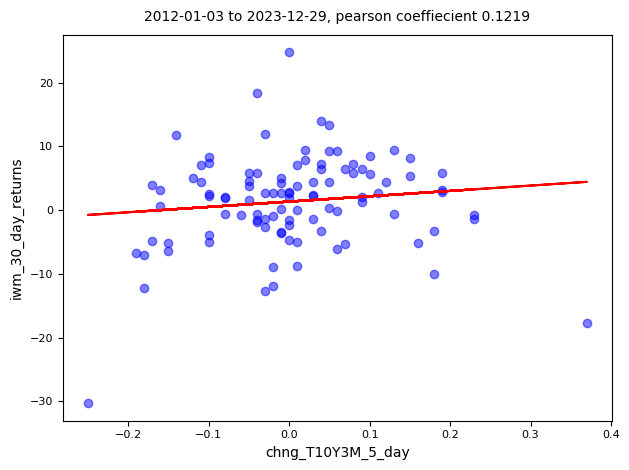

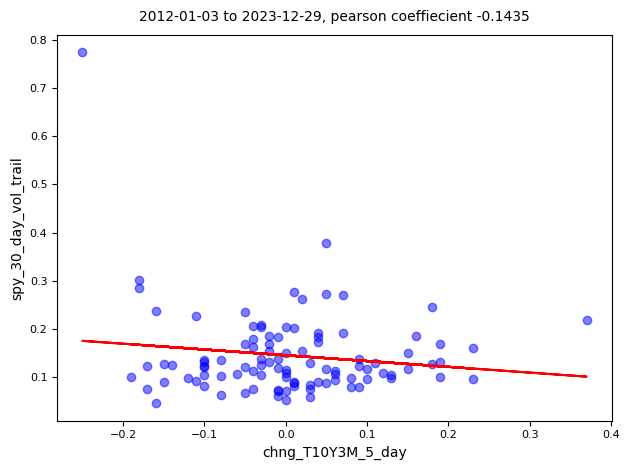

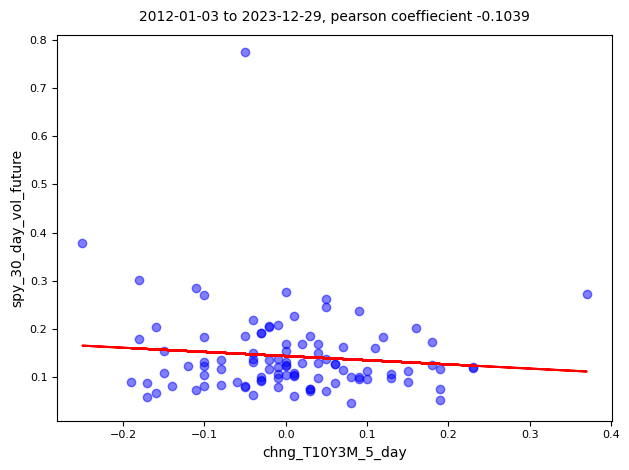

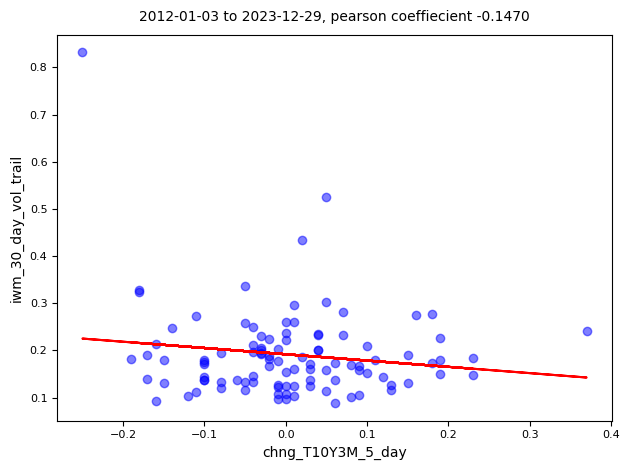

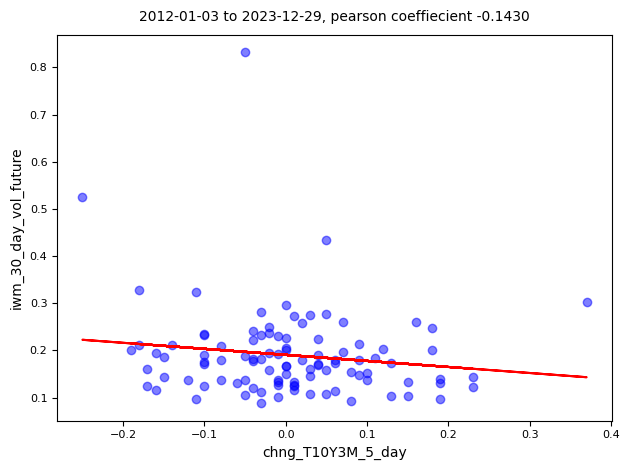

In [40]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_5_day', column, 30)

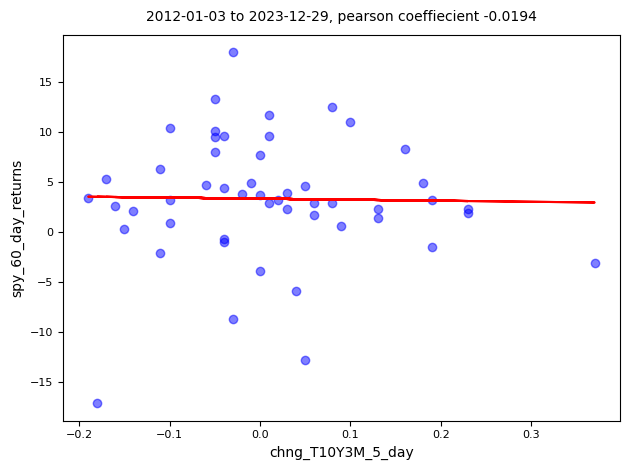

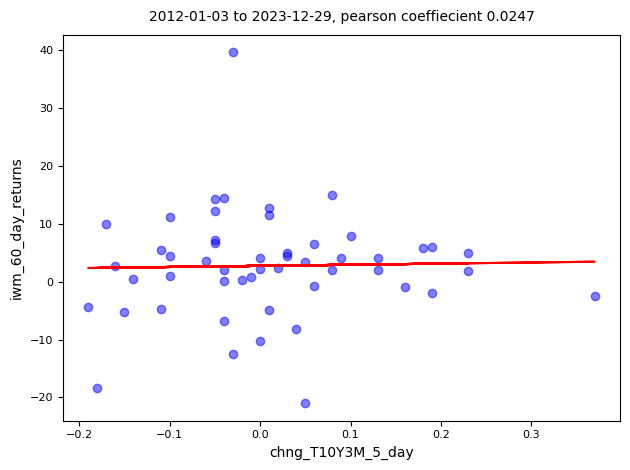

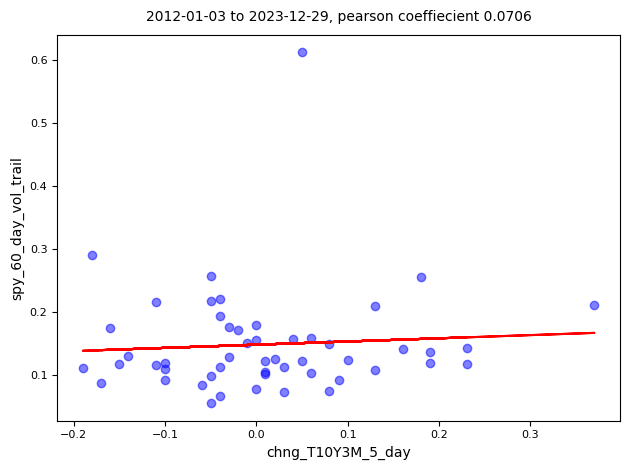

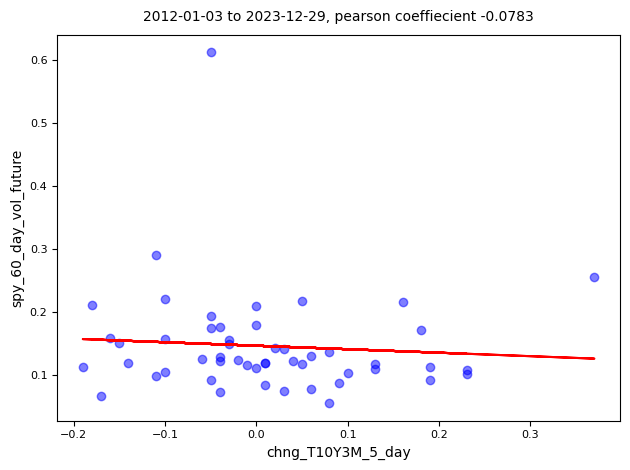

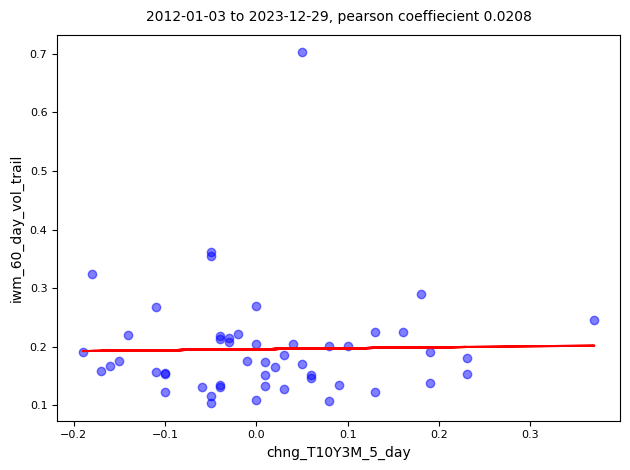

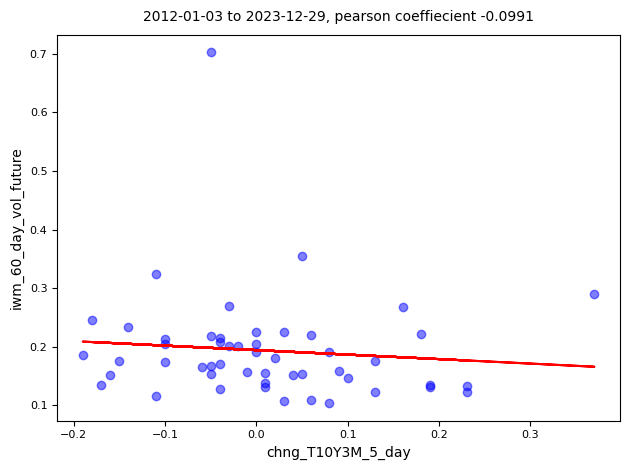

In [41]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_5_day', column, 60)

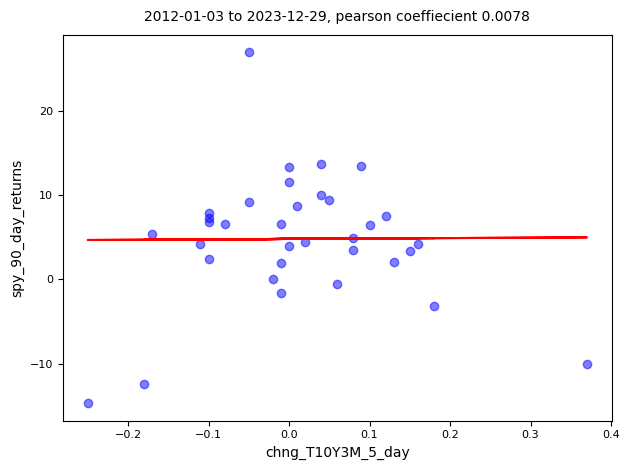

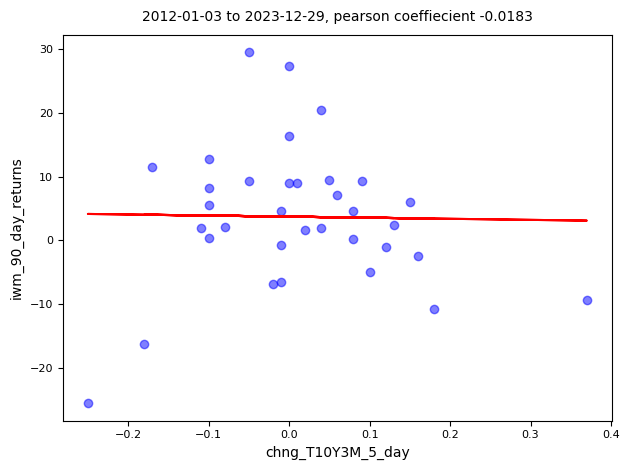

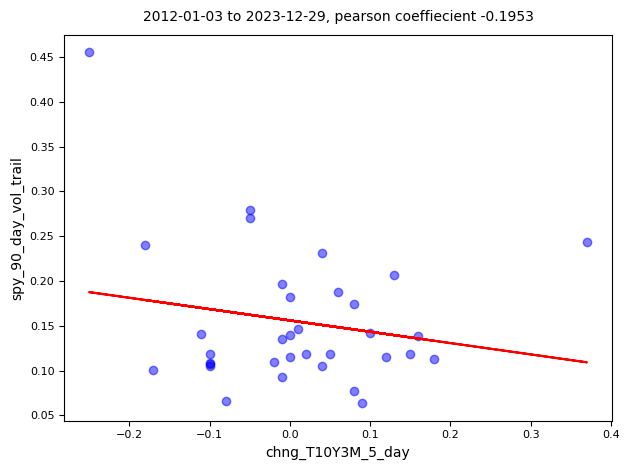

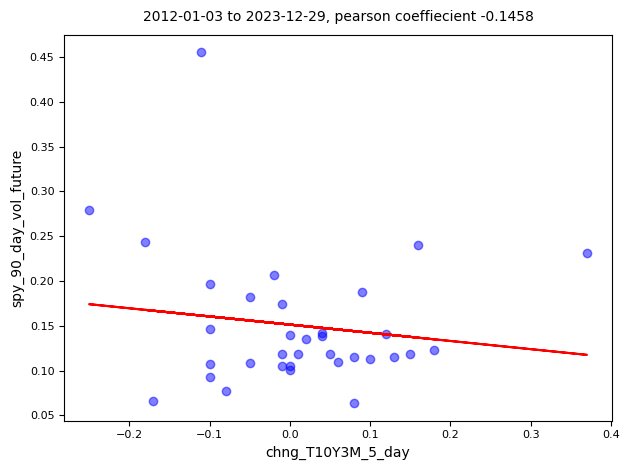

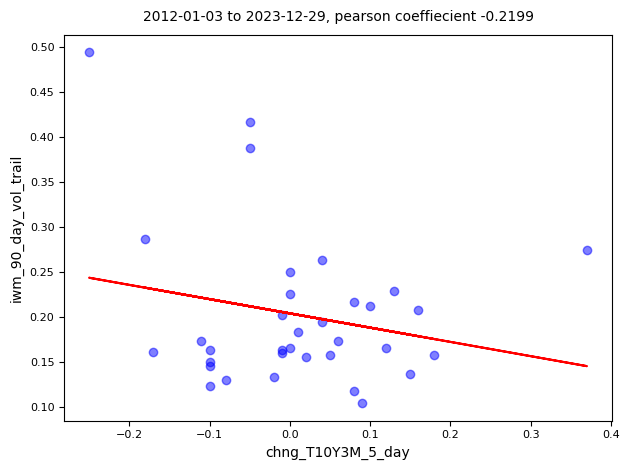

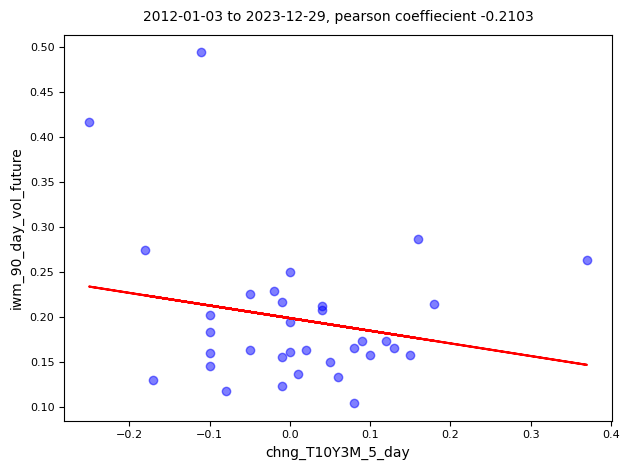

In [42]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_5_day', column, 90)

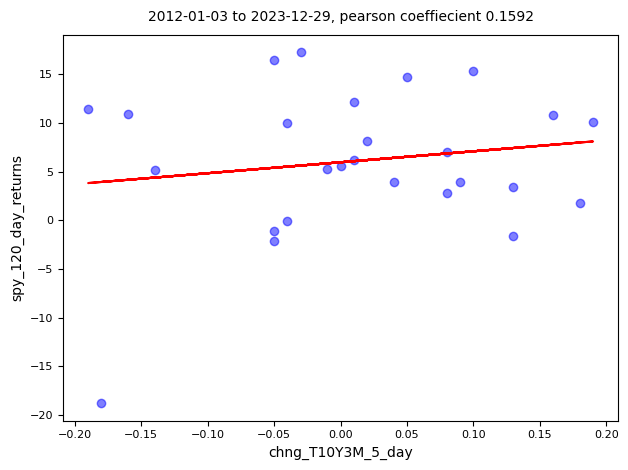

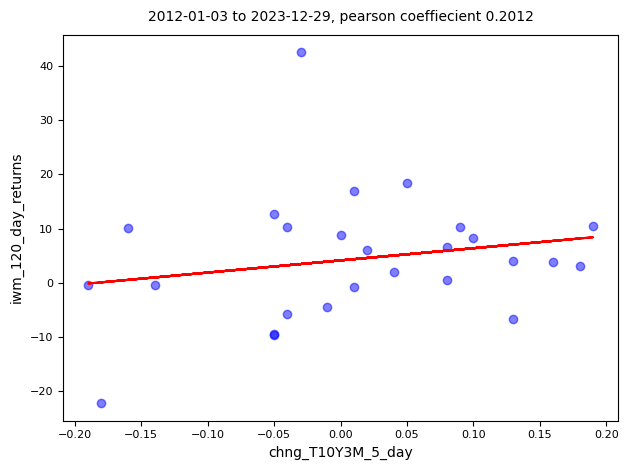

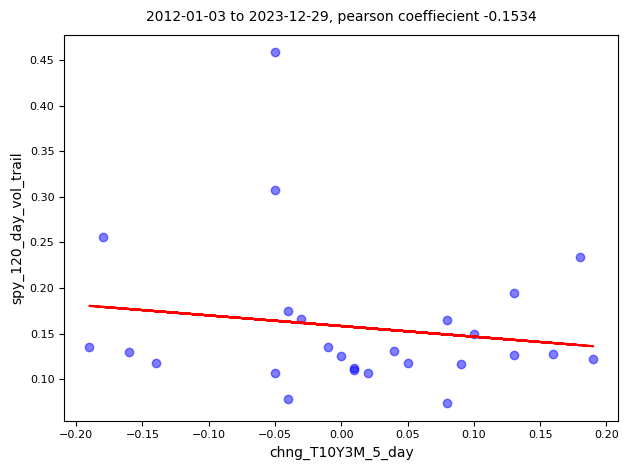

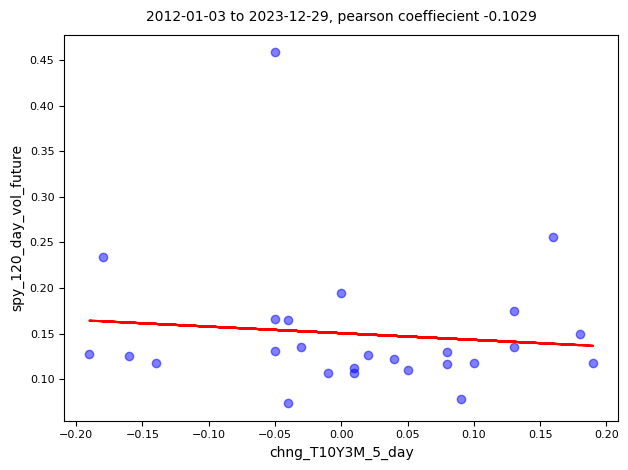

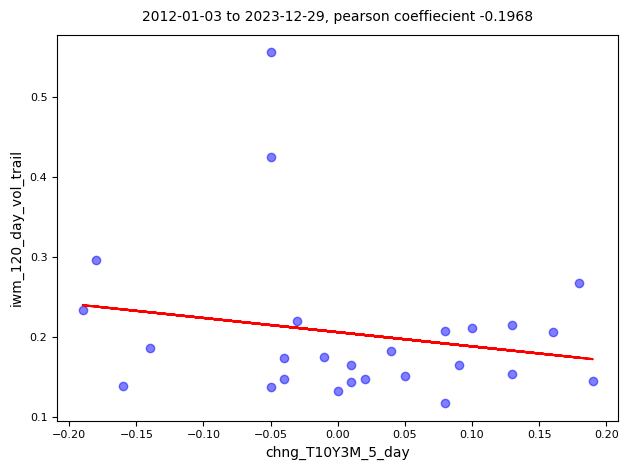

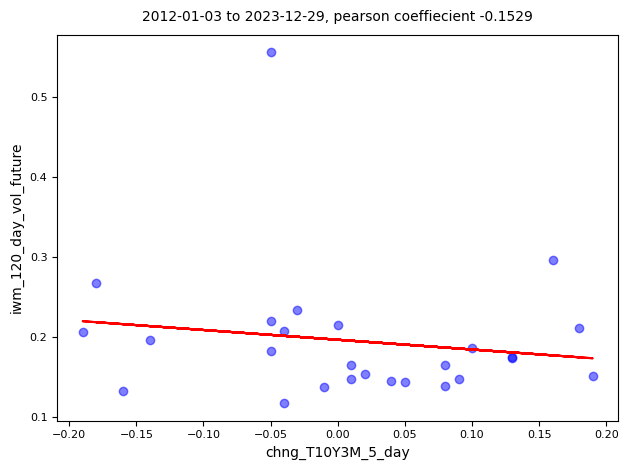

In [43]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_5_day', column, 120)

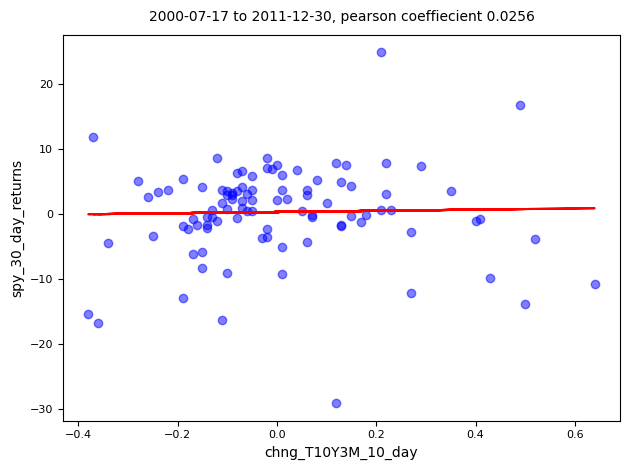

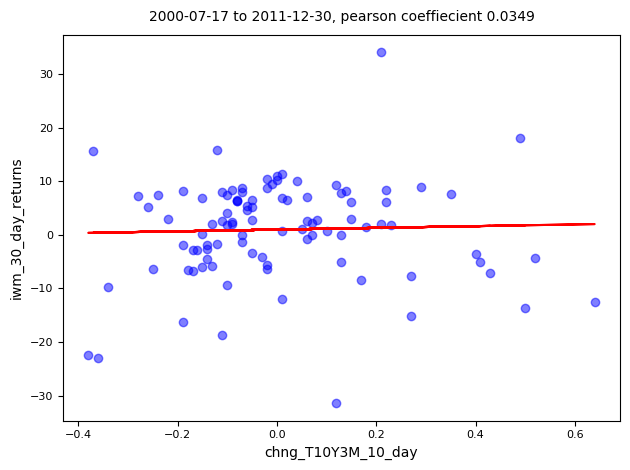

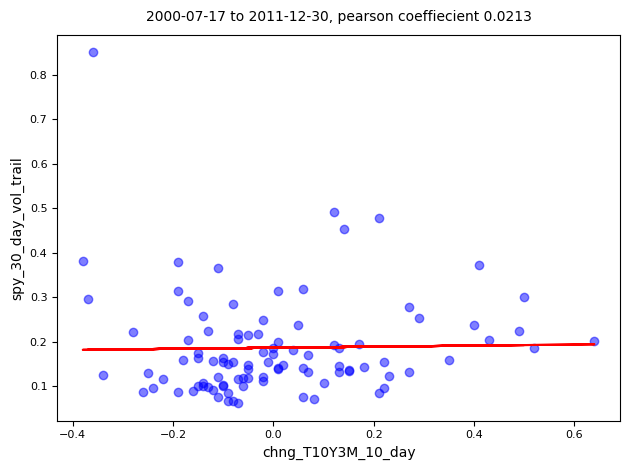

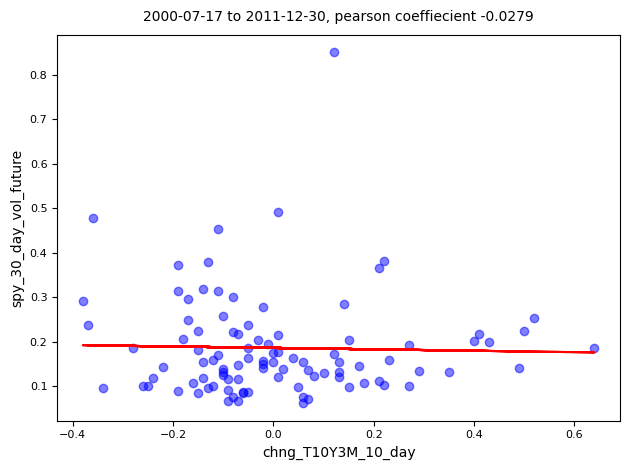

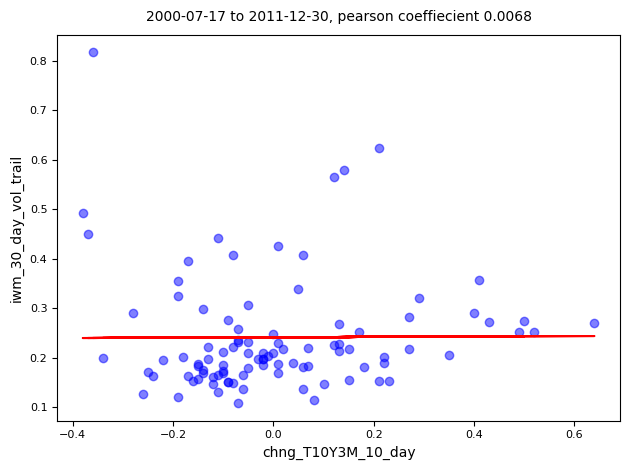

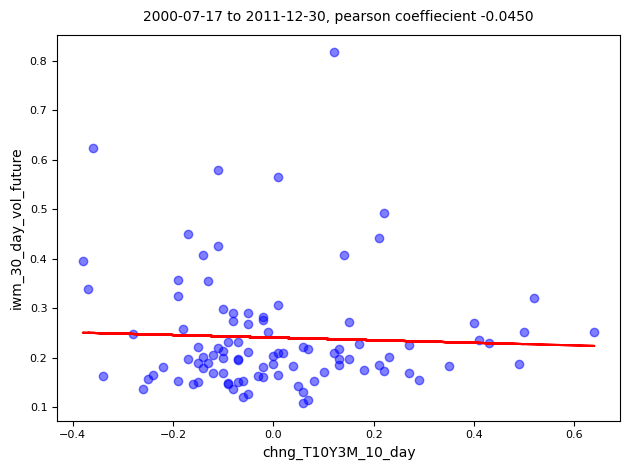

In [44]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_10_day', column, 30)

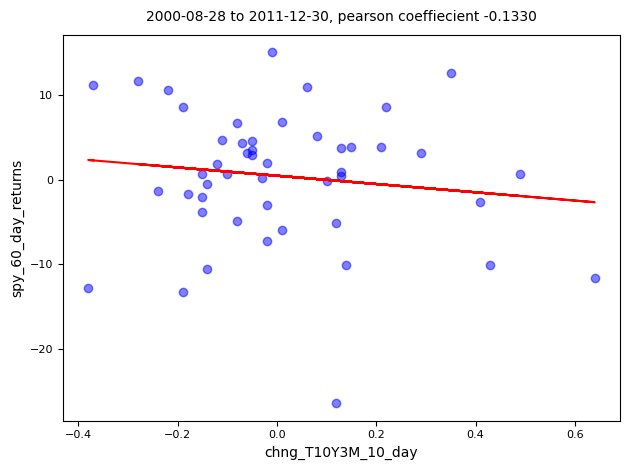

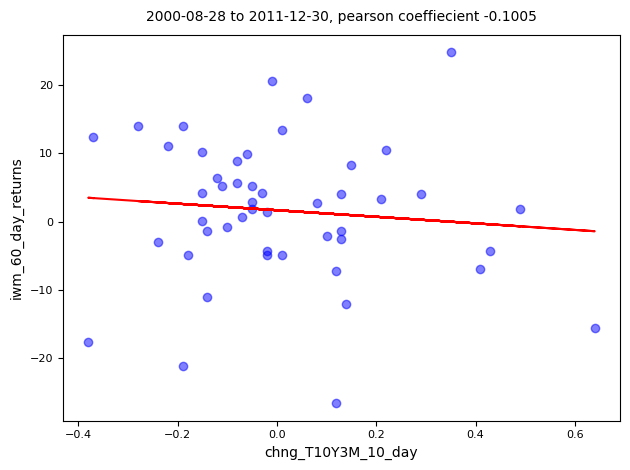

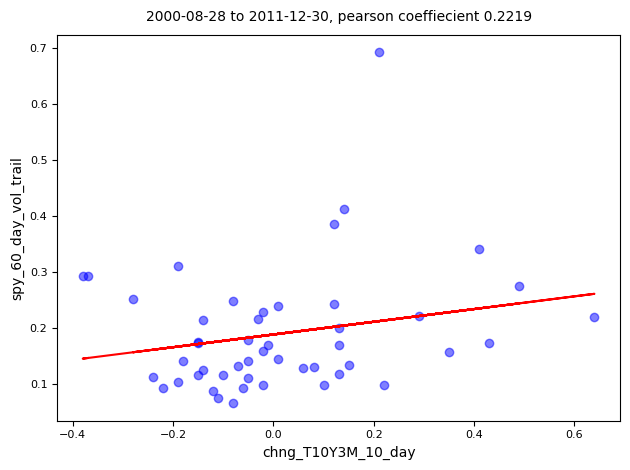

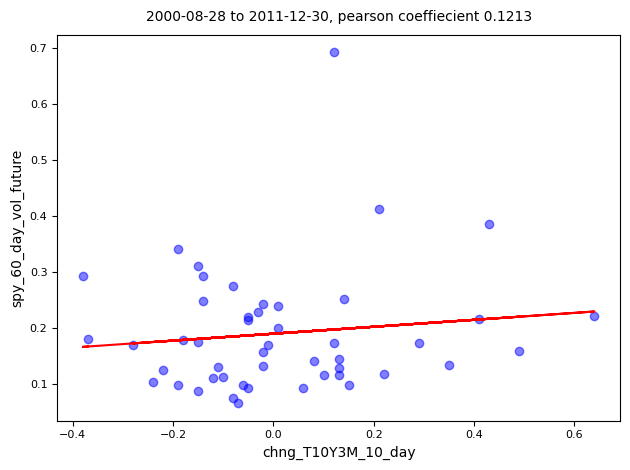

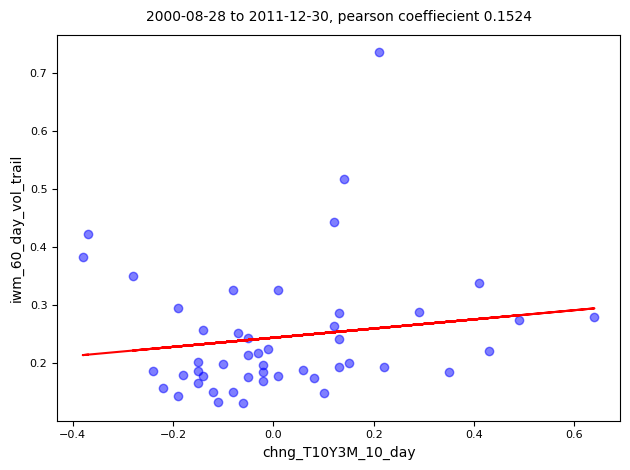

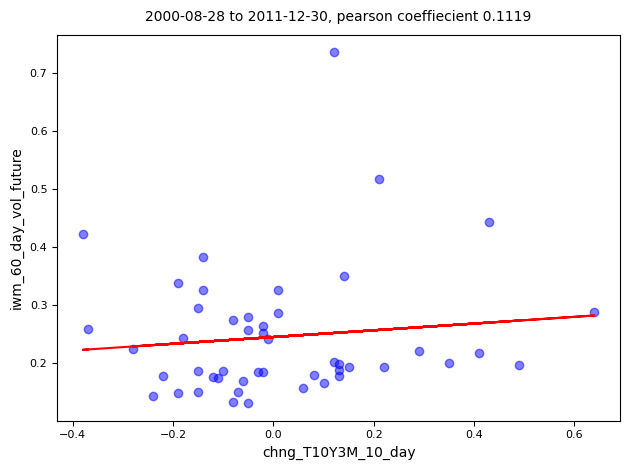

In [45]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_10_day', column, 60)

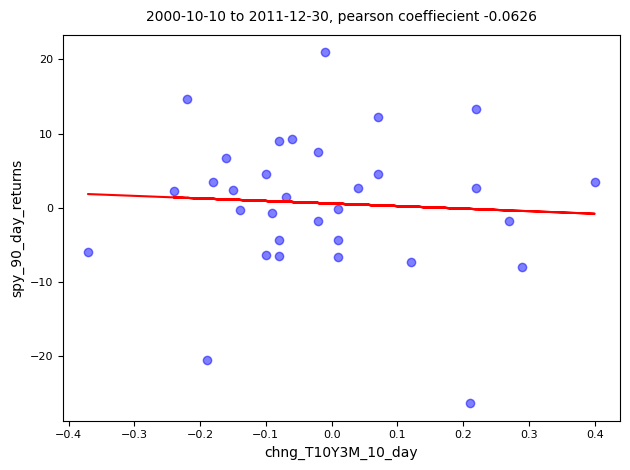

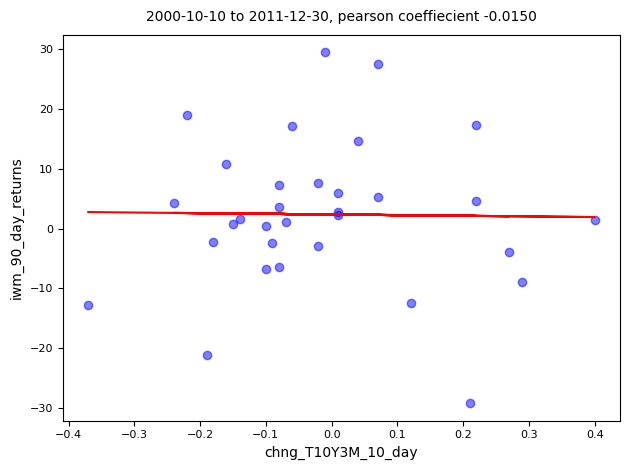

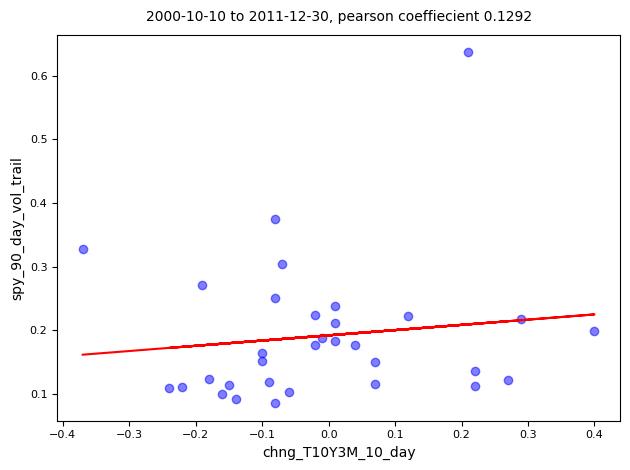

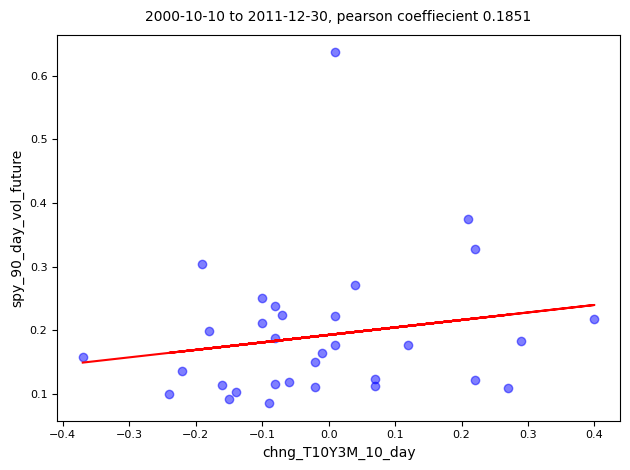

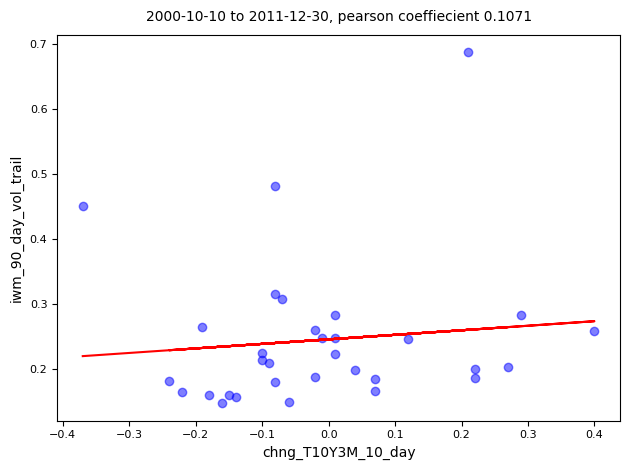

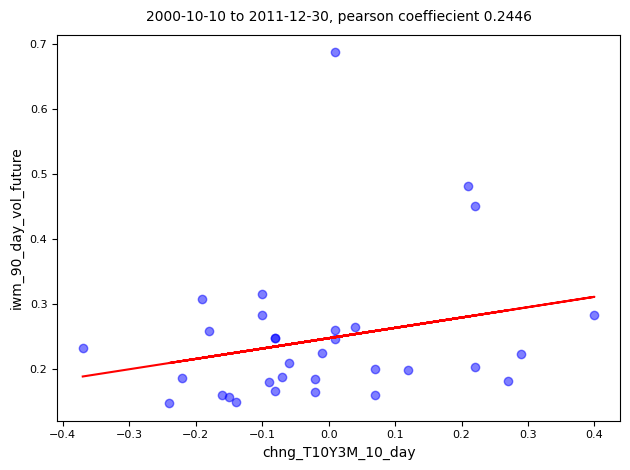

In [46]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_10_day', column, 90)

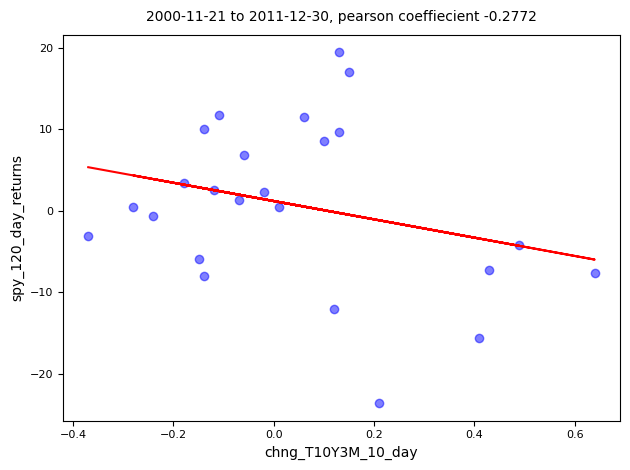

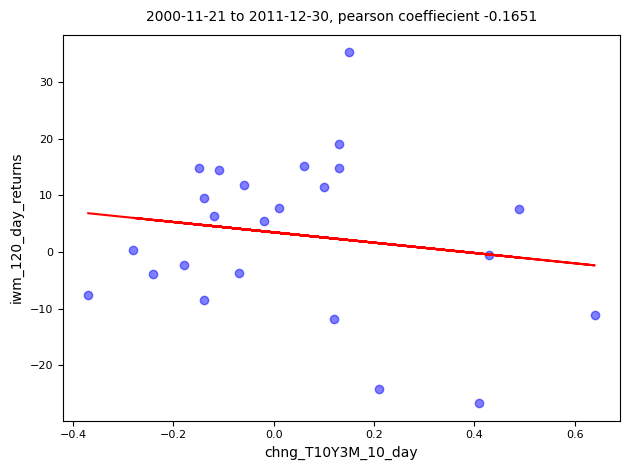

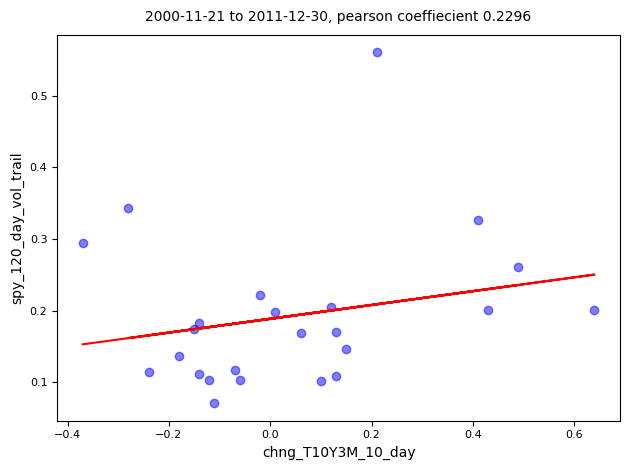

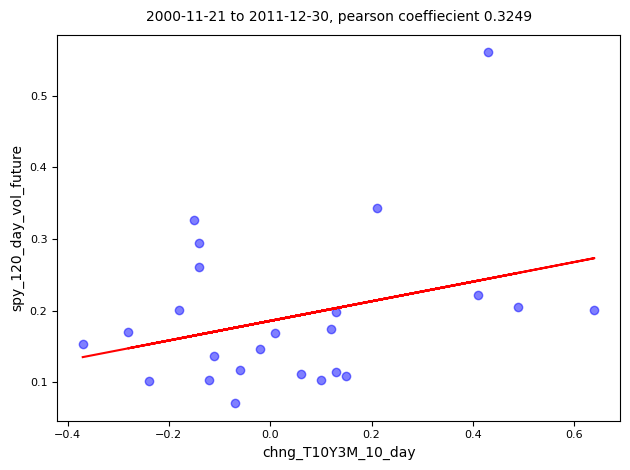

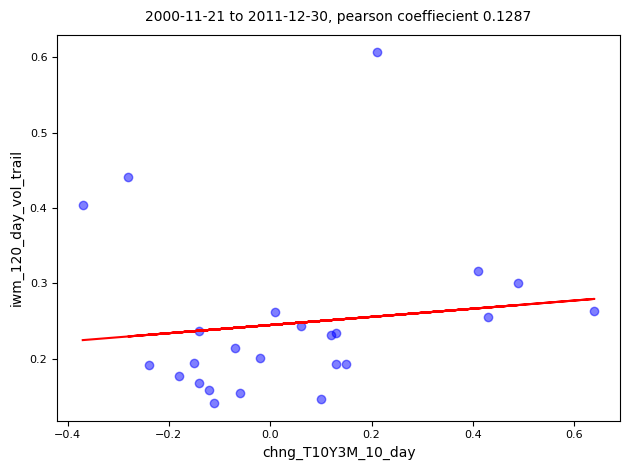

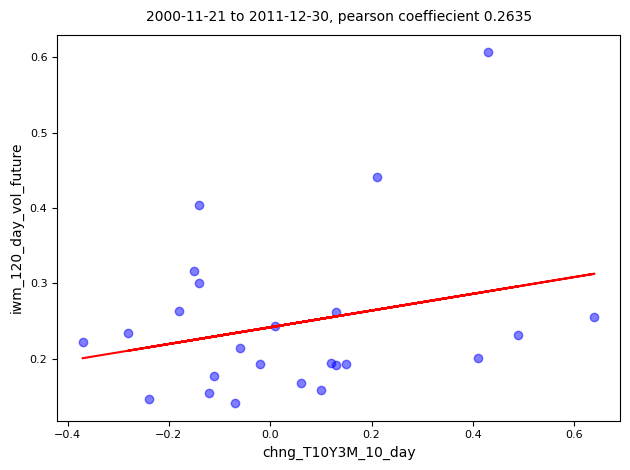

In [47]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_10_day', column, 120)

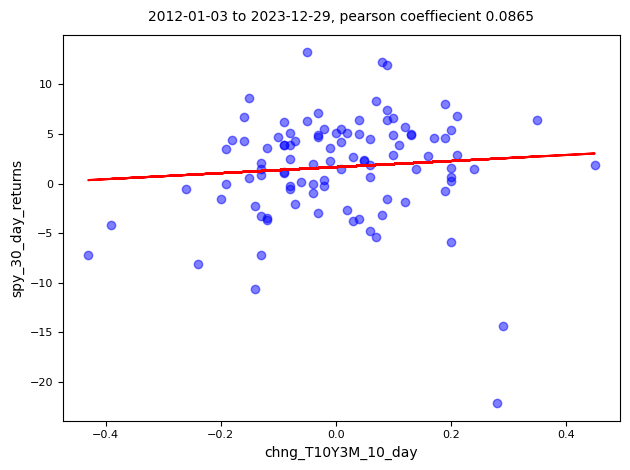

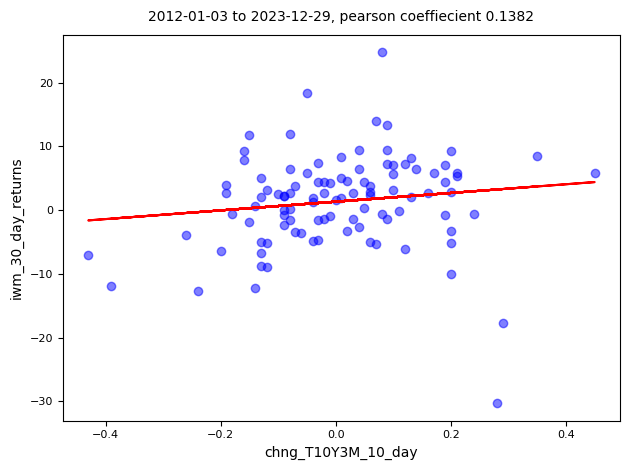

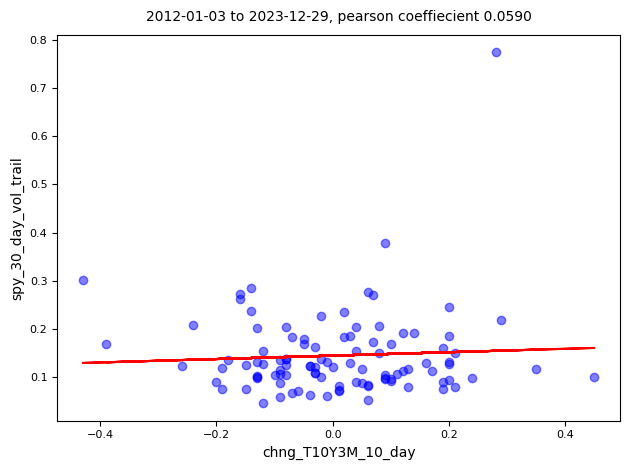

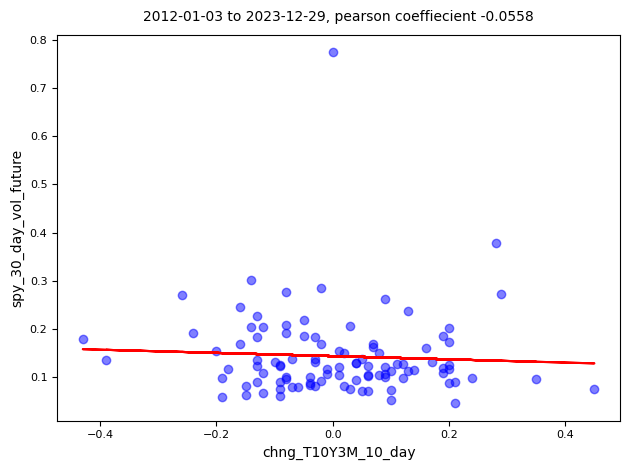

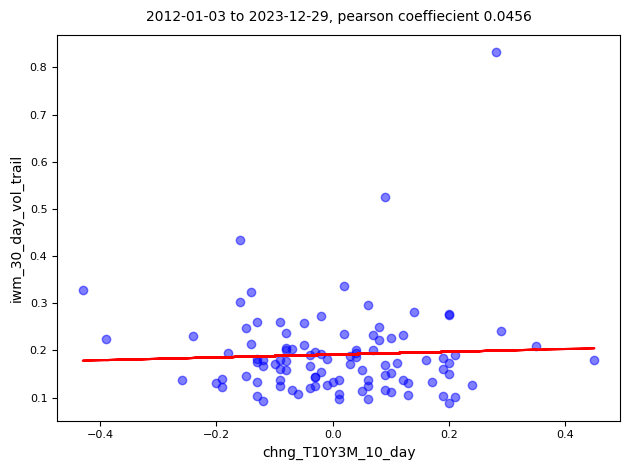

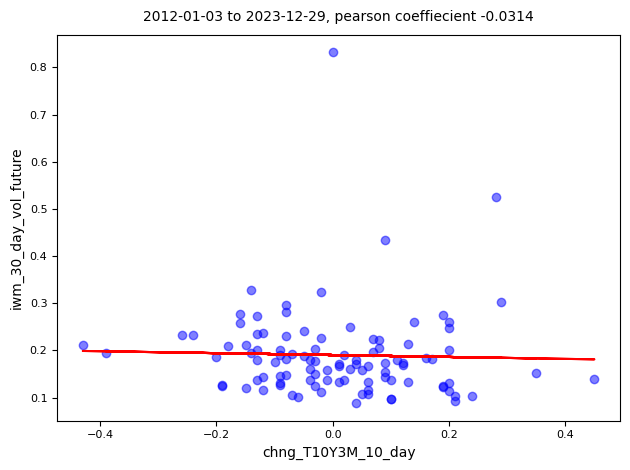

In [48]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_10_day', column, 30)

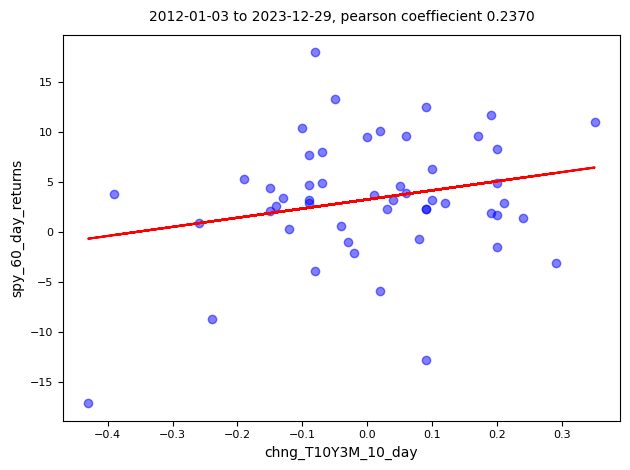

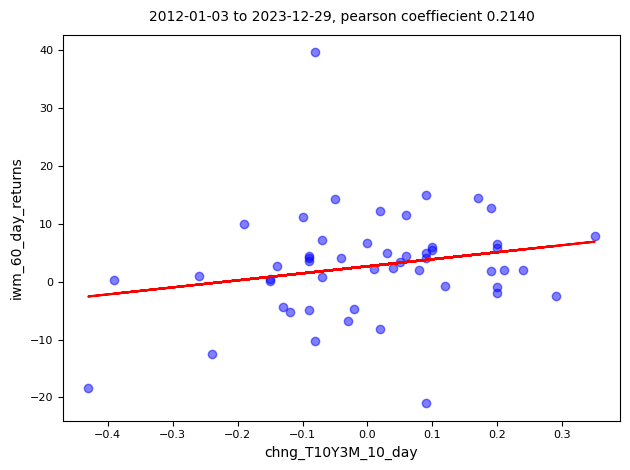

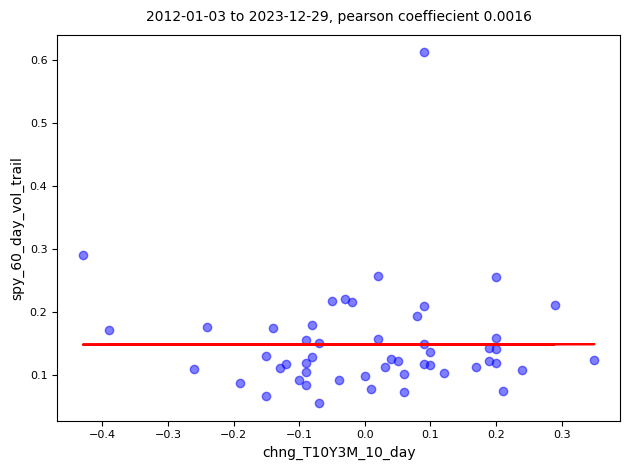

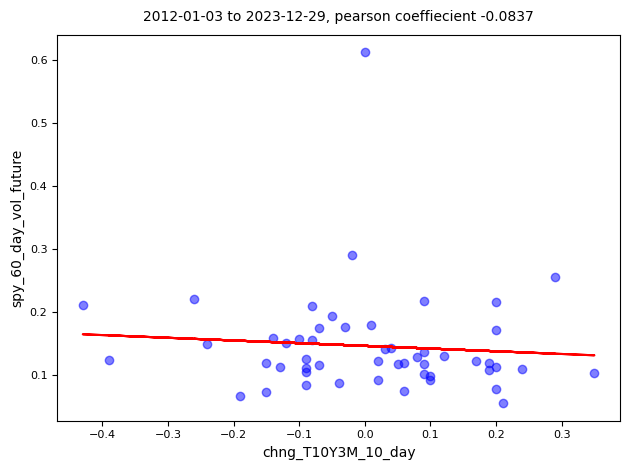

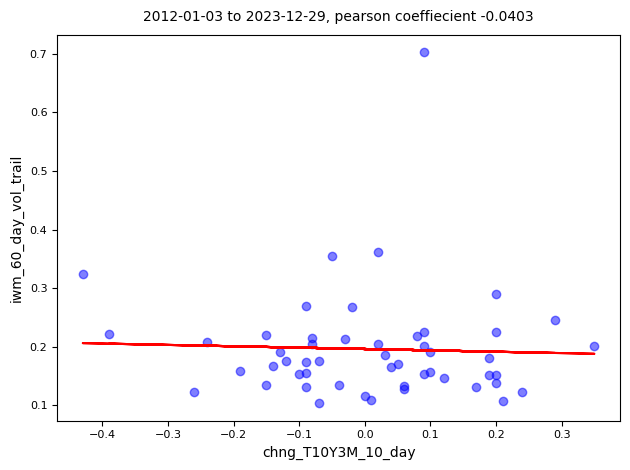

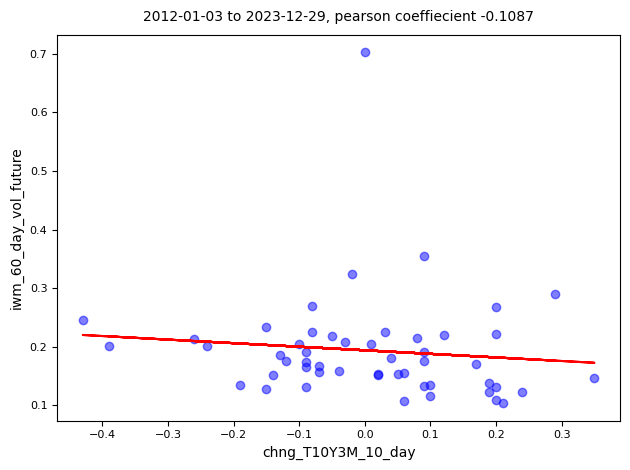

In [49]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_10_day', column, 60)

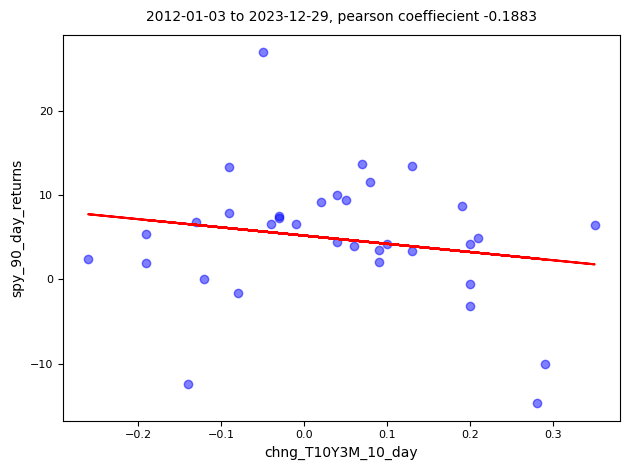

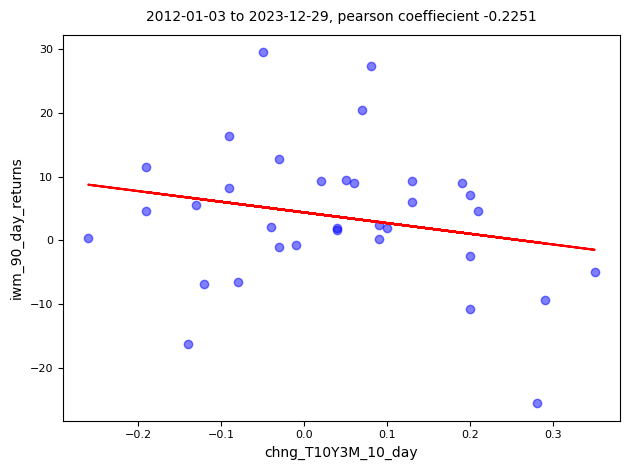

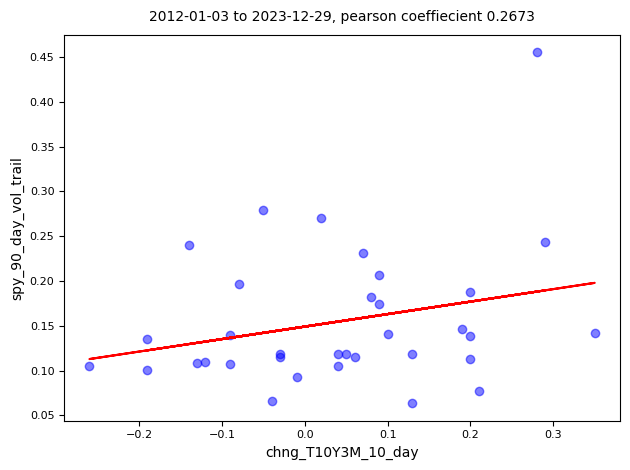

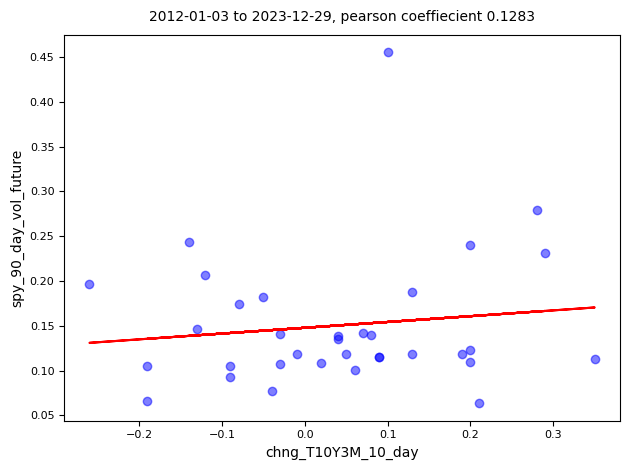

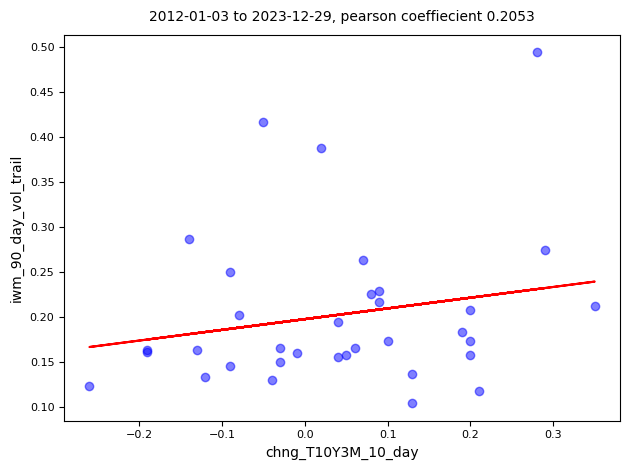

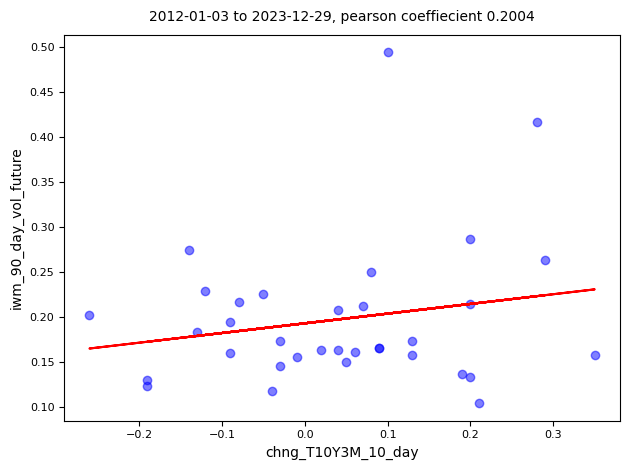

In [50]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_10_day', column, 90)

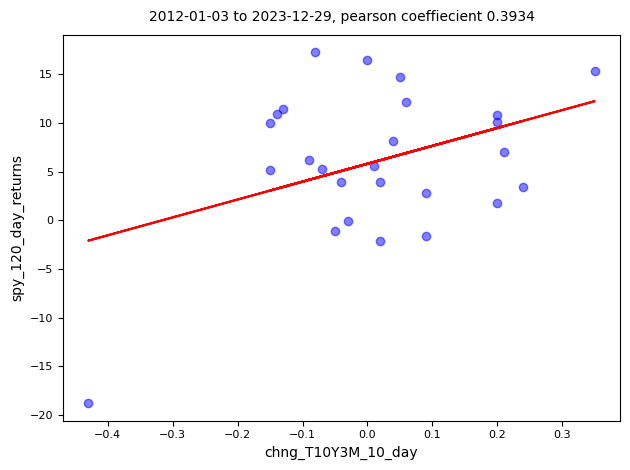

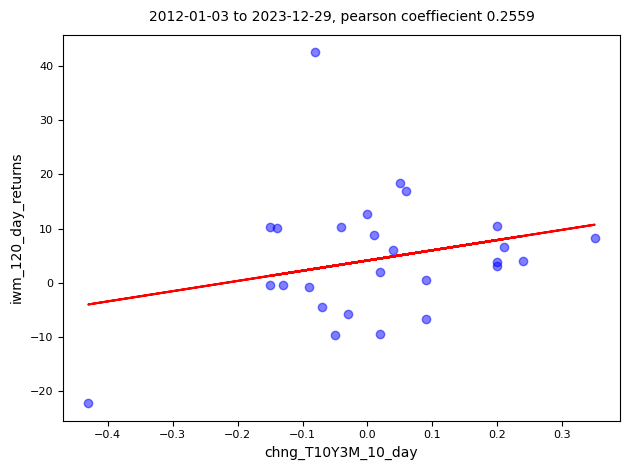

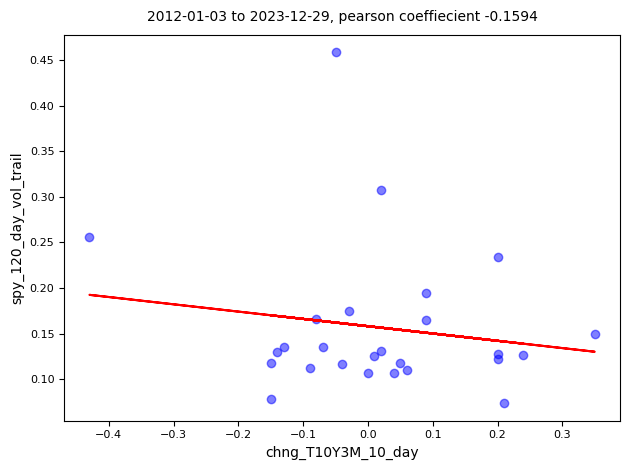

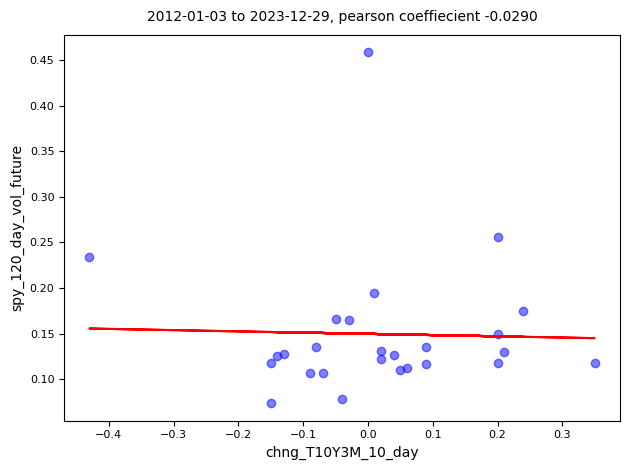

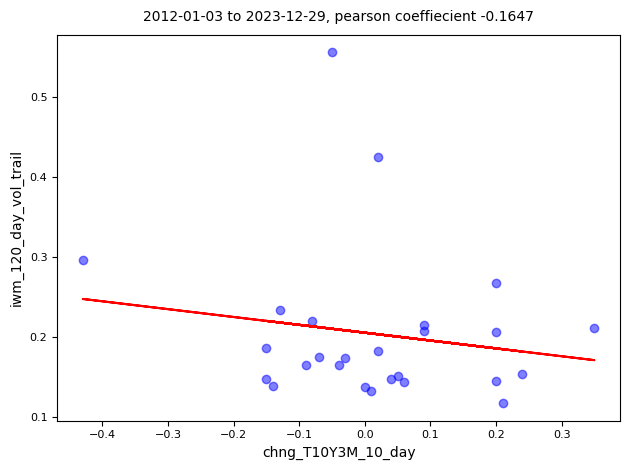

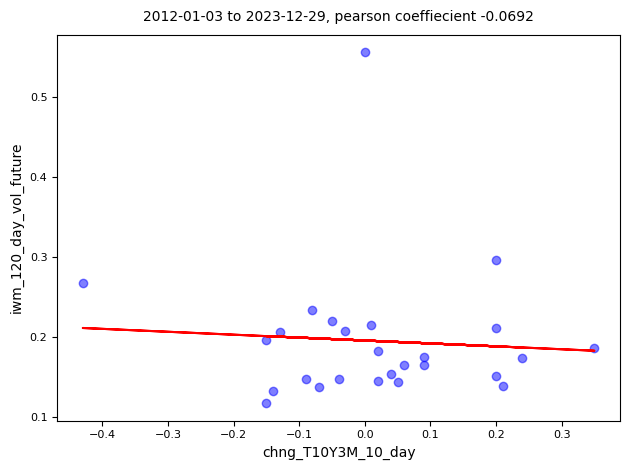

In [51]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_10_day', column, 120)

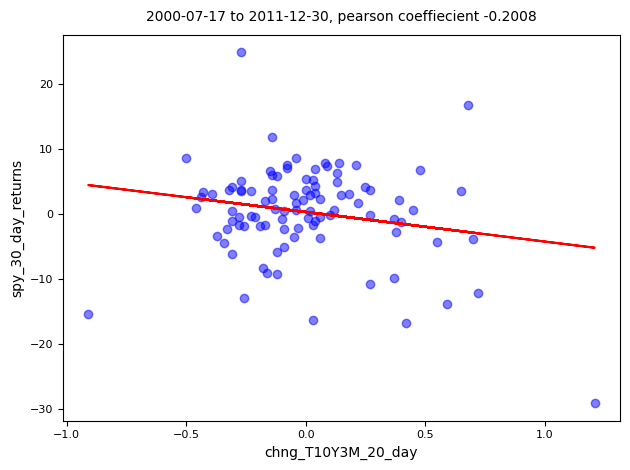

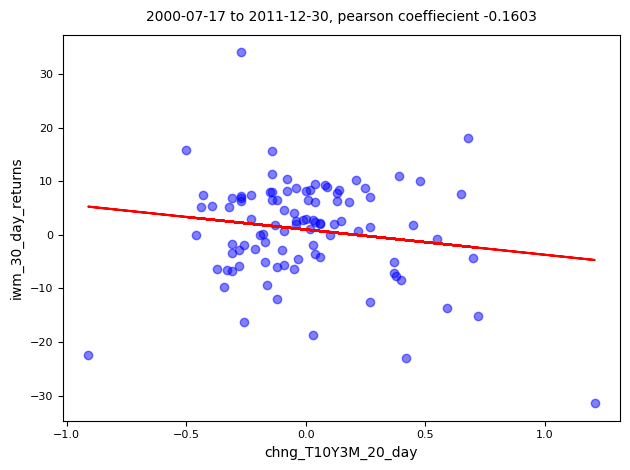

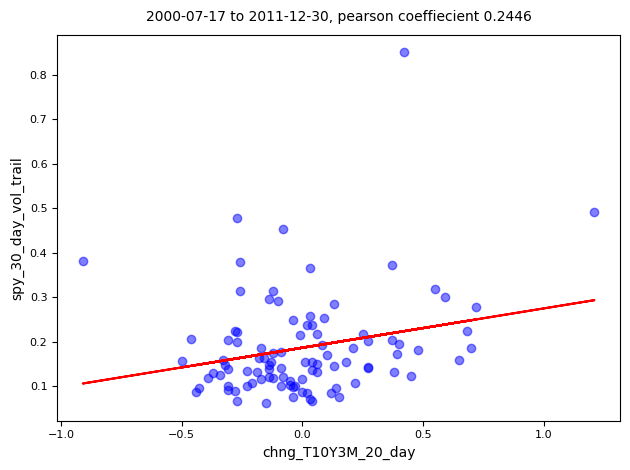

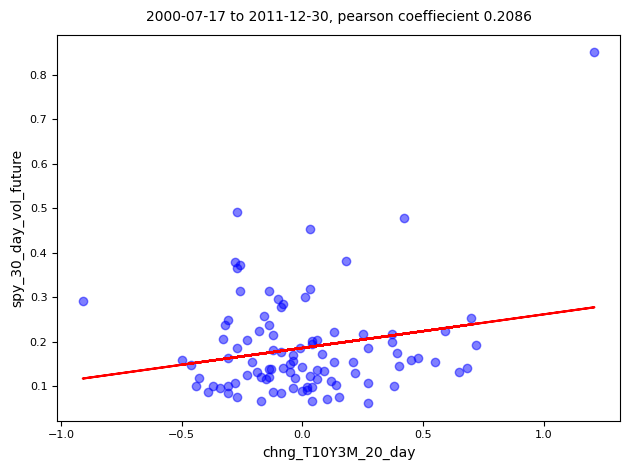

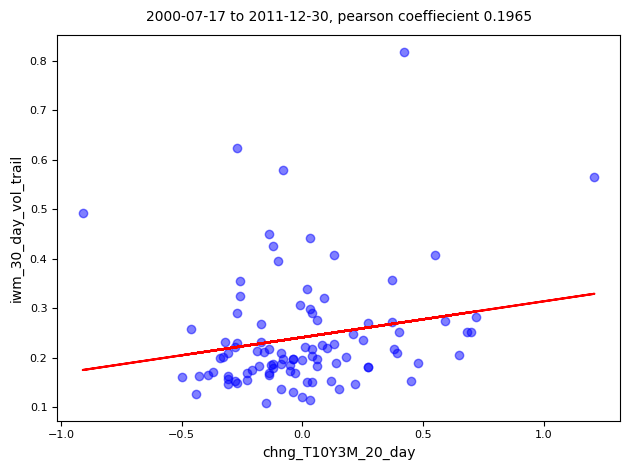

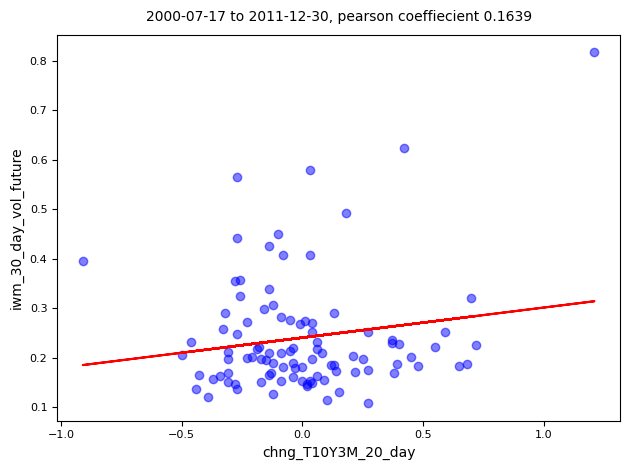

In [52]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_20_day', column, 30)

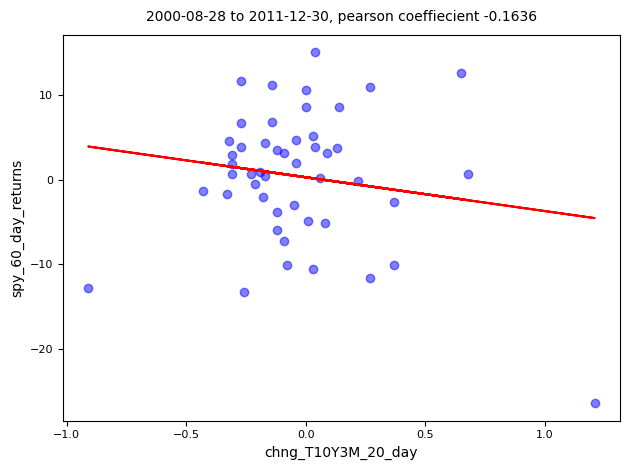

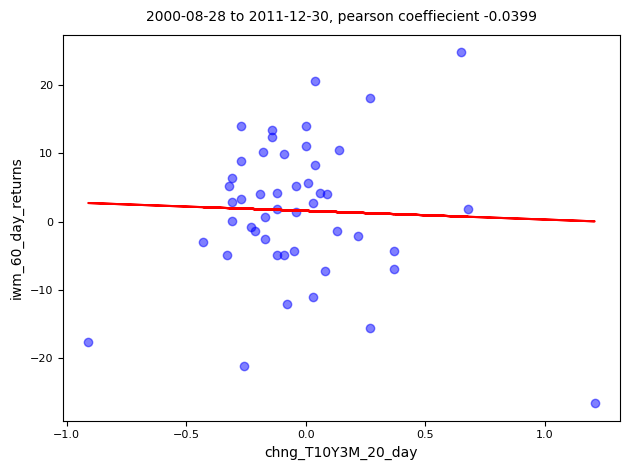

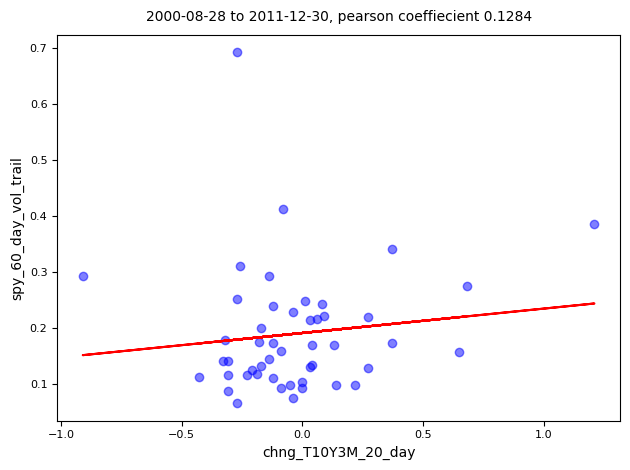

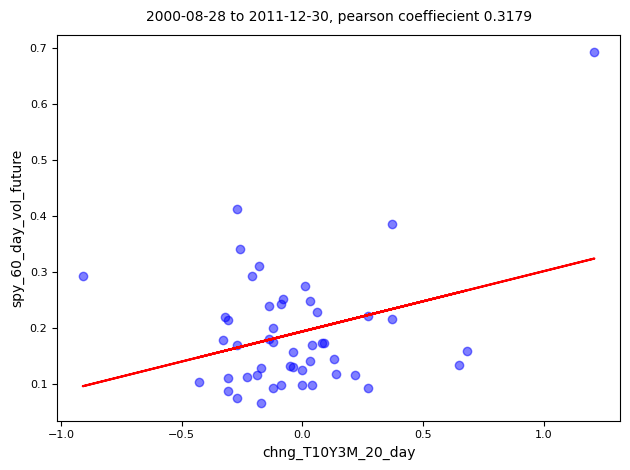

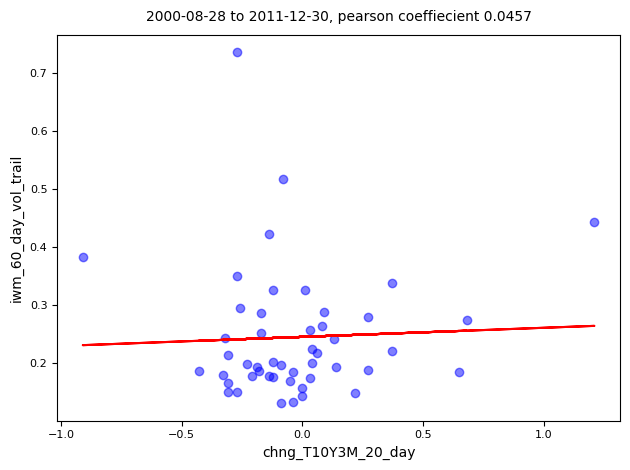

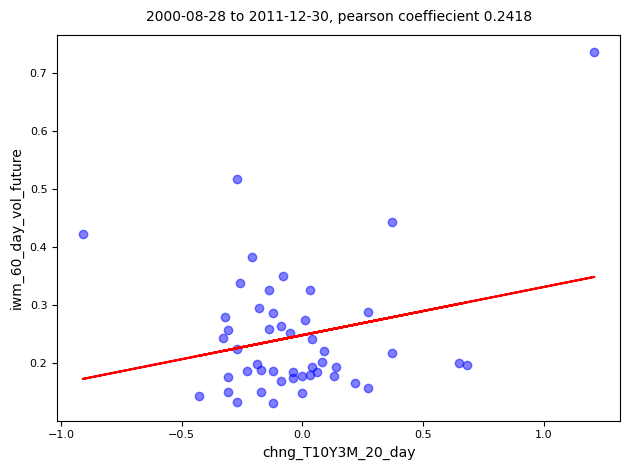

In [53]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_20_day', column, 60)

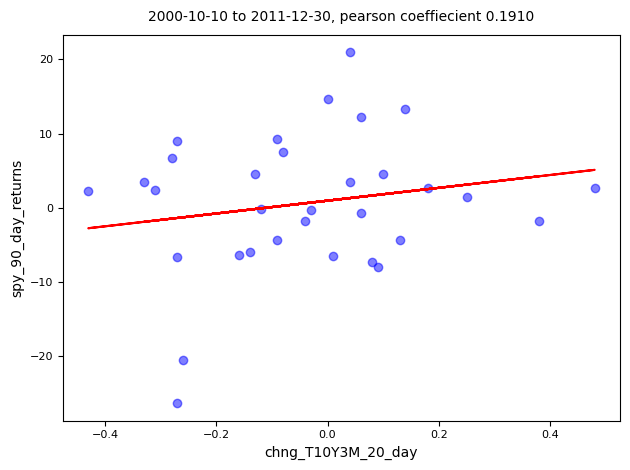

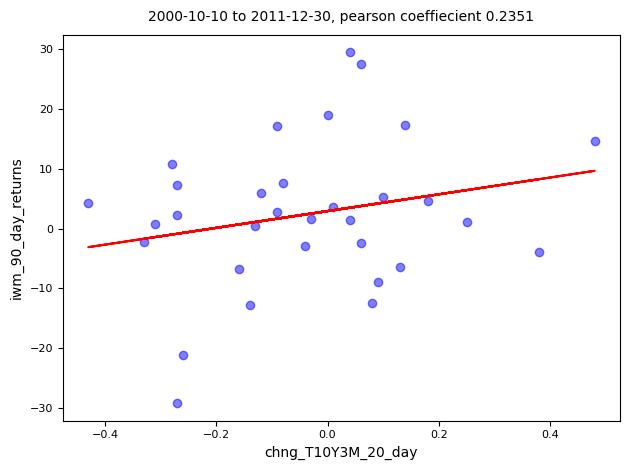

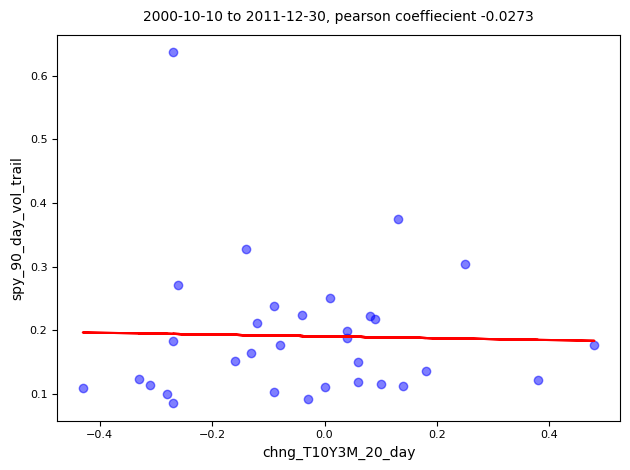

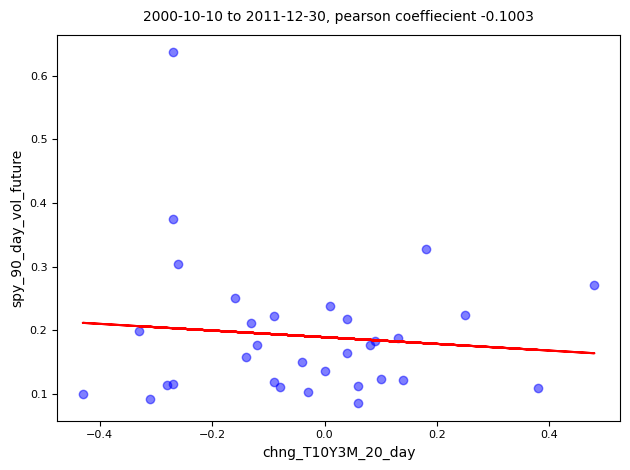

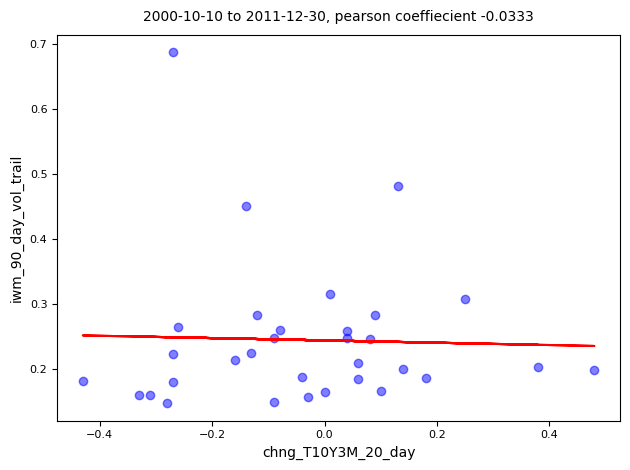

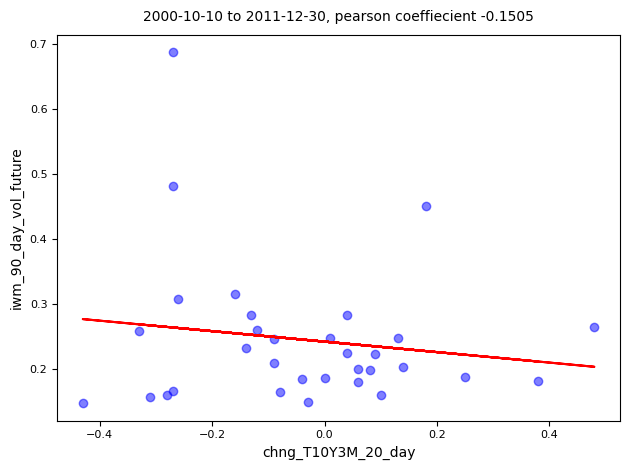

In [54]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_20_day', column, 90)

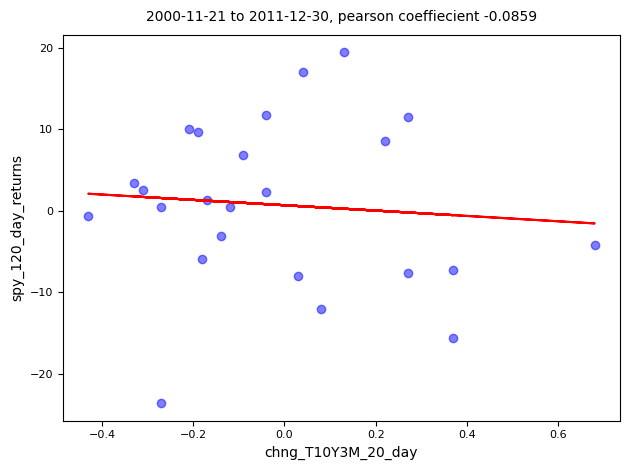

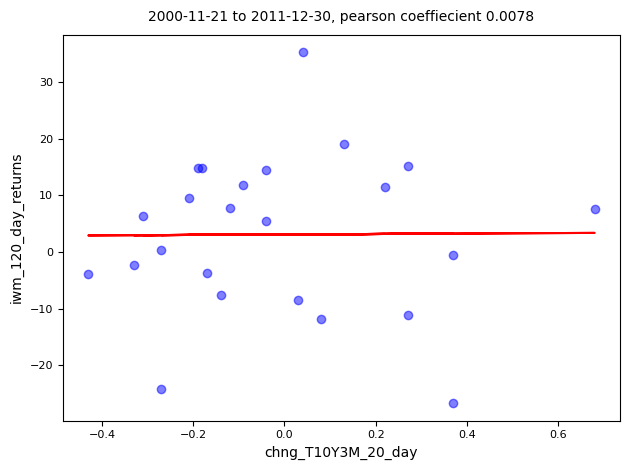

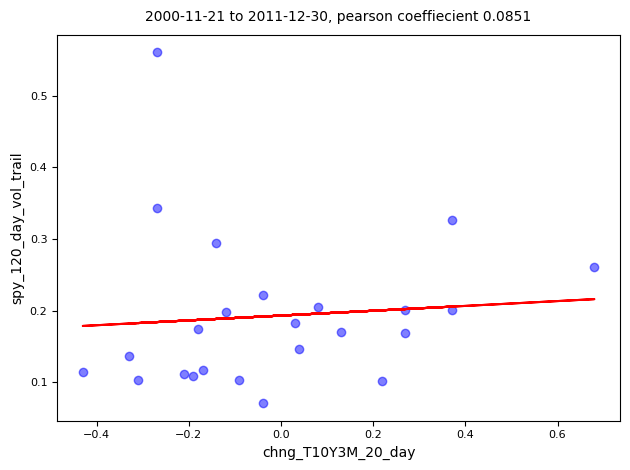

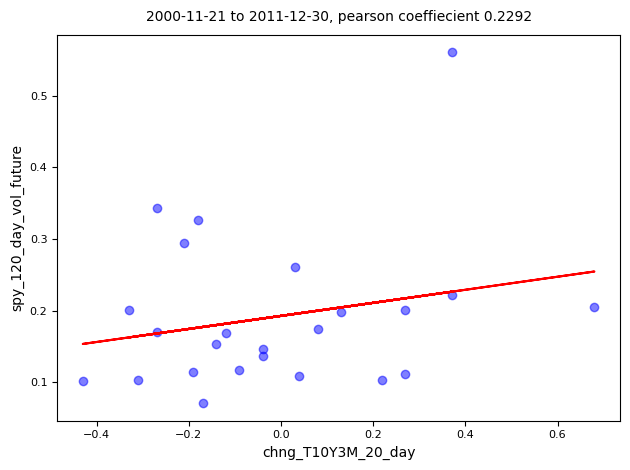

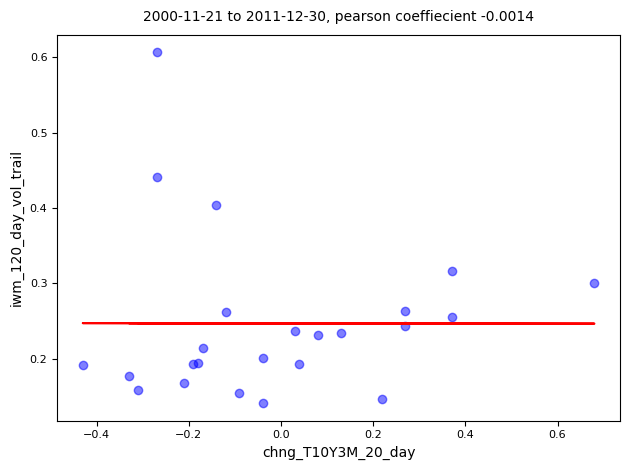

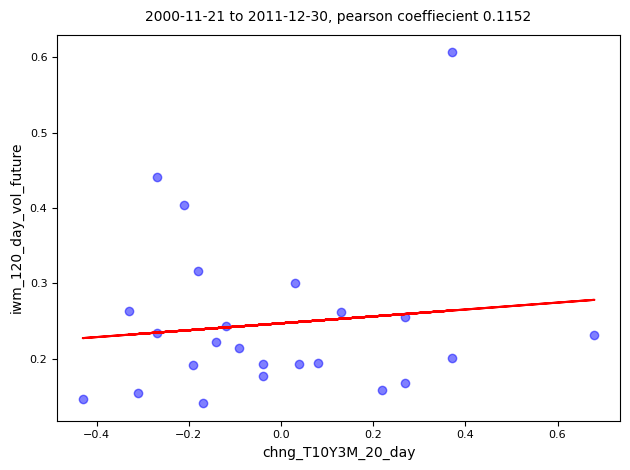

In [55]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2000_2012, 'chng_T10Y3M_20_day', column, 120)

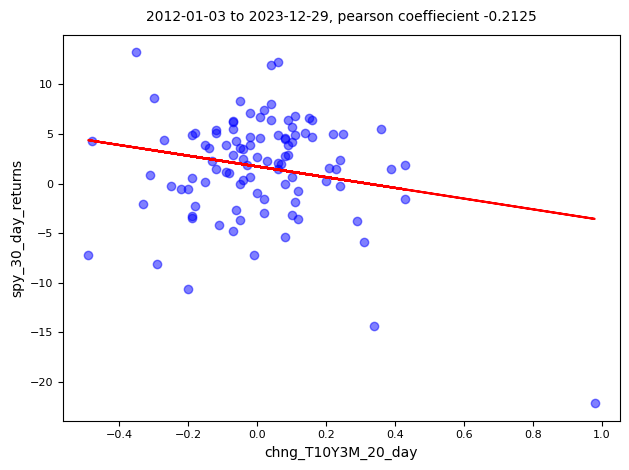

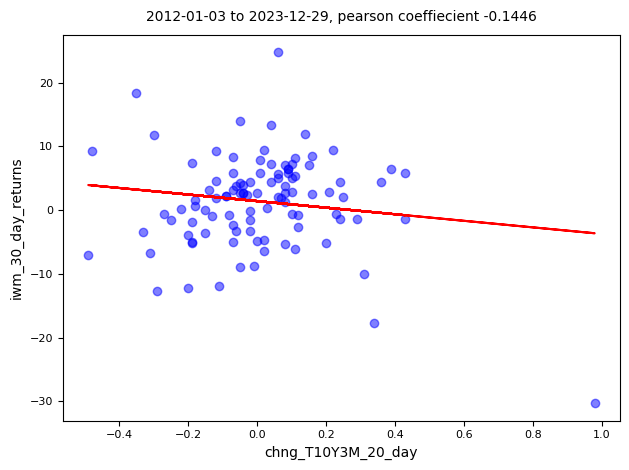

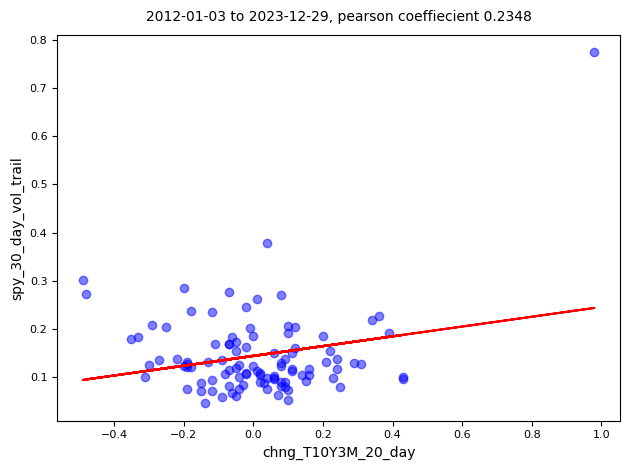

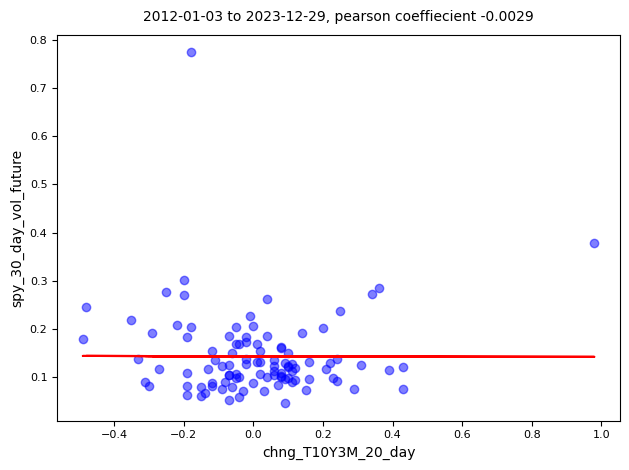

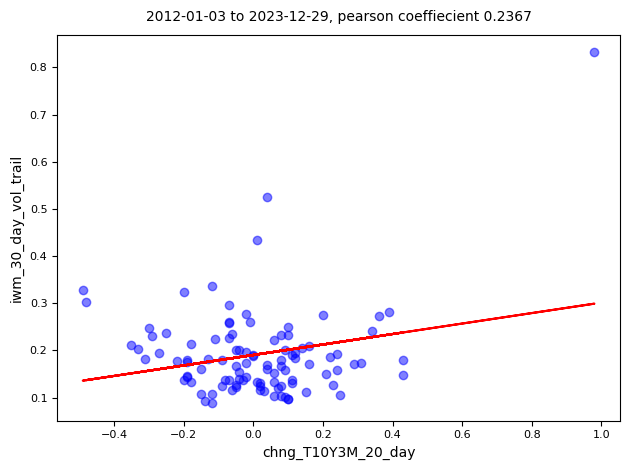

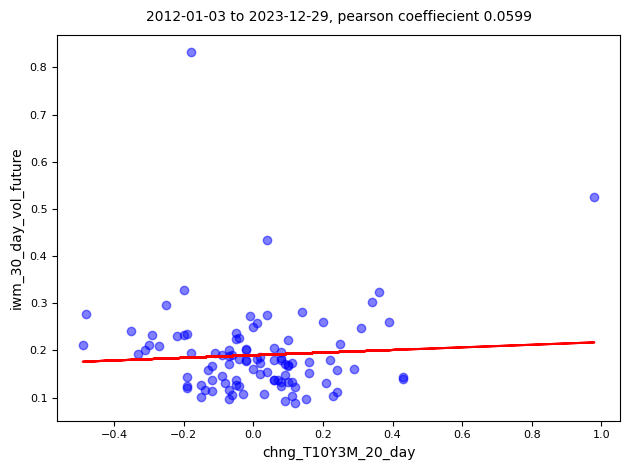

In [56]:
for column in cols_30:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_20_day', column, 30)

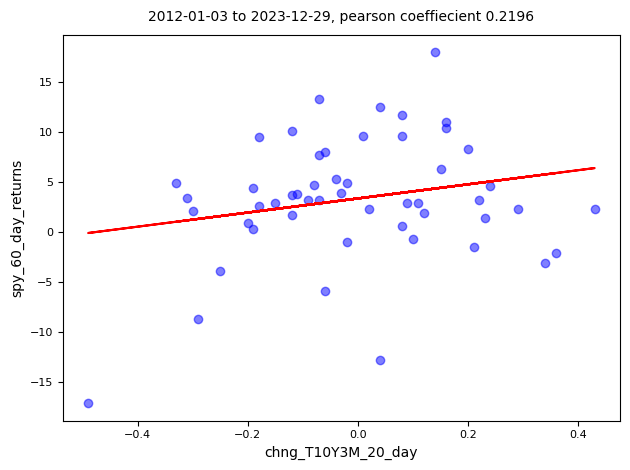

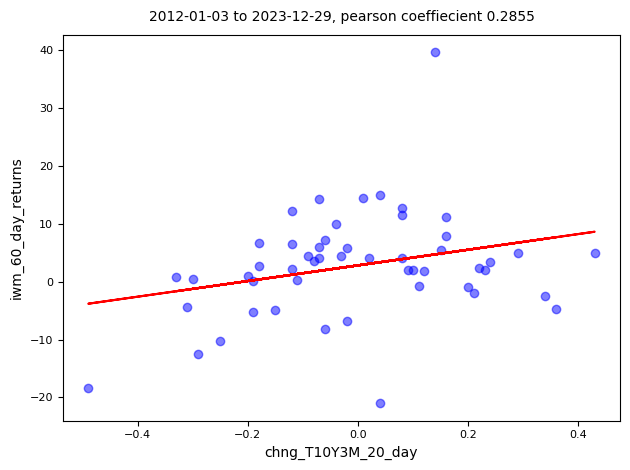

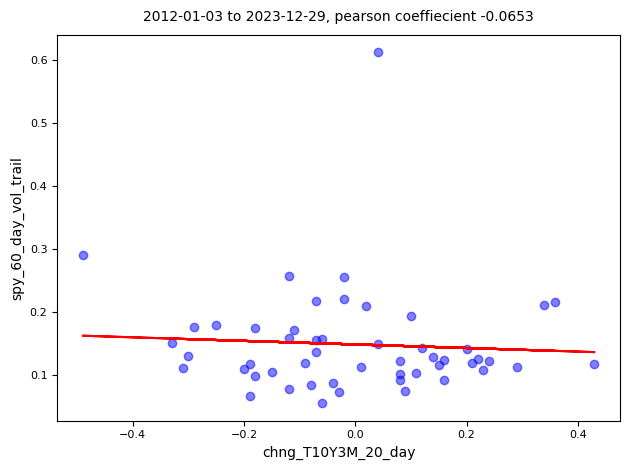

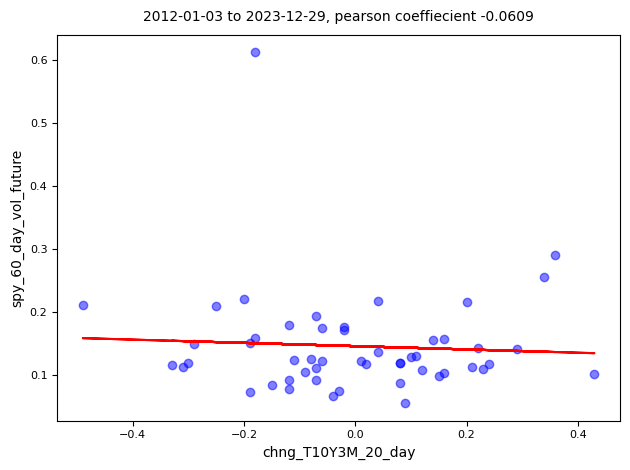

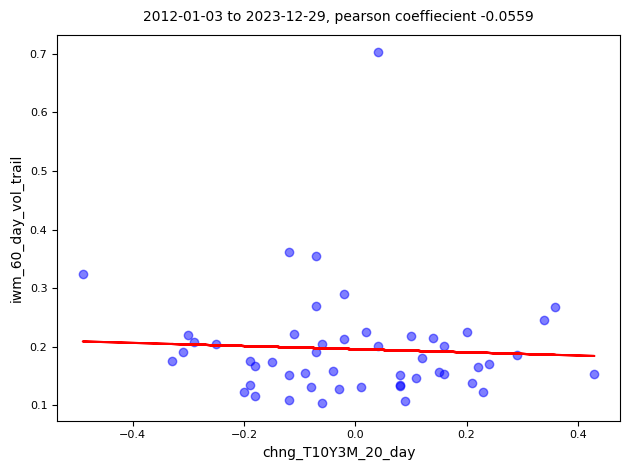

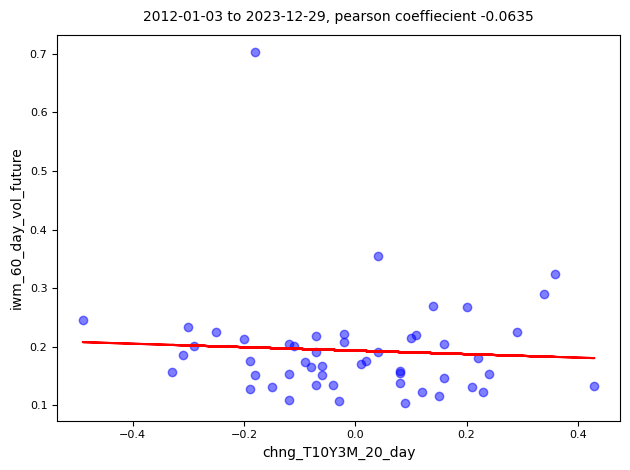

In [57]:
for column in cols_60:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_20_day', column, 60)

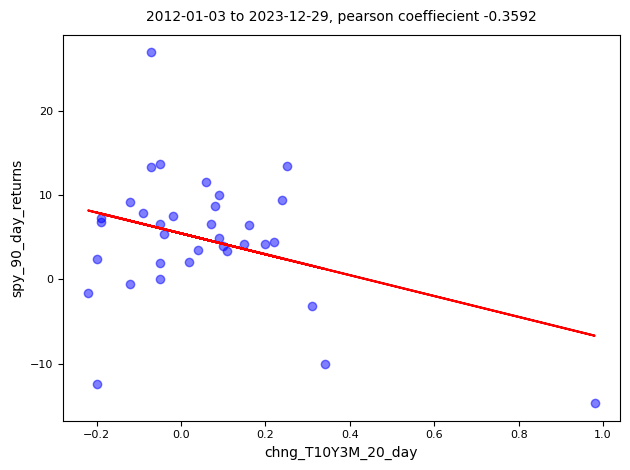

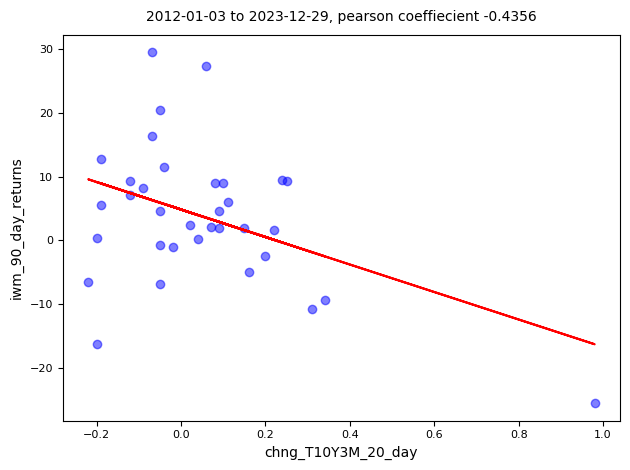

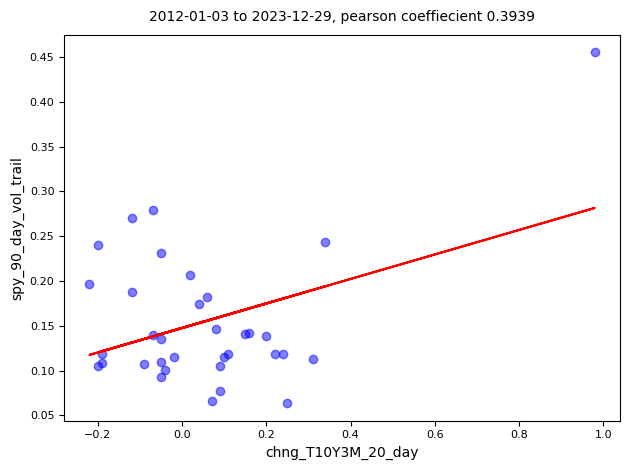

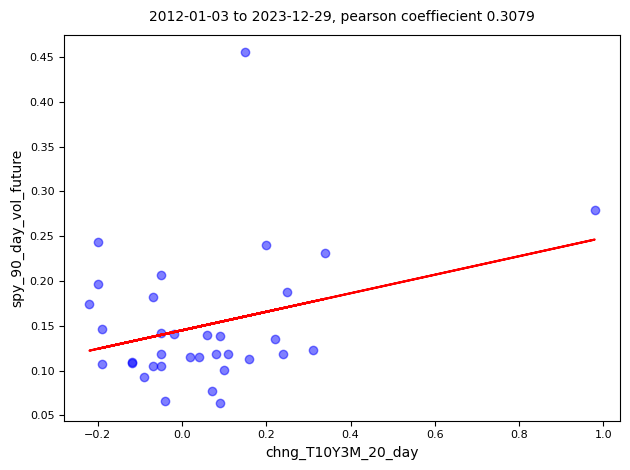

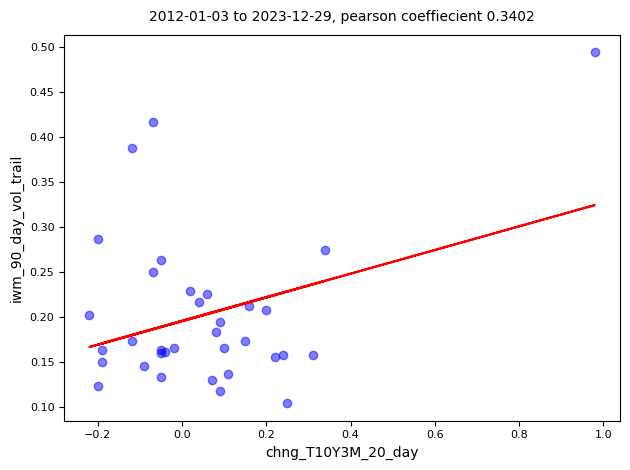

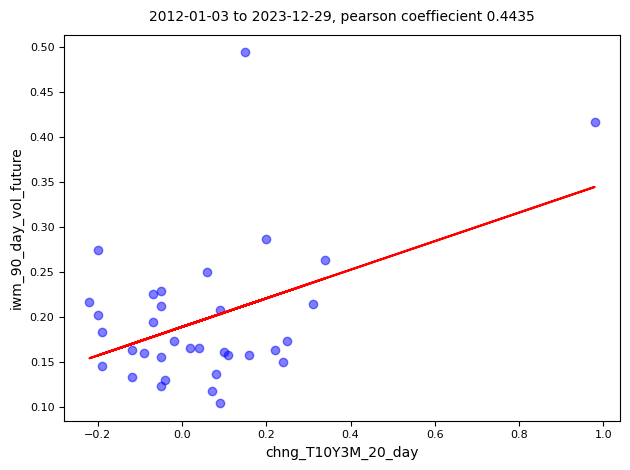

In [58]:
for column in cols_90:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_20_day', column, 90)

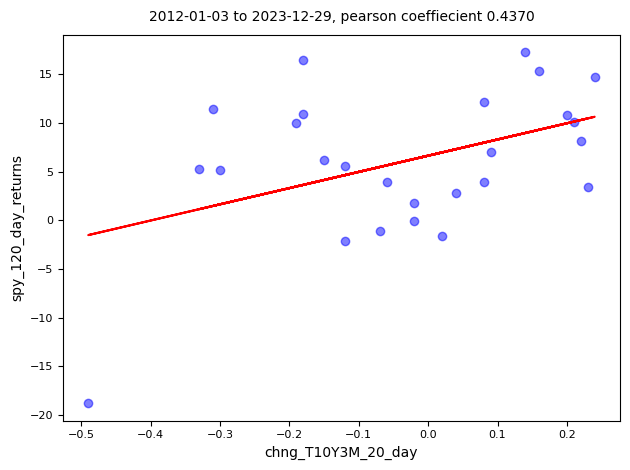

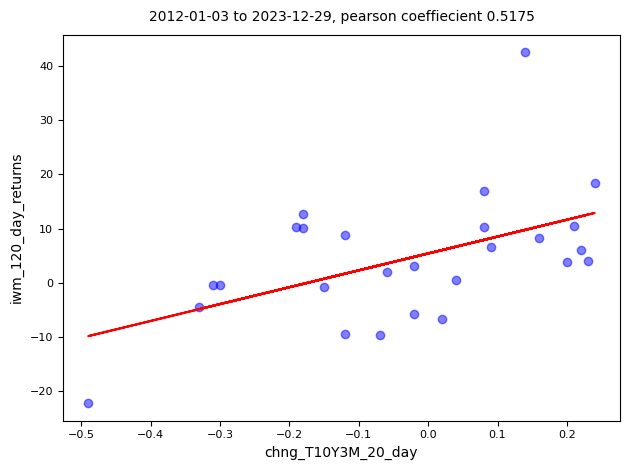

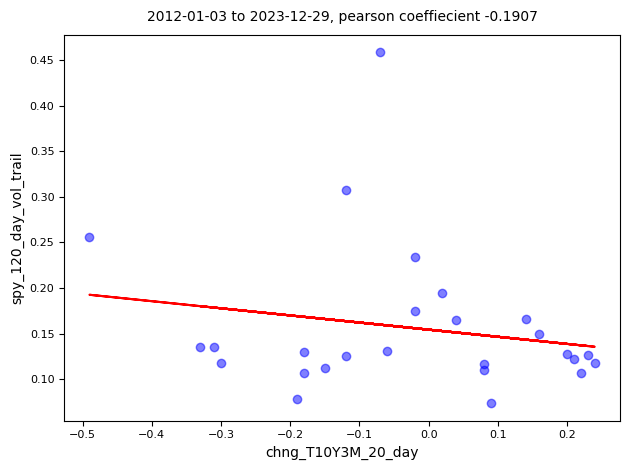

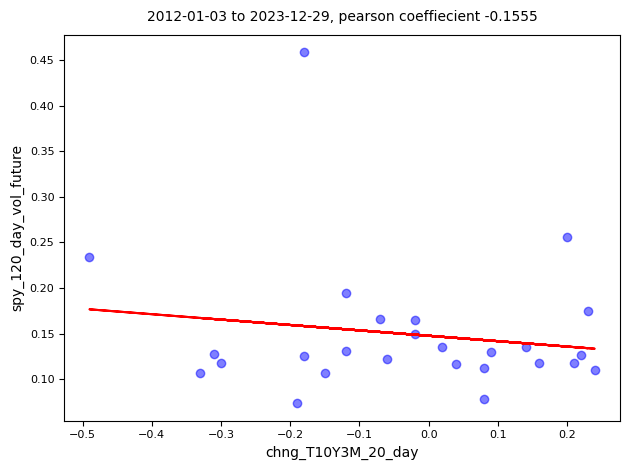

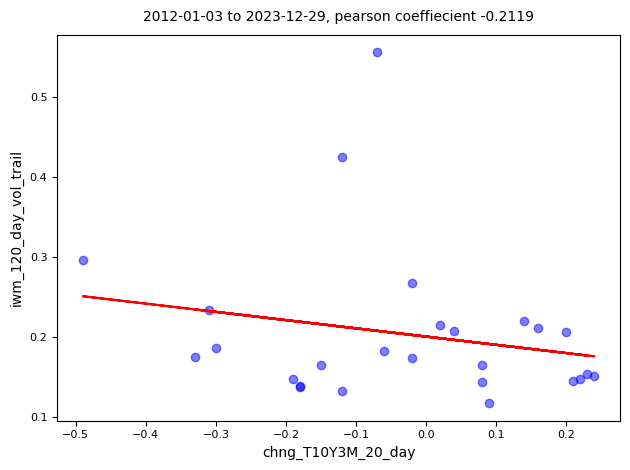

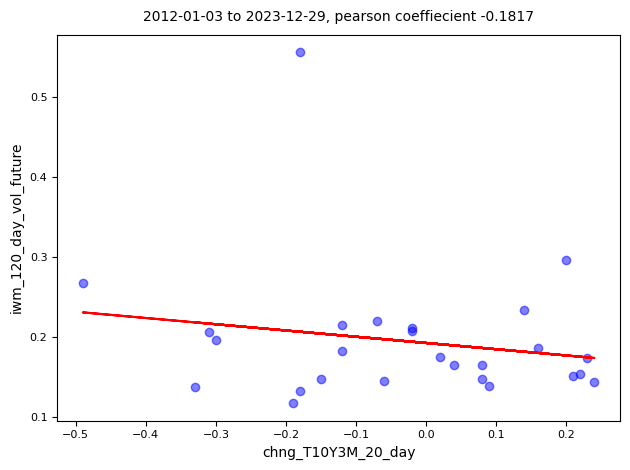

In [59]:
for column in cols_120:
    make_scatter(spy_iwm_pair_2012_2023, 'chng_T10Y3M_20_day', column, 120)